# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Álvaro Rodríguez Gallardo</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

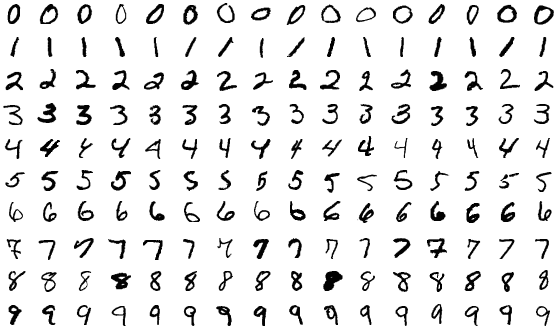



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

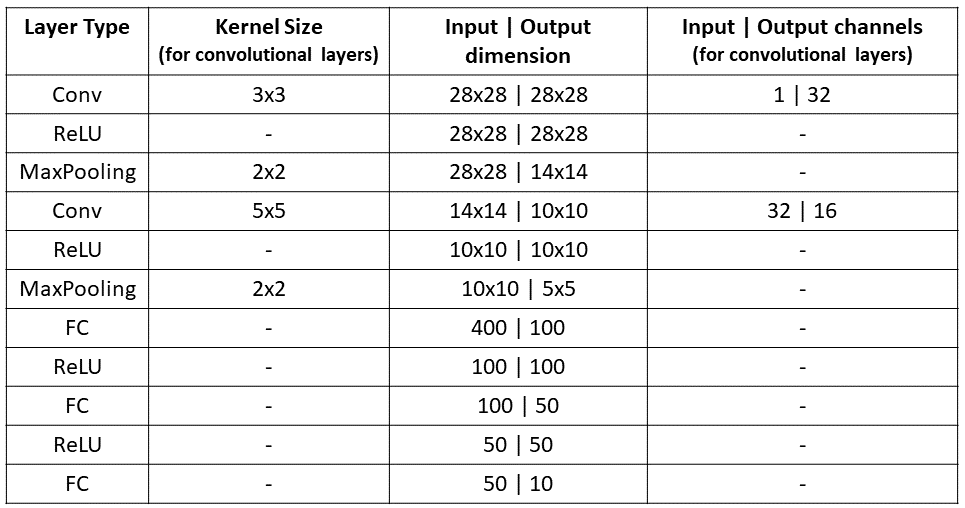

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 805.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=356065e079625bc638fab5a21a18b6d030828d9bc3ce43b330da705767869577
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


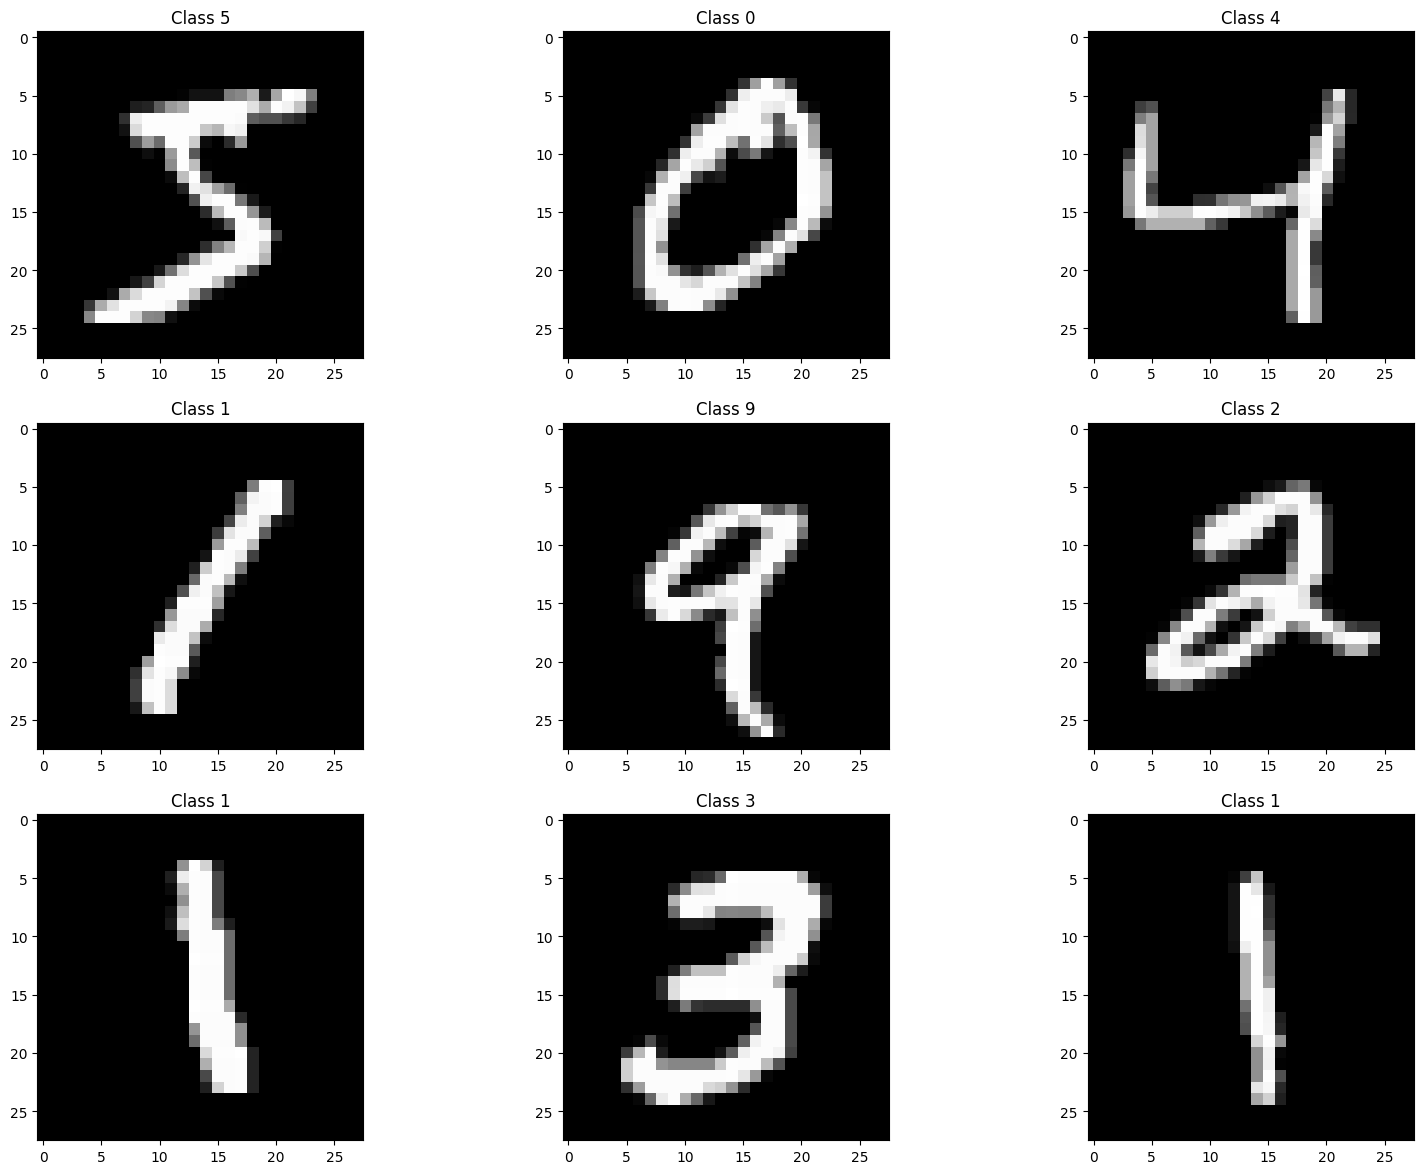

In [ ]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [ ]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [ ]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


En primer lugar se define el modelo propuesto en el enunciado. Solo se implementa la arquitectura, para más adelante compilar el optimizador según corresponda.

In [ ]:
def modeloCNN():
  return Sequential([
      Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'),
      MaxPooling2D(pool_size=(2,2)),
      Conv2D(16,kernel_size=(5,5),activation='relu'),
      MaxPooling2D(pool_size=(2,2)),
      Flatten(),
      Dense(100,activation='relu'),
      Dense(50,activation='relu'),
      Dense(10,activation='softmax')
  ])

y para evitar escribir mucho código, se usa la siguiente función para mostrar las métricas, matriz de confusión,... correspondientes según los datos pasado por argumento.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def metricasInfo(modelo,x,y,caso):
  # Obtener predicciones para el conjunto
  y_pred = modelo.predict(x)

  # Calcular la precisión en el conjunto según la función dada
  acc = calcularAccuracy(y, y_pred)
  print(f'Accuracy en {caso}: {acc:.4f}')

  # Generar la matriz de confusión para el conjunto dado
  y_labels = np.argmax(y, axis=1)
  y_pred_labels = np.argmax(y_pred, axis=1)
  cm = confusion_matrix(y_labels, y_pred_labels)

  print("La matriz de confusión en "+str(caso)+" es:")
  print(cm)

  # Mostrar la matriz de confusión para el conjunto dado
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  # Generar el informe de clasificación
  report = classification_report(y_labels, y_pred_labels)
  print("Classification Report:")
  print(report)

###Justificaciones previas en la arquitectura

Podemos ver que, además de las capas pedidas en la tabla para crear la red neuronal, junto con propiedades tales como el tamaño de kernel (se explica más adelante, en el desarrollo de `.summary()`) o el tamaño de entrada, se incluyen parámetros como `padding`, `activation` o incluso se añade como función de activación de la última capa la función `softmax`. Se explica cada caso a continuación:

- Uso de padding: Usado para las capas de convolución. La operación de convolución puede pensarse, de forma visual, como una serie de operaciones que se realizan según una matriz, llamada kernel, se situa por encima de la imagen, siendo la primera operación la que corresponde al centro del kernel con la esquina superior izquierda de la imagen. Por ello, la salida tendrá menor dimensión que la entrada. En concreto, la salida tendrá dimensiones $\left( \frac{dimensión\_entrada - tamaño\_filtro}{stride} \right) + 1$, siendo $stride$ el paso que realiza el kernel tras aplicar una convolución (por ejemplo, se $stride=1$, se moverá un píxel por cada convolución). Indicando `padding='none'`, se especifica que se quiere usar la técnica de padding antes de la convolución, que es rellenar los píxeles suficientes en torno a la imagen para que las dimensiones de salida sean iguales a las de entrada. En caso de no usarse, como ocurre en la segunda capa convolucional, la salida tiene tamaño $\left( \frac{14-5}{1} \right) + 1 = 9 + 1 = 10$ (por defecto, $stride=1$, que no se ha especificado ya que con ese valor se tiene el tamaño de la salida deseada).

- `pool_size` en MaxPooling: Indica el tamaño de la submatriz de la que se escogerá el mayor valor de píxel para reducir la dimensión de la imagen. En este caso, las dos capas usan submatrices $2 \times 2$.

- Funciones de activación `ReLU`: Esta función, cuya definición es $ReLU(x) = \max(0,x)$ para $x \in \mathbb{R}$, es una de las funciones más usadas. Sus razones de uso son varias, tales como la introducción de no linealidad para que aprenda relaciones complejas entre datos, su eficiencia (las operaciones de máximo y comparación lo son), evita el problema de gradiente desvaneciente (impide que el gradiente se vuelva muy pequeño para entradas extremas, lo que hace que se ralentice el proceso de aprendizaje) e introduce esparcidad en la red, que puede ser beneficiosa para la representación de características.

- Función de activación `softmax`: Usada principalmente en la capa de salida de la red neuronal en tareas de clasificación multiclase, pues convierte las salidas de una red en probabilidades de que la entrada pertenezca a las clases. Su definición es $softmax(x_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$ donde $z_i$ es el valor de la salida $i$ antes de aplicar la función $K$ es el número de clases. Las razones para su uso son la conversión de salidas en probabilidades (fundamental para problemas donde se quiera interpretar la salida), resalta la clase con mayor probabilidad (mayor valor del vector, más cercano a $1$), facilita la comparación entre clases y se usa junto a la función de pérdida cross-entropy loss (se explica la razón de su uso a más adelante), que mide la discrepancia entre las probabilidades predichas y las clases verdaderas.

### Análisis de las características de la red

Antes de seguir con la obtención empírica de los hiperparámetros más importantes tanto para el optimizador Adadelta como para el optimizador AdamW, vamos a estudiar en profundidad la arquitectura de la red.

In [ ]:
modeloCNN().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 100)               4

El modelo consta de las siguientes capas, por orden:

- Conv2D: Es una capa que realiza la operación de convolución con $32$ kernels de tamaño $3 \times 3$ (un kernel es una matriz usada para aplicar la operación de [convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) en zonas de la imagen para poder extraer características de la imagen). La salida es una matriz de características $28 \times 28$ con $32$ canales (gracias a `padding='same'` se mantienen las dimensiones). Consta de $320$ parámetros, que son valores que se ajustan durante el entrenamiento para que la red pueda realizar ciertas tareas, y en este tipo de capas, la cantidad de parámetros (entrenables) de calcula con la expresión $(tamaño\_kernel \times canales\_entrada + 1) \times número\_kernels$, y si se sustituye con los valores de la primera capa, resultaría en $(3 \times 3 \times 1 + 1) \times 32 = 10 \times 32 = 320$ (un canal de entrada porque se opera con imágenes en blanco y negro).

- MaxPooling2D: Su objetivo es reducir las dimensiones de las características de entrada. La salida es una matriz de características $14 \times 14$ con $32$ canales, sin parámetros que se puedan entrenar, ya que esta capa solo se encarga de reducir las dimensiones según el valor máximo de cada entorno de tamaño, normalmente, $2 \times 2$.

- Conv2D: Segunda capa convolucional de la red. Recibe una matriz $14 \times 14$, de $32$ canales, y aplica kernels de tamaño $5 \times 5$, devolviendo matrices de tamaño $10 \times 10$ con $16$ canales. Nótese que dado que no se especifica `padding='same'`, la dimensión de la salida es menor que la entrada. Esto se debe al comportamiento de la operación de convolución, que se explicó con detalle anteriormente. Tiene $12816$, que se calculan de la misma forma que la primera capa, $(5 \times 5 \times 32 + 1) \times 16 = 801 \times 16 = 12816$.

- MaxPooling2D: Mismo funcionamiento que la primera capa del mismo tipo explicada. Recibe matrices de tamaño $10 \times 10$ y devuelve matrices de tamaño $5 \times 5$, manteniendo $16$ canales.

- Flatten: Recibe las matrices de la anterior capa y las transforma en un vector de $400$ elementos. Esto es necesario para que los datos puedan ser tratados por las capas completamente conectadas. No tiene parámetros porque la operación no lo requiere.

- Dense: Primera capa completamente conectada de la red. Recibe un vector de $400$ elementos y su salida es un vector de $100$ elementos. Como las características pueden estar dispersas tras varias aplicaciones de convolución y pooling, se usan estas capas para formar una representación global de la imagen. La cantidad de parámetros (entrenables) se calcula con la fórmula $(número\_neuronas\_capa\_anterior + 1) \times número\_neuronas\_capa\_actual$, y para esta capa se tendría $(400 + 1) \times 100 = 401 \times 100 = 40100$.

- Dense: Segunda capa completamente conectada, que tiene el mismo funcionamiento que la capa anteriormente explicada. En este caso, la cantidad de parámetros se calcula como $(100+1) \times 50 = 101 \times 50 = 5050$.

- Dense: Tercera capa completamente conectada. La cantidad de parámetros presentes sería $(50+1) \times 10 = 51 \times 10 = 510$.

Por último, el resumen de los parámetros de la red se puede desglosar de la siguiente manera:

- `Total params`: Suma de todos los parámetros del modelo, tanto entrenables como no entrenables. En este caso, $320+12816+40100+5050+510 = 58796$.

- `Trainable params`: Cantidad de parámetros entrenables en el modelo. Como todos son entrenables, coincide con el número total de parámetros. Pueden ser tanto pesos de las capas como sesgos.

- `Non-trainable params`: Cantidad de parámetros no entrenables, esto es, no se ajustan durante el entrenamiento. Pueden ser tanto parámetros congelados (por técnicas de [Trasnfer Learning](https://datascientest.com/es/que-es-el-transfer-learning)) o pertenecer a capas cuyas conexiones no cambian durante el entrenamiento. En este modelo no hay parámetros de este tipo.

### Separación entre entrenamiento y validación: hold-out

Ya explicado el modelo y todos sus parámetros, se separa el conjunto denominado x_train e y_train en dos conjuntos: uno para el entrenamiento del modelo (80%) y otro para su validación (20%), que es la técnica de validación hold-out (se justifica su elección más adelante). De esta manera solo se hará uso de x_test e y_test para comprobar si la elección de hiperparámetros ha sido buena y así no realizar data snooping.

Se usa `train_test_split` para que la elección del $20$% de datos para validar sea aleatoria y los resultados mostrados más adelante sean más robustos frente a posibles relaciones entre datos secuenciales.

In [ ]:
from sklearn.model_selection import train_test_split

x_entrenar, x_val, y_entrenar, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Antes de comenzar la búsqueda de los hiperparámetros es necesario explicar la elección de los hiperparámetros con los que se probará, la función de pérdida, métricas,..., además de explicar el funcionamiento de técnicas de regularización usadas como Early Stopping. Esto se explicará a lo largo de varios apartados para facilitar una correcta separación entre conceptos.

### Experimentación

#### Elección de hiperparámetros

**Tamaños de batch**.

Vamos a experimentar con tamaños que podrían ser clasificados como pequeños (tamaño $16$ y $32$), medianos ($64$ y $128$) y grandes ($256$) para comprobar cómo qué puede variar en el entrenamiento de la red. Esto es porque el tamaño de batch está relacionado con el número de muestras que se procesan antes de actualizar los parámetros del modelo, llevando a un sobreajuste en el modelo si es excesivamente grande para el conjunto que se trata (las ventajas y desventajas de cada caso se explican más adelante). Además, la elección de potencias de $2$ como tamaños de batch se relaciona con la eficiencia computacional (especialmente por la arquitectura de la GPU, diseñadas para operar de manera óptima con tamaños de datos que sean potencias de $2$) y la optimización del hardware.

Los efectos efectos del tamaño del batch pueden ser los siguientes:

- Pequeño: Se requiere menos memoria y puede introducir más ruido en el gradiente, lo que ayuda a evitar óptimos locales. Sin embargo, requiere mayor número de iteraciones por época (una época requiere de $total/batch\_size$ iteraciones).

- Mediano: Proporciona un buen equilibrio entre velocidad de convergencia y precisión del modelo, pero requiere más memoria que los tamaños pequeños.

- Grande: Mejor uso de la paralelización del hardware, además de estimar gradientes más estables y requerir menos iteraciones por época. Por el contrario, puede requerir mucha memoria y producir sobreajuste si no se maneja bien.


**Learning rates**.

El learning rate es uno de los hiperparámetros más importantes, pues determina la magnitud de los pasos que da el algoritmo de optimización en la dirección del gradiente descendente para minimizar la función de pérdida, además de influenciar en la velocidad de convergencia y la capacidad del modelo para encontrar un mínimo coherente de la función de pérdida.

Los learning rates con los que se experimenta son relativamente pequeños. Las razones para ello son el control de la precisión para que el modelo haga ajustes más precisos en los pesos, la estabilidad del gradiente por reducir el riesgo de que los pesos del modelo se actualicen en direcciones inapropiadas por una magnitud de paso no coherente (este tipo de problemas se comentan a continuación) y la mejor convergencia en cada iteración. Además, para poder comparar el rendimiento entre los dos optimizadores, debe hacerse con los mismos hiperparámetros, y como primer acercamiento al problema se consideran buenos, tanto para Adadelta como para AdamW. Si fuere necesario, se experimentará con valores más altos (hasta $1$, ya que valores más altos pueden dar inestabilidad, como se indica a continuación).

Los problemas de un learning rate inadecuado se recogen a continuación:

- Learning rate grande: Raṕida convergencia inicial, pero puede causar oscilaciones en torno al mínimo, o causar divergencia.

- Learning rate apropiado: Da un buen balance entre velocidad de convergencia y establidad, aunque no es fácil escogerlo, ya que dependerá del problema.

- Learning rate pequeño: Proporciona estabilidad y precisión en la convergencia, aunque puede ralentizar el entrenamiento. Si es excesivamente pequeño, como es el caso de que valga $0.0001$, puede ralentizar en exceso el entrenamiento y que sean necesarios métodos de regularización como Early Stopping (que se explica más adelante).

#### Función de pérdida: Justificación

**Función de pérdida**.

La función de pérdida (o coste) escogida es la función cross-entropy pues mide la discrepancia entre la distribución de probabilidades predicha por el modelo y la verdadera en tareas de clasificación multiclase como la enfrentada. Aplica la siguiente fórmula,

$$F(\hat{y}) = - \sum_{i} y_i \cdot ln( \hat{y}_i)$$

donde $y_i$ es la etiqueta verdadera y $\hat{y}_i$ la probabilidad predicha para la clase $i$. A mayor probabilidad de pertenencia, mejor será la precisión en la clasificación y la mejora en el modelo implica el aumento de las probabilidades predichas para las clases correctas, lo que reduce el valor de la función.

#### Métricas: Justificación

**Métricas**.

Vamos a usar la métrica de precisión, o accuracy, que es una medida del rendimiento muy utilizada en problemas de clasificación como el afrontado. En el entrenamiento, indica el porcentaje de predicciones correctas realizadas por modelo en relación al total de predicciones.

Su expresión es $accuracy = \frac{Número\_predicciones\_correctas}{Número\_predicciones\_total}$, y aunque se pueda perder cierta información con ella (como falsos positivos o falsos negativos), para la experimentación que se hará con varios hiperparámetros es buena métrica. Más adelante se hará uso de matrices de confusión para medir el rendimiento del posible modelo cuando se escojan los hiperparámetros.

#### Optimizadores

**Optimizadores**.

Los optimizadores son algoritmos empleados para el ajuste de pesos y sesgos en el modelo de manera eficiente durante el entrenamiento. El principal objetivo es minimizar la función de pérdida. Además, ayudan a encontrar los valores óptimos de los parámetros del modelo de forma rápida y con menos oscilaciones y controlan la magnitud de los pasos usados en la dirección del gradiente.

Varios ejemplos de optimizadores son Adam, AdamW y Adadelta. Nos centraremos en los dos últimos.

El optimizador Adadelta ajusta los learning rate según un conjunto de gradientes acumulados , y busca mantener un learning rate razonable incluso en momentos avanzados del entrenamiento.

El optimizador AdamW es una variante de Adam, que incorpora regularización L2 de forma explícita. Adam mezcla las aproximaciones de la media y varianza del gradiente y ajusta los learning rates de manera independiente. Con la nueva incorporación de AdamW, se obtiene una mejor regularización y ayuda a evitar el sobreajuste.

#### Elección de la técnica de validación

**Técnica de validación**.

Las principales ventajas e inconvenientes entre los dos métodos son:

- Hold-out: Es un método simple de implementar y rápido de ejecutar, además de requerir de menos recursos que cross-validation. Es adecuado para grandes conjuntos de datos. Sin embargo, dada la simplicidad del método puede no dar una evaluación tan robusta como la de cross-validation.

- Cross-validation: Realiza una evaluación más robusta y acaba usando todos los datos del conjunto, lo cual es importante en conjuntos pequeños. Por el contrario, requiere de más recursos y su tiempo de ejecución es mayor.

Se hace uso de *hold-out* ya que MNIST es un conjunto de datos bastante grande, por lo que tarda menos, gasta menos recursos y se considera que en un conjunto de validación, que es el $20$% del conjunto de entrenamiento, hay muestras suficientes para que las métricas dadas en validación sean fiables. Además, como el algoritmo son redes neuronales, se puede extender innecesariamente el tiempo de entrenamiento si se usa cross-validation.

#### Método de regularización: Early Stopping

**Early Stopping**.

Este método es una técnica de regularización empleada en el entrenamiento de redes neuronales para prevenir sobreajuste. La idea es acabar el entrenamiento cuando, pasadas ciertas épocas, el rendimiento del modelo tiende a empeorar. Es especialmente útil para que el modelo no aprenda características no robustas o el ruido que pueda haber en los datos de entrenamiento.

En el código, el método se declara de la siguiente manera:

`EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)`

usando los parámetros `monitor` para controlar el valor de la función de pérdida, en este caso calculado en el conjunto de validación (ya que si aumenta mientras que el valor de la función de pérdida en entrenamiento disminuye, puede significar que el modelo está sobreajustándose), `patience=5` que es el número de épocas que debe tener como referencia para parar el entrenamiento si fuese necesario (establecido a $5$ ya que se ha considerado buen valor teniendo en cuenta que las épocas totales son $50$, esto es, el $10$%) y `restore_best_weights=True` para usar los mejores pesos encontrados hasta el momento en que para el entrenamiento. La elección de $50$ épocas se debe a que se considera que es un valor lo suficientemente alto como para poder evaluar la evolución del entrenamiento del modelo en cualquier escenario.

#### Código de experimentación

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adadelta, AdamW

##### Modelo con Adadelta

Epoch 1/50
1500/1500 [==============================] - 16s 6ms/step - loss: 0.4380 - accuracy: 0.8645 - val_loss: 0.1844 - val_accuracy: 0.9462
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1458 - accuracy: 0.9560 - val_loss: 0.1212 - val_accuracy: 0.9658
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.0941 - val_accuracy: 0.9726
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 0.0794 - val_accuracy: 0.9759
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0669 - val_accuracy: 0.9816
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.0661 - val_accur

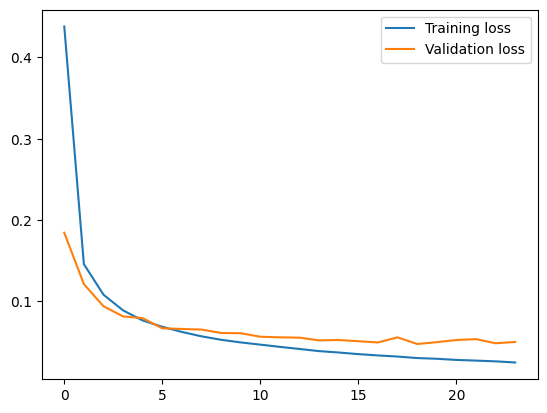

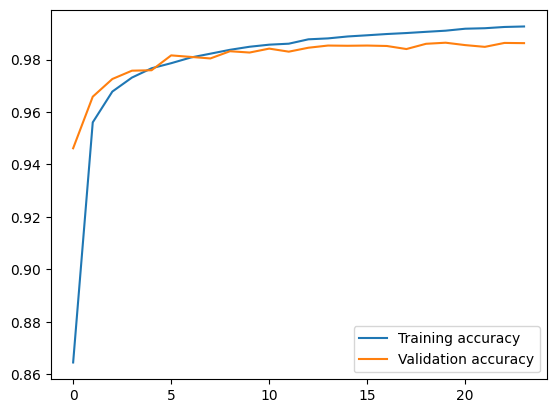

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.0214 - accuracy: 0.3785 - val_loss: 1.3086 - val_accuracy: 0.7360
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7415 - accuracy: 0.8285 - val_loss: 0.4896 - val_accuracy: 0.8708
Epoch 3/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4214 - accuracy: 0.8838 - val_loss: 0.3634 - val_accuracy: 0.8987
Epoch 4/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3421 - accuracy: 0.9028 - val_loss: 0.3095 - val_accuracy: 0.9122
Epoch 5/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3012 - accuracy: 0.9128 - val_loss: 0.2771 - val_accuracy: 0.9203
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2737 - accuracy: 0.9195 - val_loss: 0.2522 - val_accuracy: 0.9263
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0

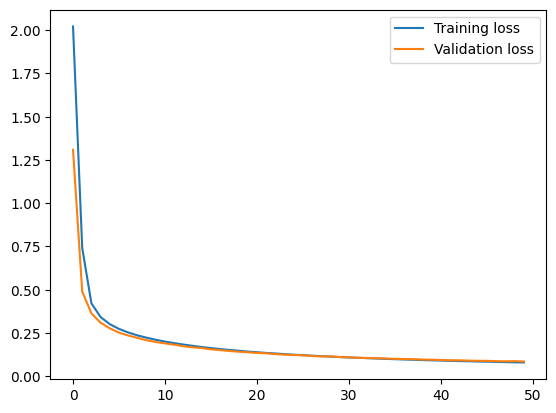

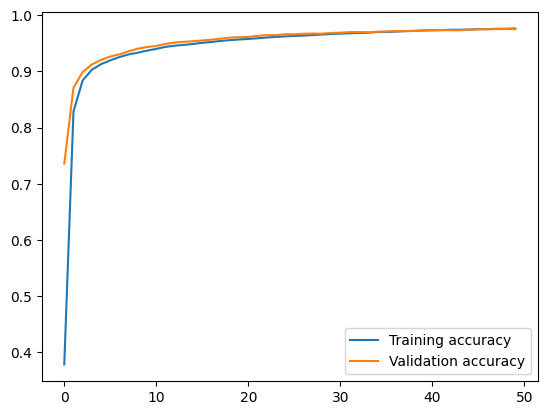

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 12s 7ms/step - loss: 2.2914 - accuracy: 0.0875 - val_loss: 2.2790 - val_accuracy: 0.1296
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 2.2638 - accuracy: 0.1801 - val_loss: 2.2501 - val_accuracy: 0.2304
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2308 - accuracy: 0.2819 - val_loss: 2.2130 - val_accuracy: 0.3283
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 2.1877 - accuracy: 0.3766 - val_loss: 2.1649 - val_accuracy: 0.4112
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 2.1330 - accuracy: 0.4494 - val_loss: 2.1047 - val_accuracy: 0.4671
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 2.0656 - accuracy: 0.5066 - val_loss: 2.0316 - val_accuracy: 0.5173
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 

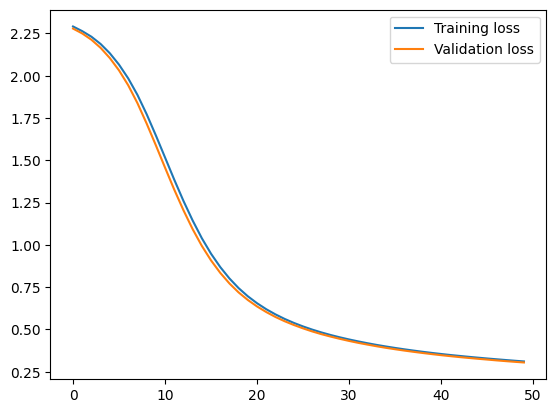

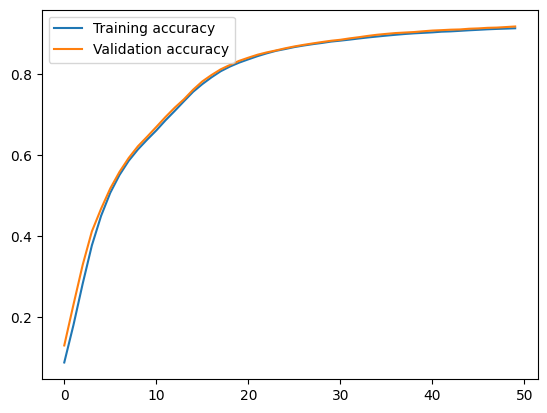

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 2.2968 - accuracy: 0.0986 - val_loss: 2.2958 - val_accuracy: 0.1002
Epoch 2/50
1500/1500 [==============================] - 8s 6ms/step - loss: 2.2946 - accuracy: 0.0999 - val_loss: 2.2936 - val_accuracy: 0.1006
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 2.2924 - accuracy: 0.1011 - val_loss: 2.2913 - val_accuracy: 0.1023
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2901 - accuracy: 0.1018 - val_loss: 2.2890 - val_accuracy: 0.1027
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 2.2878 - accuracy: 0.1029 - val_loss: 2.2867 - val_accuracy: 0.1042
Epoch 6/50
1500/1500 [==============================] - 14s 9ms/step - loss: 2.2855 - accuracy: 0.1037 - val_loss: 2.2844 - val_accuracy: 0.1042
Epoch 7/50
1500/1500 [==============================] - 14s 9ms/step - loss: 2.

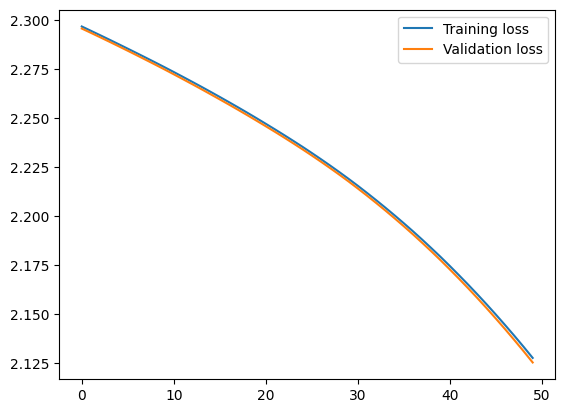

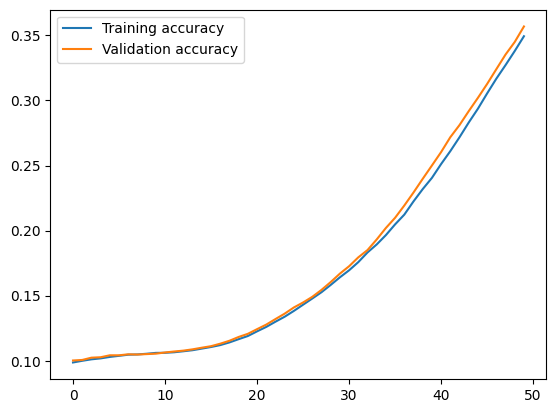

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 7s 7ms/step - loss: 0.5290 - accuracy: 0.8481 - val_loss: 0.2023 - val_accuracy: 0.9421
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1669 - accuracy: 0.9506 - val_loss: 0.1402 - val_accuracy: 0.9607
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.1288 - accuracy: 0.9616 - val_loss: 0.1122 - val_accuracy: 0.9690
Epoch 4/50
750/750 [==============================] - 9s 12ms/step - loss: 0.1068 - accuracy: 0.9682 - val_loss: 0.0991 - val_accuracy: 0.9716
Epoch 5/50
750/750 [==============================] - 5s 7ms/step - loss: 0.0928 - accuracy: 0.9727 - val_loss: 0.0892 - val_accuracy: 0.9741
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.0755 - accuracy:

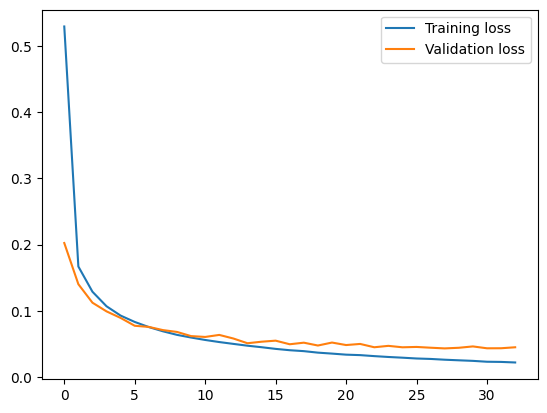

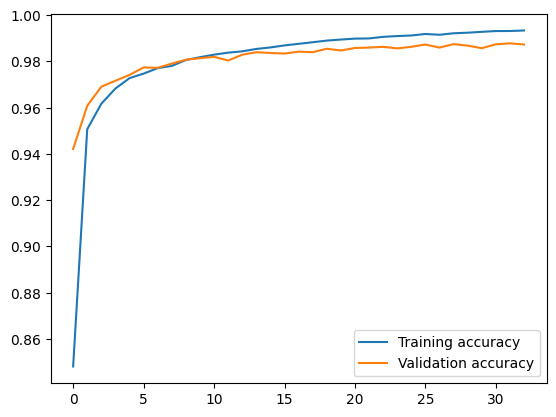

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 5s 6ms/step - loss: 2.1699 - accuracy: 0.3051 - val_loss: 1.8673 - val_accuracy: 0.5165
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 1.2882 - accuracy: 0.6614 - val_loss: 0.8276 - val_accuracy: 0.7960
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.6650 - accuracy: 0.8265 - val_loss: 0.5475 - val_accuracy: 0.8554
Epoch 4/50
750/750 [==============================] - 6s 7ms/step - loss: 0.4967 - accuracy: 0.8644 - val_loss: 0.4433 - val_accuracy: 0.8792
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.4186 - accuracy: 0.8833 - val_loss: 0.3833 - val_accuracy: 0.8953
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.3703 - accuracy: 0.8966 - val_loss: 0.3430 - val_accuracy: 0.9043
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3365 - accuracy: 

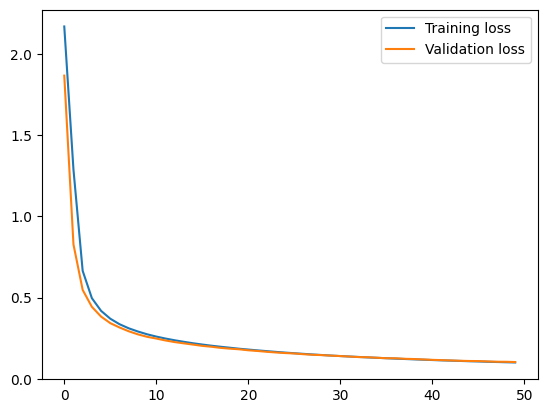

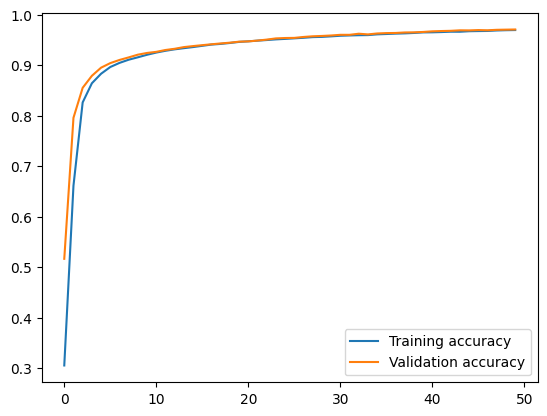

375/375 [==============================] - 2s 4ms/step
Epoch 1/50
750/750 [==============================] - 10s 10ms/step - loss: 2.2997 - accuracy: 0.1573 - val_loss: 2.2909 - val_accuracy: 0.2019
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 2.2815 - accuracy: 0.2360 - val_loss: 2.2738 - val_accuracy: 0.2552
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 2.2637 - accuracy: 0.2728 - val_loss: 2.2557 - val_accuracy: 0.2838
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 2.2442 - accuracy: 0.2972 - val_loss: 2.2350 - val_accuracy: 0.3020
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 2.2212 - accuracy: 0.3150 - val_loss: 2.2102 - val_accuracy: 0.3164
Epoch 6/50
750/750 [==============================] - 5s 6ms/step - loss: 2.1936 - accuracy: 0.3319 - val_loss: 2.1803 - val_accuracy: 0.3318
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 2.1605 - accuracy

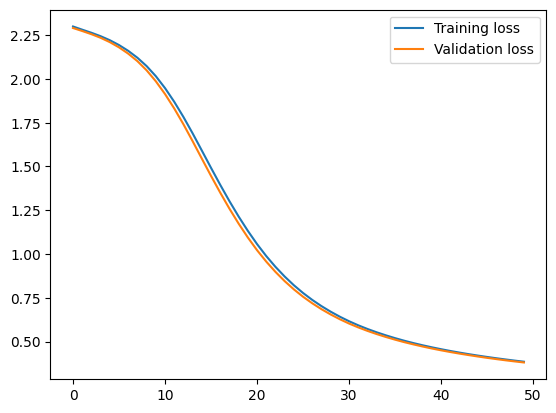

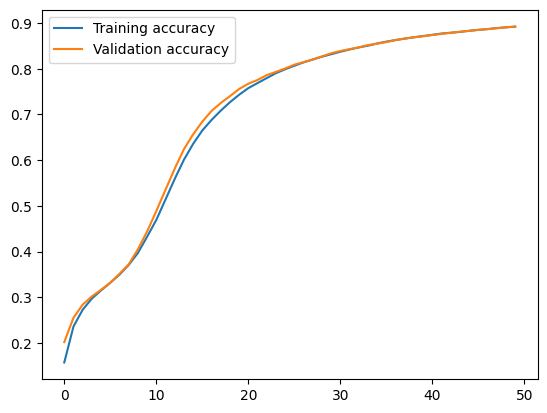

375/375 [==============================] - 1s 3ms/step
Epoch 1/50
750/750 [==============================] - 6s 6ms/step - loss: 2.3094 - accuracy: 0.1170 - val_loss: 2.3081 - val_accuracy: 0.1225
Epoch 2/50
750/750 [==============================] - 5s 7ms/step - loss: 2.3074 - accuracy: 0.1211 - val_loss: 2.3061 - val_accuracy: 0.1252
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 2.3053 - accuracy: 0.1250 - val_loss: 2.3041 - val_accuracy: 0.1277
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 2.3033 - accuracy: 0.1296 - val_loss: 2.3020 - val_accuracy: 0.1318
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 2.3013 - accuracy: 0.1339 - val_loss: 2.3000 - val_accuracy: 0.1346
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 2.2992 - accuracy: 0.1377 - val_loss: 2.2980 - val_accuracy: 0.1369
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 2.2972 - accuracy: 

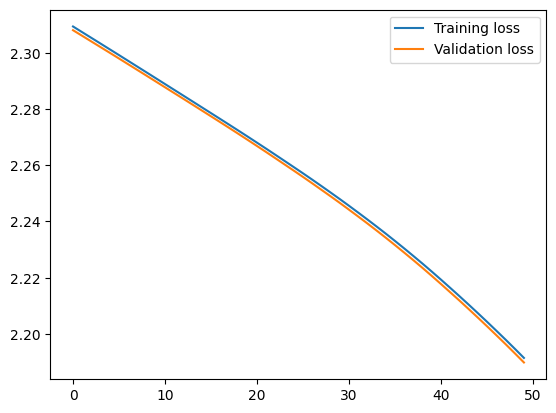

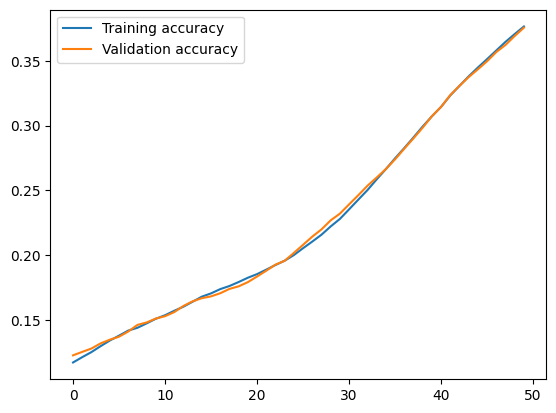

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 0.7663 - accuracy: 0.7772 - val_loss: 0.2513 - val_accuracy: 0.9274
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2132 - accuracy: 0.9368 - val_loss: 0.1741 - val_accuracy: 0.9503
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1622 - accuracy: 0.9514 - val_loss: 0.1439 - val_accuracy: 0.9555
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1354 - accuracy: 0.9594 - val_loss: 0.1245 - val_accuracy: 0.9628
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.1118 - val_accuracy: 0.9654
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 0.0954 - val_accuracy: 0.9712
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0929 - accuracy: 

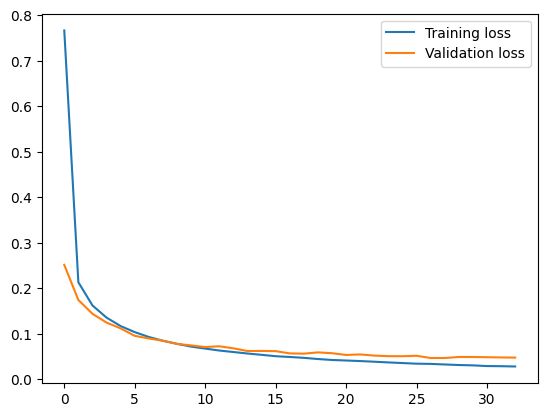

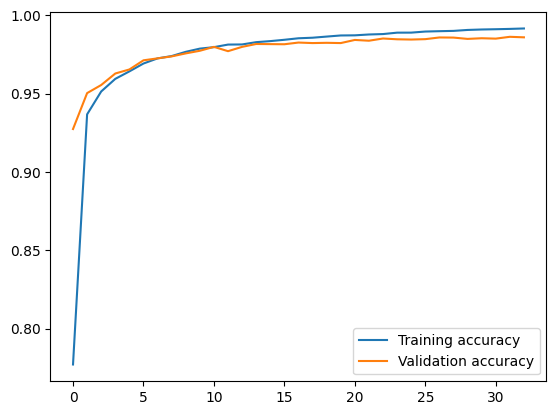

375/375 [==============================] - 1s 3ms/step
Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 2.2686 - accuracy: 0.2116 - val_loss: 2.1979 - val_accuracy: 0.4122
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 1.9183 - accuracy: 0.5615 - val_loss: 1.4356 - val_accuracy: 0.7143
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.9374 - accuracy: 0.7892 - val_loss: 0.6310 - val_accuracy: 0.8361
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5293 - accuracy: 0.8557 - val_loss: 0.4602 - val_accuracy: 0.8730
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.4253 - accuracy: 0.8802 - val_loss: 0.3925 - val_accuracy: 0.8914
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3745 - accuracy: 0.8932 - val_loss: 0.3515 - val_accuracy: 0.9013
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3417 - accuracy: 

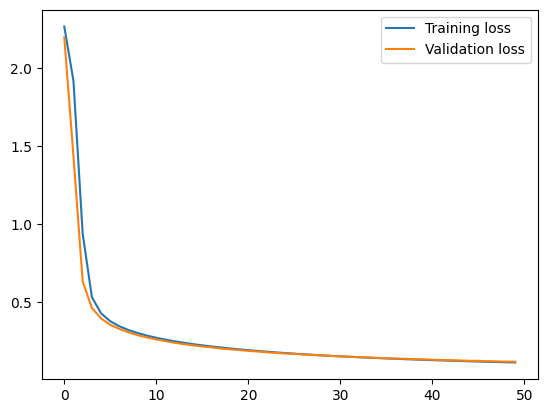

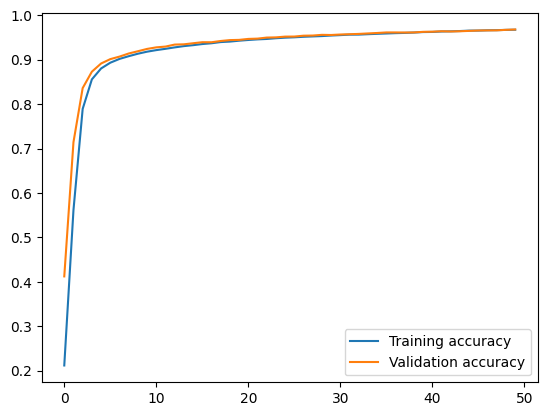

375/375 [==============================] - 1s 3ms/step
Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 2.3102 - accuracy: 0.1168 - val_loss: 2.3046 - val_accuracy: 0.1189
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 2.2980 - accuracy: 0.1253 - val_loss: 2.2930 - val_accuracy: 0.1297
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 2.2869 - accuracy: 0.1379 - val_loss: 2.2822 - val_accuracy: 0.1437
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 2.2764 - accuracy: 0.1557 - val_loss: 2.2720 - val_accuracy: 0.1618
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 2.2662 - accuracy: 0.1764 - val_loss: 2.2619 - val_accuracy: 0.1813
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 2.2558 - accuracy: 0.1916 - val_loss: 2.2513 - val_accuracy: 0.1933
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 2.2448 - accuracy: 

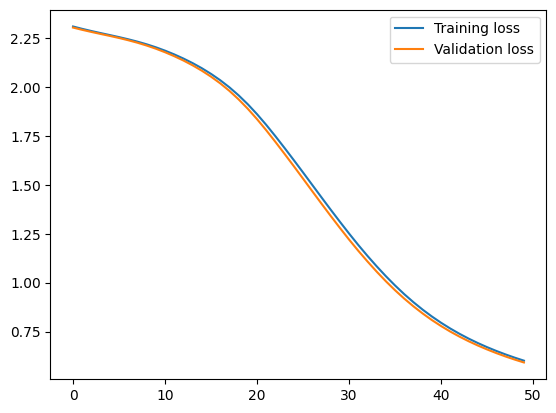

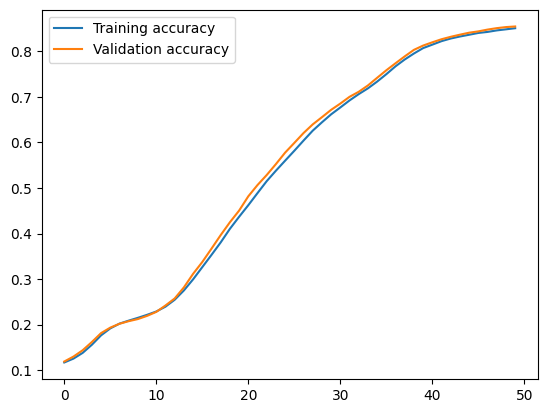

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 2.2973 - accuracy: 0.1138 - val_loss: 2.2964 - val_accuracy: 0.1133
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 2.2959 - accuracy: 0.1151 - val_loss: 2.2949 - val_accuracy: 0.1152
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 2.2944 - accuracy: 0.1168 - val_loss: 2.2935 - val_accuracy: 0.1167
Epoch 4/50
375/375 [==============================] - 3s 7ms/step - loss: 2.2930 - accuracy: 0.1186 - val_loss: 2.2920 - val_accuracy: 0.1192
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 2.2915 - accuracy: 0.1205 - val_loss: 2.2906 - val_accuracy: 0.1210
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 2.2901 - accuracy: 0.1227 - val_loss: 2.2892 - val_accuracy: 0.1233
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 2.2887 - accuracy: 

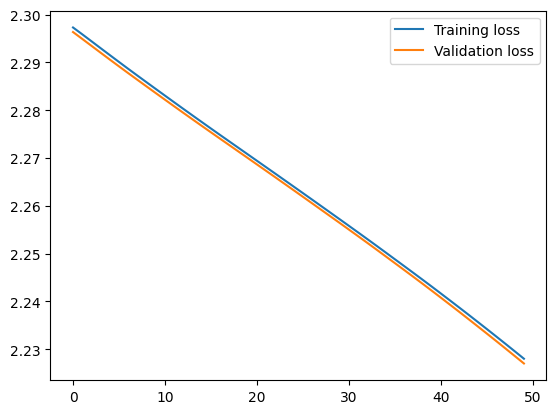

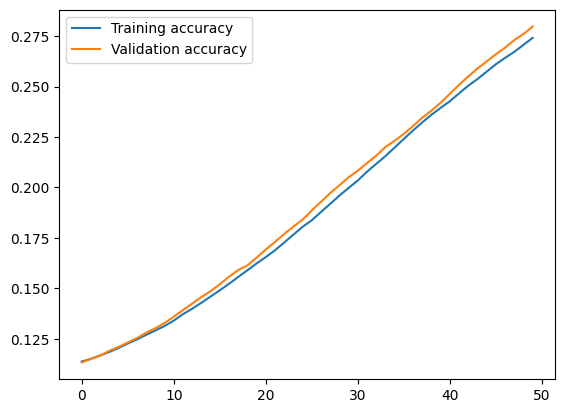

375/375 [==============================] - 1s 3ms/step
Optimizador: Adadelta
Learning rate: 32, Batch size: 0.1, Validation accuracy: 0.9860
Learning rate: 32, Batch size: 0.01, Validation accuracy: 0.9750
Learning rate: 32, Batch size: 0.001, Validation accuracy: 0.9172
Learning rate: 32, Batch size: 0.0001, Validation accuracy: 0.3568
Learning rate: 64, Batch size: 0.1, Validation accuracy: 0.9874
Learning rate: 64, Batch size: 0.01, Validation accuracy: 0.9710
Learning rate: 64, Batch size: 0.001, Validation accuracy: 0.8926
Learning rate: 64, Batch size: 0.0001, Validation accuracy: 0.3757
Learning rate: 128, Batch size: 0.1, Validation accuracy: 0.9858
Learning rate: 128, Batch size: 0.01, Validation accuracy: 0.9680
Learning rate: 128, Batch size: 0.001, Validation accuracy: 0.8548
Learning rate: 128, Batch size: 0.0001, Validation accuracy: 0.2797


In [ ]:
batch_sizes = [32,64,128]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
resultados_adadelta = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        modelo_adadelta = modeloCNN()
        opt_adadelta = Adadelta(learning_rate=lr)  # Definir el optimizador Adadelta con tasa de aprendizaje específica
        modelo_adadelta.compile(optimizer=opt_adadelta, loss='categorical_crossentropy', metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Entrenar el modelo
        hist = modelo_adadelta.fit(x_entrenar, y_entrenar, epochs=50, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stopping])
        mostrarEvolucion(hist)

        # Evaluar el modelo
        val_acc = calcularAccuracy(y_val, modelo_adadelta.predict(x_val))
        resultados_adadelta.append((batch_size, lr, val_acc))

# Imprimir resultados
print("Optimizador: Adadelta")
for lr, batch_size, acc in resultados_adadelta:
    print(f"Learning rate: {lr}, Batch size: {batch_size}, Validation accuracy: {acc:.4f}")


De las ejecuciones anteriores en general estamos interesados en aquellas que muestren un buen balance entre la pérdida en entrenamiento y en validación, tendiendo a minimizar este valor y maximizando el de accuracy. Por lo tanto, dada una primera vista, nos encontramos tanto con gráficas cuyas curvas que ajustan estos valores en una misma función como con gráficas que, si bien presentan ciertas oscilaciones en las métricas de entrenamiento, parecen converger.

Teniendo en cuenta que el optimizador usado es Adadelta, es natural el comportamiento en la evolución del aprendizaje. Este optimizador se encarga de ajustar dinámicamente el learning rate según avanza el proceso, por lo que el learning rate inicial puede no ser muy importante para obtener resultados más allá de la posible velocidad de convergencia, dando mayor importancia al tamaño del batch respecto al gasto de recursos.

Además, aunque en el resumen final parece que muchas combinaciones son válidas por tener un accuracy en validación muy elevado, hay que observar que la función de pérdida no presente valores muy elevados. Pese a que este valor pueda ser inversamente proporcional al accuracy, es recomendable analizar las curvas de aprendizaje, siendo en este caso la primera de ellas: las curvas de pérdida presentan valores similares, al igual que las de accuracy, hasta cierto punto en el que los valores de la función pérdida en validación se estabilizan, formando pequeñas oscilaciones, y los valores en entrenamiento forman una función que decrece muy lentamente. Debido a esto, Early Stopping es necesario para no gastar recursos en un modelo que no parece vaya a mejorar mucho. En adición, se puede observar que la diferencia entre curvas no es muy grande, y que la función de pérdida en validación se estabiliza, por lo que podemos intuir que está empezando a sobrejustarse a los datos de entrenamiento, aunque esto se sabrá más adelante en la fase de test si el modelo es elegido sobre el de AdamW tras el análisis de otras métricas como la matriz de confusión.

Como notas finales, dado que este es el mejor modelo de los experimentados, se puede reducir el parámetro `patience` de Early Stopping a $3$, ya que aunque se pare antes el entrenamiento, será en un momento en que las mejoras en el modelo pueden no ser importantes y empiece a sobreajustarse. Por otro lado, se puede comprobar que, para Adadelta, tanto $0.1$ como $0.01$ son valores buenos para el problema, mientras que otros como $0.0001$ son excesivamente pequeños independientemente del tamaño de batch da resultados bastante peores, teniendo que utilizar todas las épocas disponibles, $50$, para terminar el entrenamiento, posiblemente relacionado a la poca convergencia que pueda tener.



##### Resultados en validación del mejor modelo con Adadelta

Epoch 1/50
1500/1500 [==============================] - 11s 6ms/step - loss: 0.4181 - accuracy: 0.8734 - val_loss: 0.1818 - val_accuracy: 0.9457
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1462 - accuracy: 0.9562 - val_loss: 0.1210 - val_accuracy: 0.9653
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.0991 - val_accuracy: 0.9709
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0894 - accuracy: 0.9730 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0766 - accuracy: 0.9767 - val_loss: 0.0755 - val_accuracy: 0.9780
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0681 - accuracy: 0.9787 - val_loss: 0.0662 - val_accuracy: 0.9794
Epoch 7/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0687 - val_accura

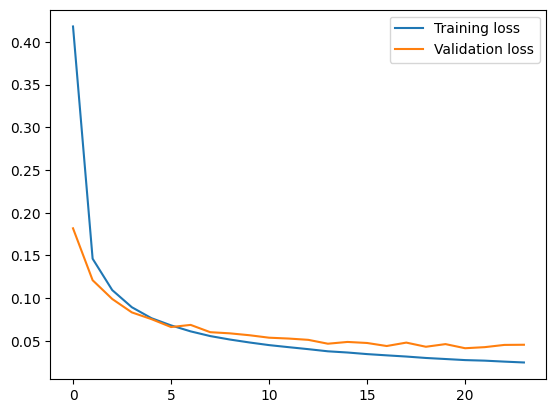

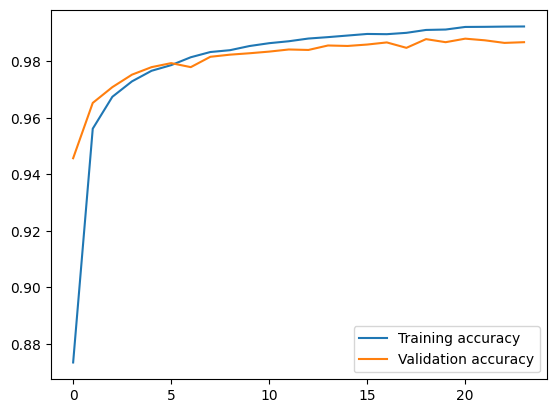

375/375 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.9881
La matriz de confusión en Validación es:
[[1170    0    0    0    1    0    2    0    1    1]
 [   0 1317    0    2    2    0    1    0    0    0]
 [   1    3 1159    3    0    0    0    4    2    2]
 [   0    0    5 1200    0    7    0    1    3    3]
 [   2    0    0    0 1169    0    0    3    0    2]
 [   4    1    0    3    0 1091    4    0    1    0]
 [   1    0    1    0    2    5 1164    0    4    0]
 [   0    3    7    0    1    0    0 1285    2    1]
 [   2    0    5    4    6    3    1    2 1132    5]
 [   3    1    0    0   10    1    2    6    1 1170]]


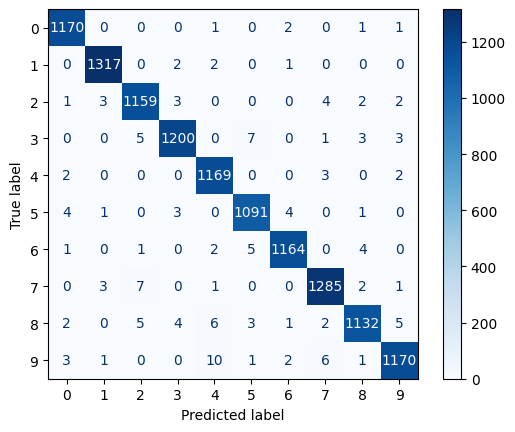

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1175
           1       0.99      1.00      1.00      1322
           2       0.98      0.99      0.99      1174
           3       0.99      0.98      0.99      1219
           4       0.98      0.99      0.99      1176
           5       0.99      0.99      0.99      1104
           6       0.99      0.99      0.99      1177
           7       0.99      0.99      0.99      1299
           8       0.99      0.98      0.98      1160
           9       0.99      0.98      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [ ]:
mejor_s_batch_adadelta = 32
mejor_lr_adadelta = 0.1
patiente_adadelta = 3

mejor_adadelta = modeloCNN()
opt_adadelta = Adadelta(learning_rate=mejor_lr_adadelta)
mejor_adadelta.compile(optimizer=opt_adadelta, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=patiente_adadelta, restore_best_weights=True)

hist = mejor_adadelta.fit(x_entrenar, y_entrenar, epochs=50, batch_size=mejor_s_batch_adadelta, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(hist)

# Mostrar rendimiento en validación
metricasInfo(mejor_adadelta,x_val,y_val,'Validación')

La explicación de cada resultado se hará por separado:

- Gráficas: Tanto el comportamiento de las gráficas de evolución de aprendizaje como el accuracy en validación son bastante buenos, por lo que reducir patiente ha servido para no alargar innecesariamente el entrenamiento.

- Matriz de confusión: Se muestran dos, aunque esencialmente muestran la misma información. Generalmente el modelo tiene una gran cantidad de aciertos en sus predicciones (esto se ve en las diagonales de la matriz, que indican la cantidad de predicciones acertadas según la fila). Hay algunas falsas predicciones, las cuales se concentran mayoritariamente en números que puedan tener una forma parecida, como es el caso del $9$ y el $4$, aunque los fallos son escasos.

- Classification Report: La precisión indica que hay muy pocos falsos positivos y la cantidad de predicciones acertadas se acerca al total. El recall muestra que hay pocos falsos negativos (esto es, los casos positivos reales han sido capturados por el modelo). El F1-Score es la media armónica de la precisión y el recall, indicando en este caso que hay un buen equilibrio entre ambas métricas. Además, los rendimientos del modelo por clase son muy cercanos a $1$, lo que es buena señal.

En resumen, el modelo parece tener  un rendimiento muy bueno según las métricas explicadas, por lo que es bastante fiable para tareas de clasificación de dígitos como aparecen en MNIST. Sin embargo, se comparará con los resultados dados por el mejor modelo que se obtiene con AdamW, y se acabará aplicando los datos de test al mejor, evitando así data snooping.

##### Modelo con AdamW

Epoch 1/50
1500/1500 [==============================] - 12s 5ms/step - loss: 2.6072 - accuracy: 0.1042 - val_loss: 2.3238 - val_accuracy: 0.0967
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3133 - accuracy: 0.1027 - val_loss: 2.3074 - val_accuracy: 0.0980
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3137 - accuracy: 0.1050 - val_loss: 2.3138 - val_accuracy: 0.1016
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3131 - accuracy: 0.1055 - val_loss: 2.3179 - val_accuracy: 0.0995
Epoch 5/50
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3149 - accuracy: 0.1003 - val_loss: 2.3133 - val_accuracy: 0.0967
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3140 - accuracy: 0.1048 - val_loss: 2.3044 - val_accuracy: 0.0980
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3146 - accuracy: 0.1039 - val_loss: 2.3180 - val_accuracy

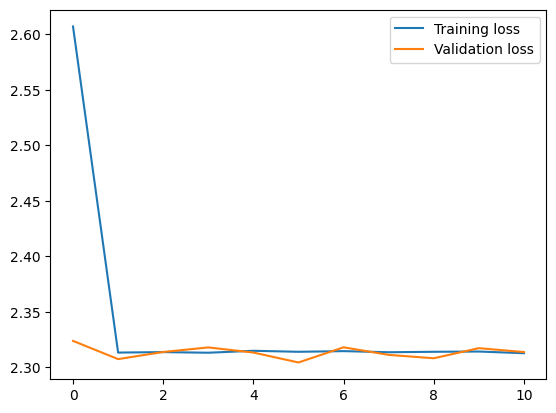

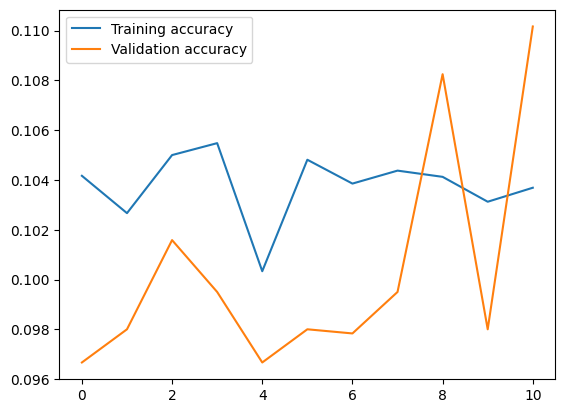

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.1632 - accuracy: 0.9516 - val_loss: 0.0784 - val_accuracy: 0.9796
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0948 - accuracy: 0.9751 - val_loss: 0.1003 - val_accuracy: 0.9758
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0909 - accuracy: 0.9769 - val_loss: 0.0805 - val_accuracy: 0.9793
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0817 - accuracy: 0.9795 - val_loss: 0.0802 - val_accuracy: 0.9815
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0726 - accuracy: 0.9821 - val_loss: 0.0960 - val_accuracy: 0.9806
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0719 - accuracy: 0.9831 - val_loss: 0.1052 - val_accuracy: 0.9753


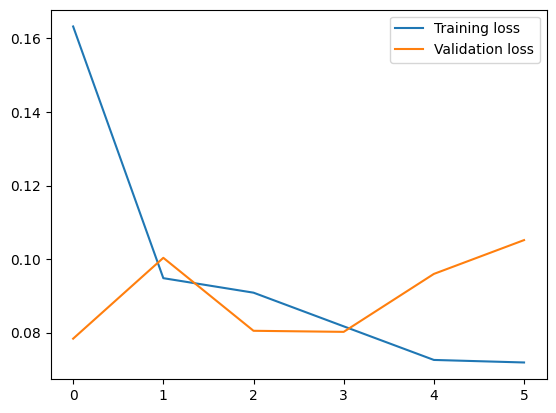

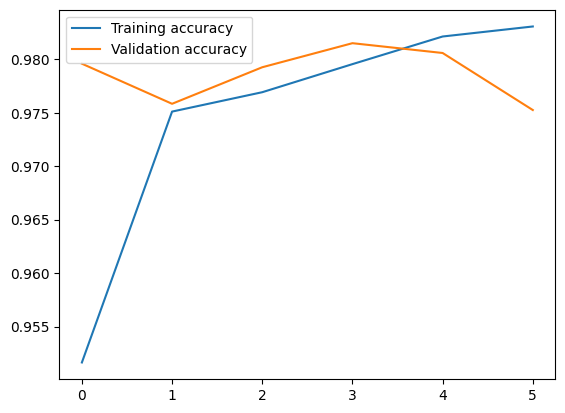

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 10s 5ms/step - loss: 0.1963 - accuracy: 0.9386 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 2/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0599 - accuracy: 0.9809 - val_loss: 0.0542 - val_accuracy: 0.9834
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0489 - val_accuracy: 0.9839
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0461 - val_accuracy: 0.9878
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0394 - val_accuracy: 0.9894
Epoch 7/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.01

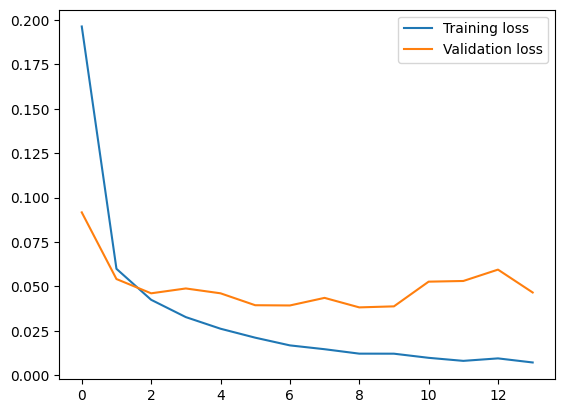

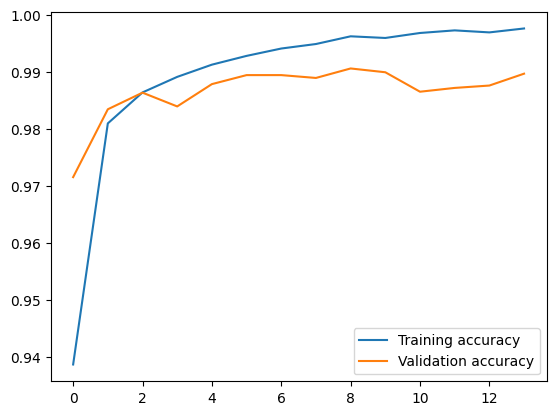

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5463 - accuracy: 0.8457 - val_loss: 0.2002 - val_accuracy: 0.9428
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1637 - accuracy: 0.9510 - val_loss: 0.1305 - val_accuracy: 0.9619
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1135 - accuracy: 0.9656 - val_loss: 0.0983 - val_accuracy: 0.9716
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0901 - accuracy: 0.9721 - val_loss: 0.0811 - val_accuracy: 0.9769
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0762 - accuracy: 0.9772 - val_loss: 0.0899 - val_accuracy: 0.9734
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0673 - accuracy: 0.9791 - val_loss: 0.0644 - val_accuracy: 0.9804
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.05

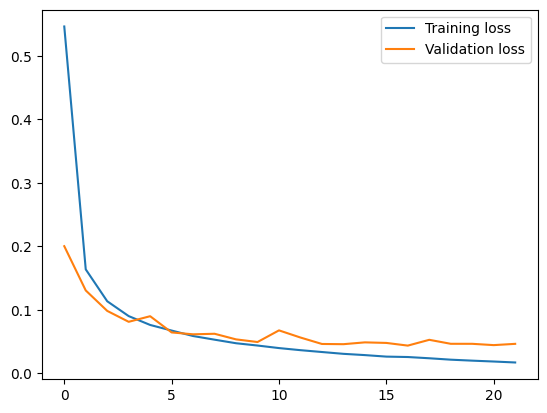

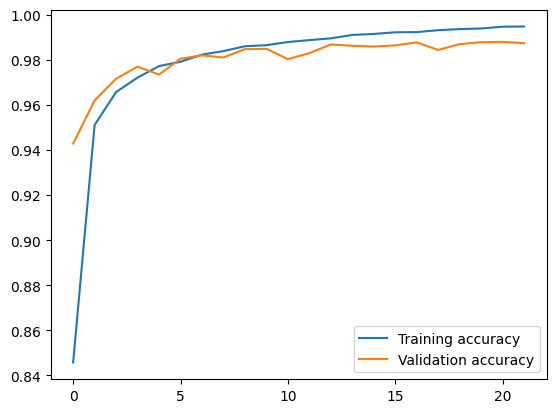

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 6s 5ms/step - loss: 2.5670 - accuracy: 0.1042 - val_loss: 2.3090 - val_accuracy: 0.0981
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 2.3096 - accuracy: 0.1044 - val_loss: 2.3111 - val_accuracy: 0.1016
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 2.3102 - accuracy: 0.1022 - val_loss: 2.3111 - val_accuracy: 0.1016
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 2.3107 - accuracy: 0.1042 - val_loss: 2.3081 - val_accuracy: 0.1016
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 2.3107 - accuracy: 0.1043 - val_loss: 2.3059 - val_accuracy: 0.0967
Epoch 6/50
750/750 [==============================] - 5s 7ms/step - loss: 2.3093 - accuracy: 0.1039 - val_loss: 2.3058 - val_accuracy: 0.0980
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 2.3098 - accuracy: 

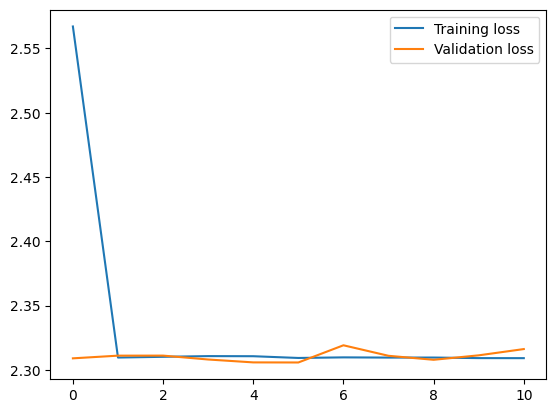

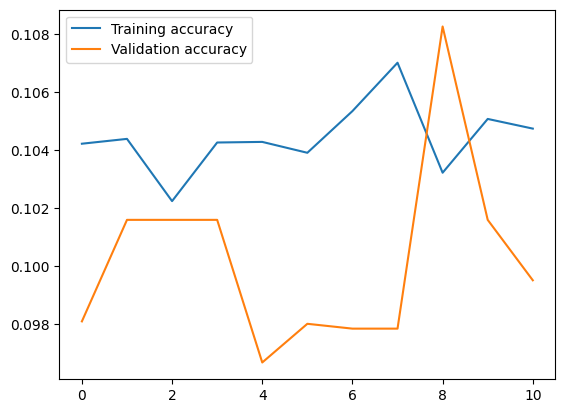

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 6s 6ms/step - loss: 0.1502 - accuracy: 0.9544 - val_loss: 0.1036 - val_accuracy: 0.9697
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0751 - accuracy: 0.9785 - val_loss: 0.0686 - val_accuracy: 0.9825
Epoch 3/50
750/750 [==============================] - 5s 7ms/step - loss: 0.0594 - accuracy: 0.9844 - val_loss: 0.0640 - val_accuracy: 0.9839
Epoch 4/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0615 - accuracy: 0.9835 - val_loss: 0.0787 - val_accuracy: 0.9793
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0559 - accuracy: 0.9847 - val_loss: 0.0676 - val_accuracy: 0.9831
Epoch 6/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0634 - accuracy: 0.9846 - val_loss: 0.0703 - val_accuracy: 0.9821
Epoch 7/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0453 - accuracy: 

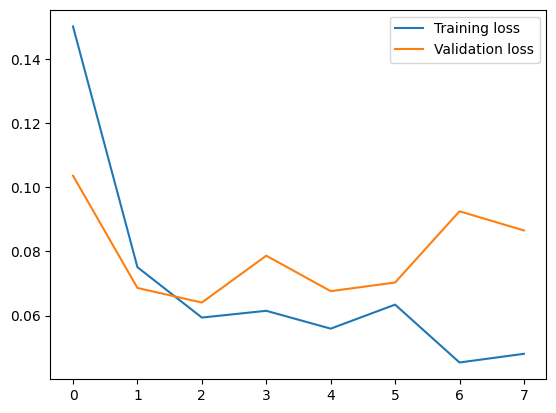

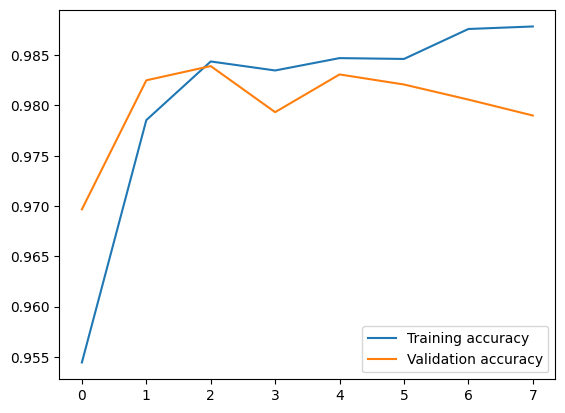

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 6s 6ms/step - loss: 0.2307 - accuracy: 0.9292 - val_loss: 0.0780 - val_accuracy: 0.9760
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 3/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9873
Epoch 4/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 5/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0436 - val_accuracy: 0.9884
Epoch 6/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 7/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0200 - accuracy: 

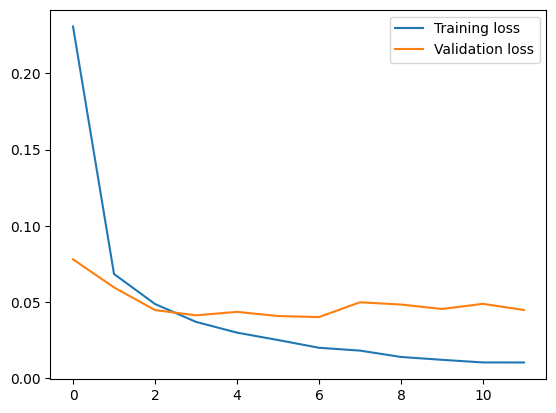

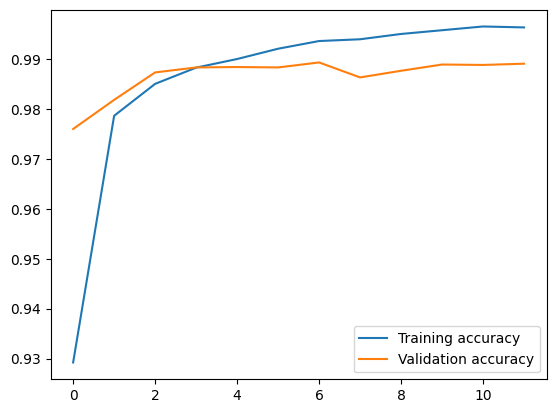

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
750/750 [==============================] - 6s 6ms/step - loss: 0.7420 - accuracy: 0.7980 - val_loss: 0.2697 - val_accuracy: 0.9219
Epoch 2/50
750/750 [==============================] - 4s 6ms/step - loss: 0.2142 - accuracy: 0.9371 - val_loss: 0.1833 - val_accuracy: 0.9439
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1520 - accuracy: 0.9539 - val_loss: 0.1354 - val_accuracy: 0.9586
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.1199 - accuracy: 0.9629 - val_loss: 0.1072 - val_accuracy: 0.9686
Epoch 5/50
750/750 [==============================] - 4s 6ms/step - loss: 0.1006 - accuracy: 0.9695 - val_loss: 0.1002 - val_accuracy: 0.9688
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0883 - accuracy: 0.9731 - val_loss: 0.0845 - val_accuracy: 0.9755
Epoch 7/50
750/750 [==============================] - 4s 6ms/step - loss: 0.0789 - accuracy: 

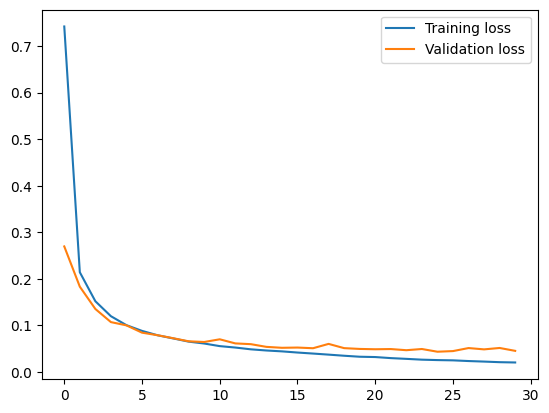

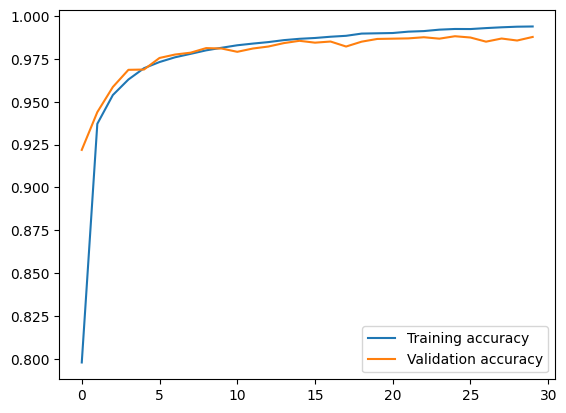

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
375/375 [==============================] - 5s 8ms/step - loss: 3.4222 - accuracy: 0.1058 - val_loss: 2.3047 - val_accuracy: 0.0978
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 2.3072 - accuracy: 0.1049 - val_loss: 2.3075 - val_accuracy: 0.1016
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 2.3078 - accuracy: 0.1050 - val_loss: 2.3036 - val_accuracy: 0.1082
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 2.3074 - accuracy: 0.1029 - val_loss: 2.3099 - val_accuracy: 0.0967
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 2.3082 - accuracy: 0.1039 - val_loss: 2.3040 - val_accuracy: 0.1102
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 2.3066 - accuracy: 0.1067 - val_loss: 2.3022 - val_accuracy: 0.1102
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 2.3068 - accuracy: 

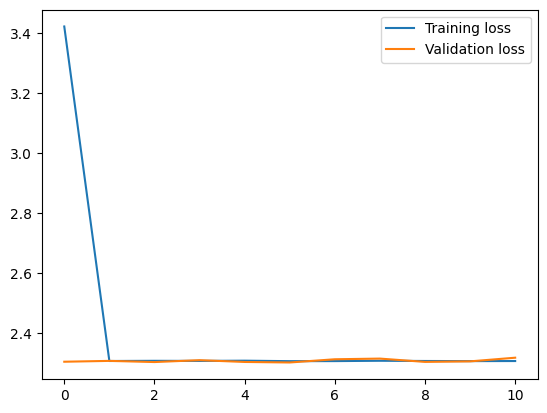

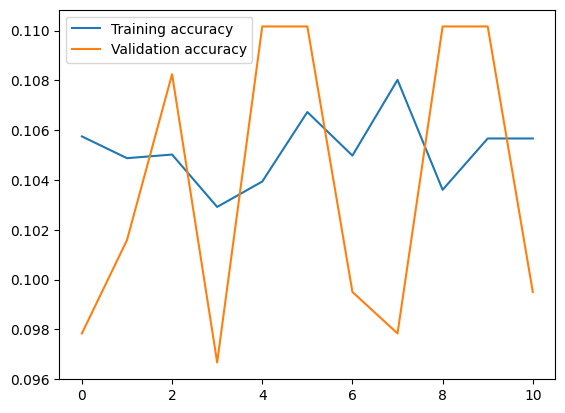

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
375/375 [==============================] - 5s 8ms/step - loss: 0.1663 - accuracy: 0.9475 - val_loss: 0.0747 - val_accuracy: 0.9774
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0612 - val_accuracy: 0.9828
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0577 - val_accuracy: 0.9849
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0572 - val_accuracy: 0.9841
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0517 - val_accuracy: 0.9861
Epoch 6/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.0730 - val_accuracy: 0.9808
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0367 - accuracy: 

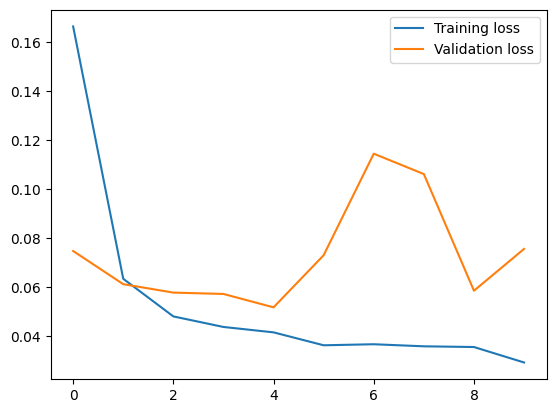

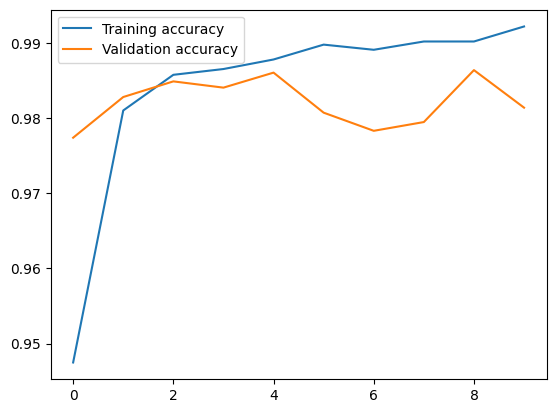

375/375 [==============================] - 1s 2ms/step
Epoch 1/50
375/375 [==============================] - 5s 8ms/step - loss: 0.3209 - accuracy: 0.9018 - val_loss: 0.0927 - val_accuracy: 0.9725
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0805 - accuracy: 0.9756 - val_loss: 0.0591 - val_accuracy: 0.9812
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0509 - val_accuracy: 0.9850
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0542 - val_accuracy: 0.9827
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0448 - val_accuracy: 0.9866
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 7/50
375/375 [==============================] - 3s 7ms/step - loss: 0.0251 - accuracy: 

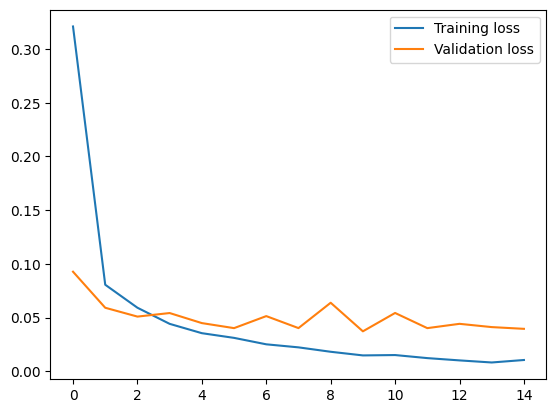

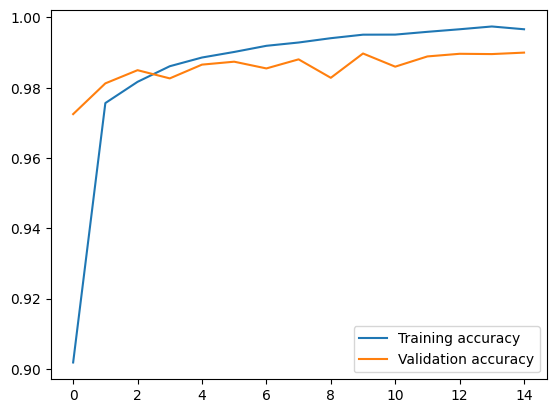

375/375 [==============================] - 1s 3ms/step
Epoch 1/50
375/375 [==============================] - 4s 6ms/step - loss: 1.0084 - accuracy: 0.7299 - val_loss: 0.3128 - val_accuracy: 0.9164
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2580 - accuracy: 0.9249 - val_loss: 0.2050 - val_accuracy: 0.9395
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1869 - accuracy: 0.9450 - val_loss: 0.1600 - val_accuracy: 0.9541
Epoch 4/50
375/375 [==============================] - 3s 9ms/step - loss: 0.1498 - accuracy: 0.9551 - val_loss: 0.1342 - val_accuracy: 0.9612
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1270 - accuracy: 0.9616 - val_loss: 0.1173 - val_accuracy: 0.9652
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1095 - accuracy: 0.9673 - val_loss: 0.1055 - val_accuracy: 0.9684
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0975 - accuracy: 

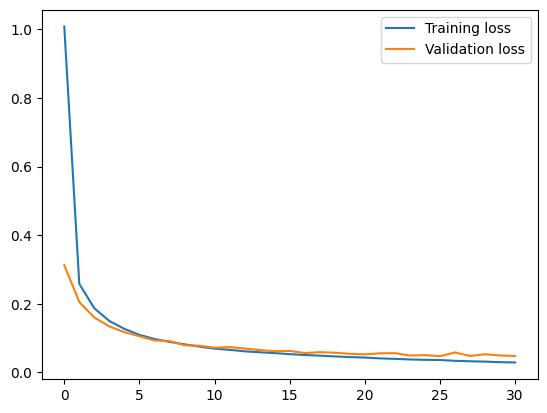

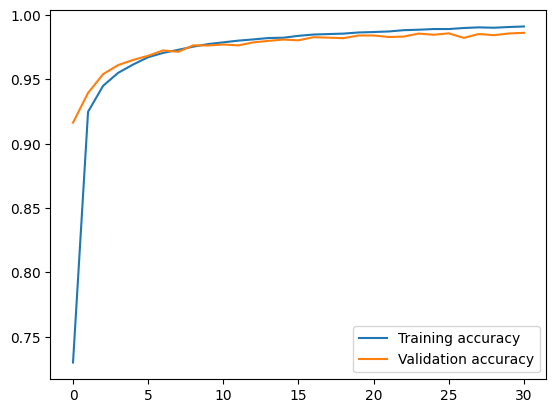

375/375 [==============================] - 1s 2ms/step
Optimizador: AdamW
Batch size: 32, Learning rate: 0.1, Validation accuracy: 0.098
Batch size: 32, Learning rate: 0.01, Validation accuracy: 0.9795833333333334
Batch size: 32, Learning rate: 0.001, Validation accuracy: 0.9905833333333334
Batch size: 32, Learning rate: 0.0001, Validation accuracy: 0.9876666666666667
Batch size: 64, Learning rate: 0.1, Validation accuracy: 0.098
Batch size: 64, Learning rate: 0.01, Validation accuracy: 0.9839166666666667
Batch size: 64, Learning rate: 0.001, Validation accuracy: 0.9893333333333333
Batch size: 64, Learning rate: 0.0001, Validation accuracy: 0.9881666666666666
Batch size: 128, Learning rate: 0.1, Validation accuracy: 0.11016666666666666
Batch size: 128, Learning rate: 0.01, Validation accuracy: 0.9860833333333333
Batch size: 128, Learning rate: 0.001, Validation accuracy: 0.98975
Batch size: 128, Learning rate: 0.0001, Validation accuracy: 0.9858333333333333


In [ ]:
batch_sizes = [32,64,128]
learning_rates = [0.1,0.01,0.001,0.0001]
resultados_adamw = []

for batch_size in batch_sizes:
  for lr in learning_rates:
    modelo_adamw = modeloCNN()
    opt_adw = AdamW(learning_rate=lr)
    modelo_adamw.compile(optimizer=opt_adw,loss='categorical_crossentropy',metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

    hist = modelo_adamw.fit(x_entrenar,y_entrenar,epochs=50,batch_size=batch_size,validation_data=(x_val,y_val),callbacks=[early_stopping])
    mostrarEvolucion(hist)

    val_acc = calcularAccuracy(y_val,modelo_adamw.predict(x_val))
    resultados_adamw.append((batch_size,lr,val_acc))

# Imrpimir resultados
print("Optimizador: AdamW")
for batch_size,lr,acc in resultados_adamw:
    print(f"Batch size: {batch_size}, Learning rate: {lr}, Validation accuracy: {acc}")

Usando el optimizador AdamW se puede observar un comportamiento en las curvas de aprendizaje distinto al del optimizador Adedelta, teniendo cambios más bruscos.

Como se indicó antes, se busca un modelo que mantenga cierto equilibrio entre pérdida y accuracy, buscando minimizar la primero y maximizar la segunda en validación., evitando en la medida de lo posible el sobreajuste.

Si solo nos fijamos en el accuracy en validación, podemos observar que bastantes modelo presentan valores bastantes elevados.

In [ ]:
# Obtener mejores hiperparámetros
best_batch_size_adamw, best_lr_adamw, best_acc_adamw = max(resultados_adamw, key=lambda item: item[2])
print(f"Mejores hiperparámetros para AdamW -> Batch size: {best_batch_size_adamw}, Learning rate: {best_lr_adamw}, Validation accuracy: {best_acc_adamw}")

Mejores hiperparámetros para AdamW -> Batch size: 32, Learning rate: 0.001, Validation accuracy: 0.9905833333333334


El mejor valor de accuracy en validación lo dan los hiperparámetros mostrados, superando con muy poca diferencia a otras combinaciones. Si observamos la gráfica de evolución de aprendizaje (en este caso, la tercera), nos encontramos con una situación en la que el valor de la función de pérdida es muy pequeño y el accuracy es alto, pero a partir de cierto punto el modelo está empezando a sobreajustar (aunque no en exceso dada la pequeña magnitud de los valores de pérdida) Además, la velocidad de convergencia es bastante alta, por lo que se puede reducir el valor de patiente en Early Stopping. Por ello, se vuelve a entrenar este modelo y se muestran las métricas para evaluar la validación del modelo, reduciendo a `patiente=3`.

##### Resultados en validación del mejor modelo con AdamW

Epoch 1/50
1500/1500 [==============================] - 11s 6ms/step - loss: 0.1954 - accuracy: 0.9399 - val_loss: 0.1043 - val_accuracy: 0.9665
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0461 - val_accuracy: 0.9862
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0462 - val_accura

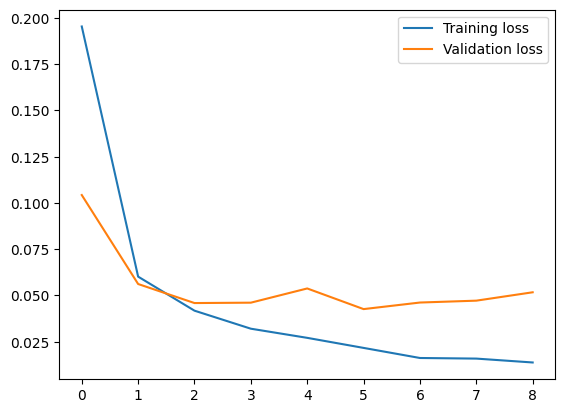

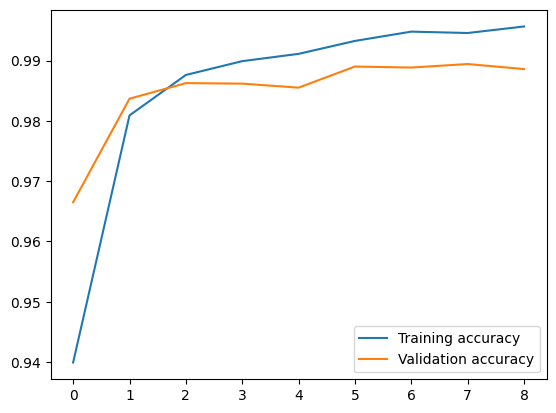

375/375 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.9890
La matriz de confusión en Validación es:
[[1164    0    2    0    1    0    5    0    0    3]
 [   0 1320    0    0    0    0    1    0    0    1]
 [   1    3 1167    0    0    0    0    0    2    1]
 [   0    0   10 1195    0    4    0    2    5    3]
 [   0    0    0    0 1168    0    0    2    0    6]
 [   3    0    0    3    1 1088    3    0    5    1]
 [   2    1    1    0    2    2 1166    0    3    0]
 [   1    2    8    1    1    0    0 1280    4    2]
 [   1    0    4    0    1    2    1    0 1150    1]
 [   1    1    1    1   13    2    0    3    2 1170]]


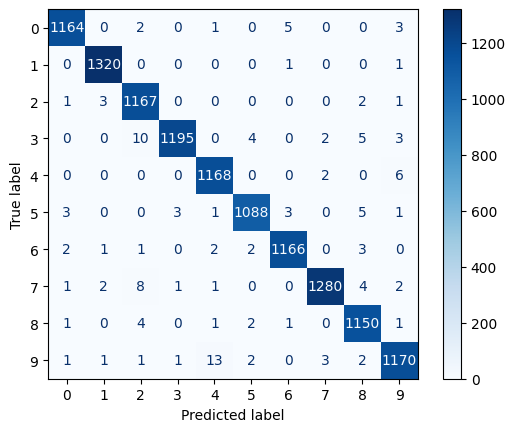

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      1.00      1.00      1322
           2       0.98      0.99      0.99      1174
           3       1.00      0.98      0.99      1219
           4       0.98      0.99      0.99      1176
           5       0.99      0.99      0.99      1104
           6       0.99      0.99      0.99      1177
           7       0.99      0.99      0.99      1299
           8       0.98      0.99      0.99      1160
           9       0.98      0.98      0.98      1194

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [ ]:
# Definir el tamaño de batch y la tasa de aprendizaje
mejor_s_batch_adamw = 32
mejor_lr_adamw = 0.001
mejor_patiente = 3

# Definir y compilar el modelo CNN
mejor_adamw = modeloCNN()
opt_adamw = AdamW(learning_rate=mejor_lr_adamw)
mejor_adamw.compile(optimizer=opt_adamw, loss='categorical_crossentropy', metrics=['accuracy'])

# Configurar el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=mejor_patiente, restore_best_weights=True)

# Entrenar el modelo
hist = mejor_adamw.fit(x_entrenar, y_entrenar, epochs=50, batch_size=mejor_s_batch_adamw, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(hist)

# Mostrar rendimiento en validación
metricasInfo(mejor_adamw,x_val,y_val,'Validación')

Los resultados se explican por separado:

- Gráficas: Tanto las curvas de aprendizaje como el accuracy en validación parecen mantenerse, por lo que ha sido conveniente la reducción de patiente hecha en Early Stopping.

- Matriz de confusión: Muchas predicciones hechas por la red son acertadas, casi cercanas al total de predicciones, por lo que es normal que la métrica accuracy en validación sea muy buena. Respecto a predicciones erróneas, son un número muy bajo, y donde más parecen concentrarse es en números que puedan tener un símbolo parecido (de nuevo, el $9$ y el $4$).

- Classification Report: De nuevo, se presentan valores excelentes para este problema. La precisión, como se pudo ver anteriormente, es muy buena, el recall indica que la cantidad de verdaderos positivos es muy elevada, el F1-Score indica muy buen balance entre precisión y recall. Por clase, se observa que las métricas son muy buenas, llegando incluso a ser perfectas como es el caso de la precisión en el $3$, teniendo en cuenta que puede tener una forma parecida al $8$.

Si se observan las gráficas de evolución de aprendizaje, se comprueba que ambos modelos acaban presentando valores muy bajos de pérdida y muy altos de accuracy, esto en validación.

Haciendo uso del report, se puede comprobar que ambos tienen una precisión global de $0.99$ y resultados globales similares, por lo que para poder distinguir distintos rendimientos hay que evaluar las métricas por clase.

En el caso de la clase $0$, el modelo con Adadelta tiene un mejor rendimiento en comparación con el modelo con AdamW, aunque la situación cambia para la clase $3$. Esta diferencia, por pequeña que sea, puede ser significativa en la generalización del modelo, y la elección del modelo puede verse influida en función del escenario: si se prefiere tener mejor rendimiento en término de precisión y recall para todas las clases, se tomaría el optimizador Adadelta, pero si se valora una precisión perfecta en clases como $3$, se escogería el optimizador AdamW. Por otro lado, a grandes rasgos, tras la comparación con los mismos hiperparámetros entre resultados de ambos optimizadores, que el optimizador Adadelta funciona peor a menor valor de learning rate, mientras que AdamW es mejor a mayor valor de learning rate.

Para aplicar los datos de test, se escogerá el modelo con optimizador Adadelta, cuyos hiperparámetros serán los obtenidos experimentalmente en las ejecuciones anteriores, ya que aunque los dos tienen muy buenas métricas, Adadelta ajusta dinámicamente el learning rate durante el entrenamiento según la evolución del mismo y los datos empleados, y según la matriz de confusión parece que las predicciones erróneas no se concentran mucho en ciertas clases específicas.

Epoch 1/50
1500/1500 [==============================] - 18s 8ms/step - loss: 0.4262 - accuracy: 0.8696 - val_loss: 0.1711 - val_accuracy: 0.9498
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1474 - accuracy: 0.9556 - val_loss: 0.1249 - val_accuracy: 0.9643
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1134 - accuracy: 0.9662 - val_loss: 0.0983 - val_accuracy: 0.9711
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0940 - accuracy: 0.9714 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0809 - accuracy: 0.9758 - val_loss: 0.0798 - val_accuracy: 0.9757
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0719 - val_accuracy: 0.9781
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0658 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy

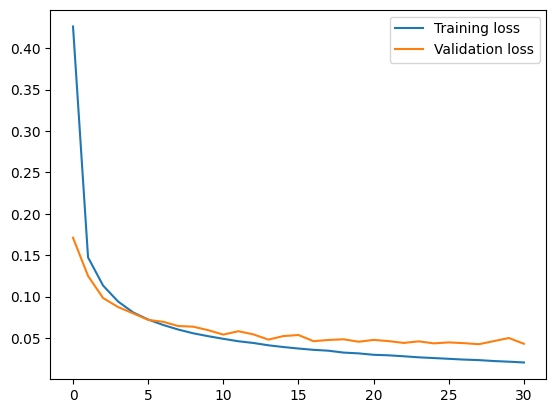

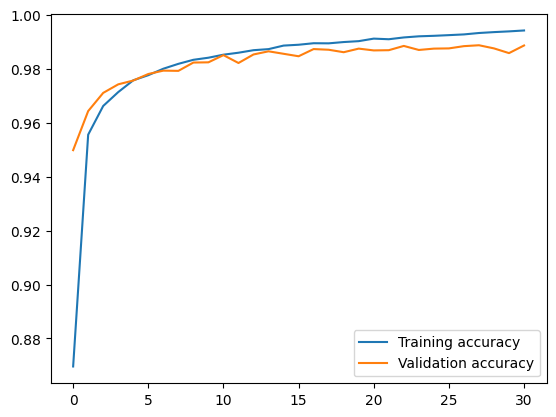

In [ ]:
mejor_s_batch = 32
mejor_lr = 0.1
mejor_patiente = 3

mejor_modelo = modeloCNN()
mejor_opt = Adadelta(learning_rate=mejor_lr)
mejor_modelo.compile(optimizer=mejor_opt, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=mejor_patiente, restore_best_weights=True)

hist = mejor_modelo.fit(x_entrenar, y_entrenar, epochs=50, batch_size=mejor_s_batch, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(hist)

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [ ]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(60000, 16)


HOG es un descriptor de características que divide una imagen en pequeñas regiones conectadas (llamadas celdas) y, por celda, se contruye un histograma de gradientes orientados. Estos histogramas se concatenan para formar un descriptor que describe las características locales de la imagen. Es un método bastante robusto frente a variaciones de iluminación y es bastante eficiente en la detección de bordes, aunque es computacionalmente costoso (debido al calculo de gradientes y formación de histogramas) y se limita a características locales.

El algoritmo SVM será entrenado con las características extraídas con el algoritmo HOG (características HOG) y, cuando se termine la evaluación del modelo para distintos hiperparámetros, se procederá a comparar los resultados (en test) con los resultados (en test) dados por la red neuronal anterior.

En adición, varias de las ventajas que da esta fusión de algoritmos es la eficiencia en la detección de objetos (son algoritmos robustos, HOG captura eficazmente la forma y contornos), incluso en imágenes con variaciones de luminosidad, es una buena opción para mejorar en la generalización del modelo y como HOG reduce la dimensionalidad de la imagen, facilita el entrenamiento y predicción de SVM.

Por otro lado, es bastante sensible a la elección de hiperparámetros (razón por lo que se hará un estudio exhaustivo con varios), puede no capturar bien características locales (debido a los resultados de HOG), es poco escalable en cuanto al tamaño de los datos para entrenar SVM y si la separación entre clases no es lineal, se requiere de un kernel como RBF para SVM, que añade complejidad y aumenta el tiempo de ejecución.

### Análisis exploratorio de datos

#### Tipo de los datos

Primero se hace un acercamiento al problema afrontado mediante el uso de características HOG mostrando sus estadísticos y el tipo de dato de cada característica.

In [ ]:
import pandas as pd

print(pd.DataFrame(x_train_HOG).dtypes)

0     float32
1     float32
2     float32
3     float32
4     float32
5     float32
6     float32
7     float32
8     float32
9     float32
10    float32
11    float32
12    float32
13    float32
14    float32
15    float32
dtype: object


#### Estadísticos medios

Todos los datos son numéricos, por lo que se puede continuar con el análisis exploratorio de los datos y, en caso de existir datos perdidos (aunque no parece haber), se podrán tratar como variables numéricas continuas.

In [ ]:
print(pd.DataFrame(x_train_HOG).describe())

                 0             1             2             3             4   \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.094578      0.068715      0.041620      0.018313      0.270686   
std        0.109513      0.107778      0.093550      0.046215      0.186309   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.099161   
50%        0.056386      0.000000      0.000000      0.000000      0.301320   
75%        0.155878      0.105209      0.024188      0.000000      0.395264   
max        0.519225      0.548469      0.562386      0.463498      0.703932   

                 5             6             7             8             9   \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.280381      0.295678      0.146812      0.239512      0.089946   
std        0.140940      0.122368      0.135380    

Se puede observar que cada dato presenta $16$ características. Además, hay $60000$ muestras, por lo que es muy conveniente aplicar reducción de dimensionalidad para disminuir el tiempo de entrenamiento de SVM.

En relación a los estadísticos, todas las características parecen estar normalizadas en un mismo intervalo. Sí es conveniente estandarizar los datos, ya que aunque la media y desviación típica es parecida, es buena práctica si se va a entrenar un modelo como SVM. Además, parece existir cierta cantidad de outliers, lo cual se puede observar en el siguiente boxplot.

#### Boxplot

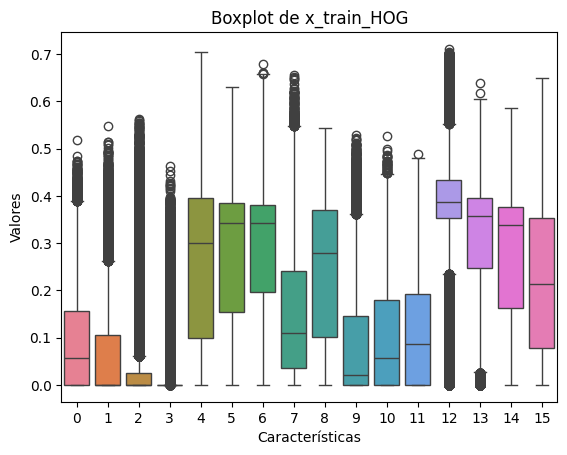

In [ ]:
import seaborn as sns

sns.boxplot(data=pd.DataFrame(x_train_HOG))
plt.title('Boxplot de x_train_HOG')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

Observamos que, mientras hay características que no tienen outliers como la etiquetada como $15$, otras como la etiquetada como $3$ presentan una gran cantidad de ellos (lo cual podría intuirse por tener tercer cuartil nulo pero un valor positivo como máximo).

#### Histograma de características

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>]],
      dtype=object)

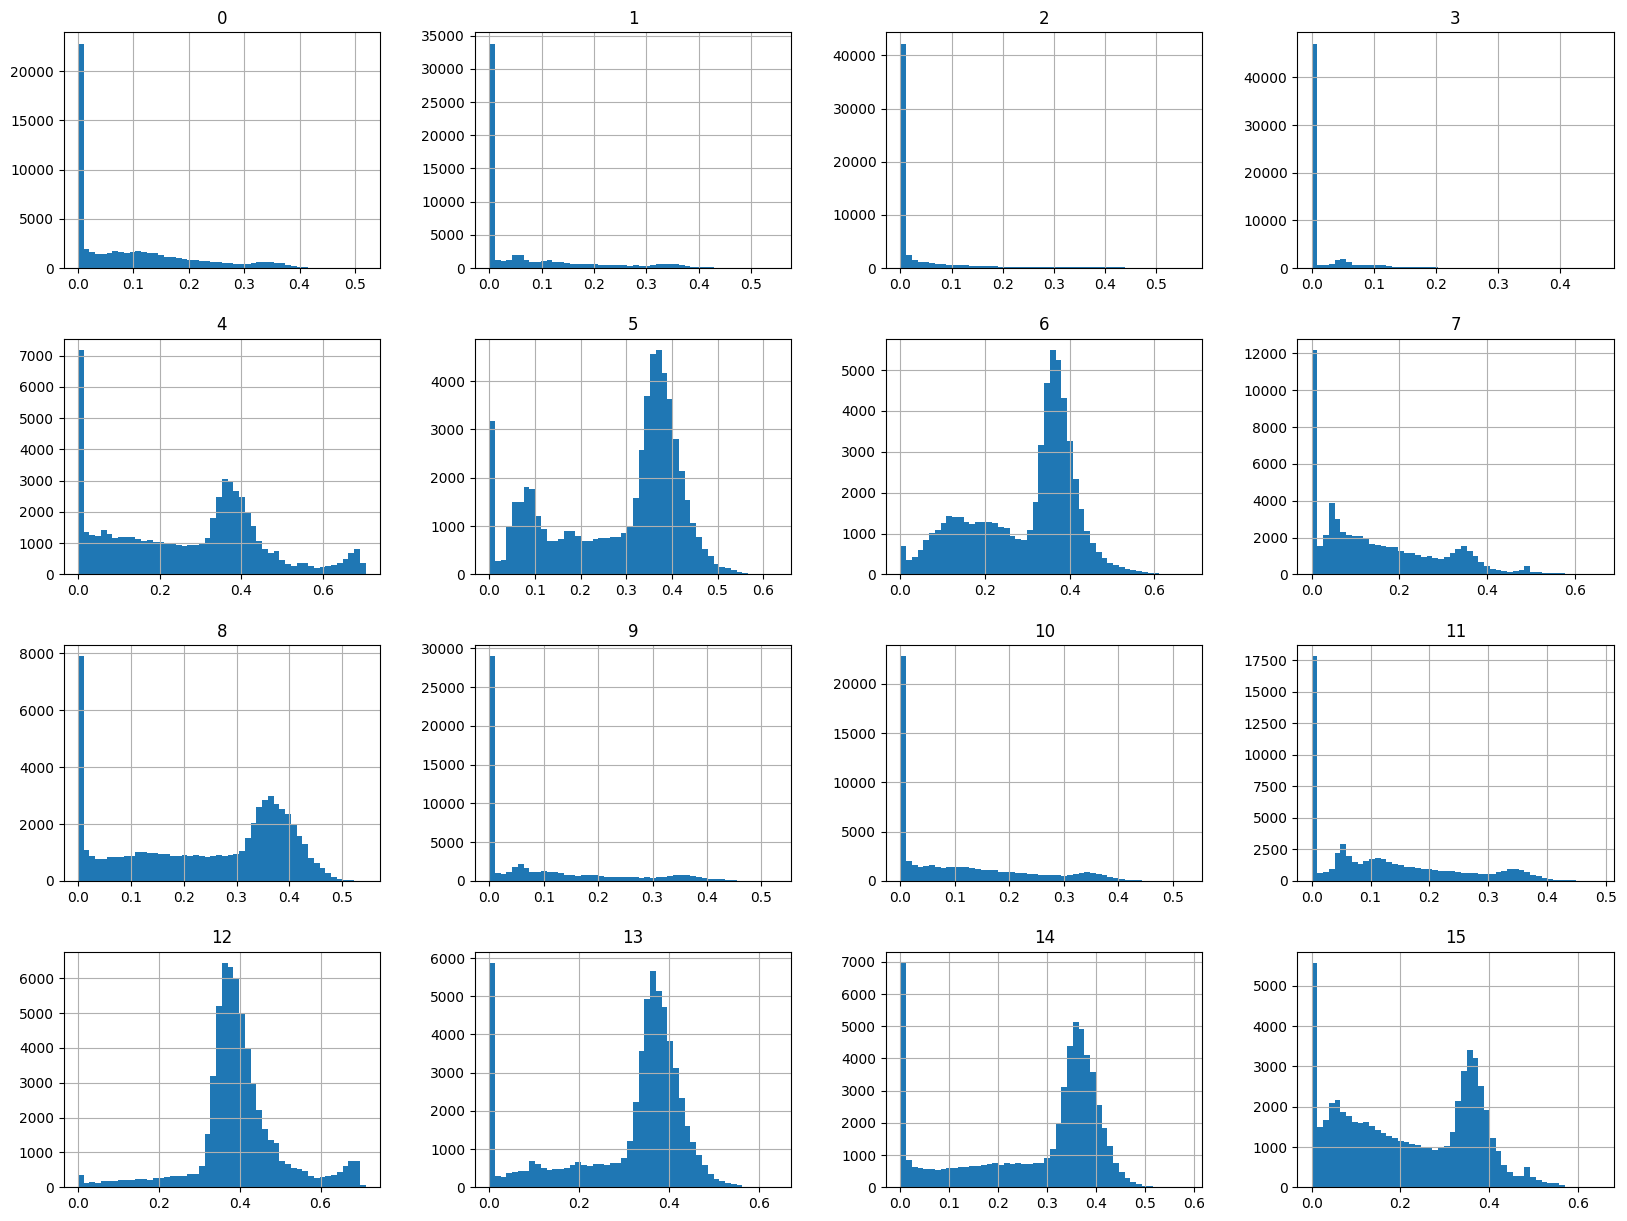

In [ ]:
pd.DataFrame(x_train_HOG).hist(bins=50,figsize=(20,15))

De los histogramas por características extraídos se pueden hacer las siguientes observaciones:

- Características como las etiquetadas por $0$ o $1$ parecen estar sesgadas a la izquierda.

- Características como las etiquetadas con $4$, $6$ o $13$ presentan más de un máximo, por lo que parecen ser multimodales  (hay varios valores o rangos de valores que son comunes en el conjunto).

- Presencia de outliers en características como la etiquetada con $3$ (relacionándose con el comentario del boxplot).

Se pueden hacer los siguientes comentarios por propiedades especiales presentadas por algunas características:

- La característica marcada con $4$ es bimodal.

- La característica etiquetada con $5$ es multimodal, sugiriendo que hay varias subpoblaciones en los datos.

- La característica marcada como $12$ es unimodal con un pico ancho, indicando variablidad considerable en el rango de la característica.

In [ ]:
corr_matrix = pd.DataFrame(x_train_HOG).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

No se hará un análisis de la matriz de correlaciones ya que se supera la cantidad de RAM dada por Google Colab. Sin embargo, se usarán otras gráficas durante el análisis exploratorio para poder entender suficientemente el problema sin necesidad de interpretar la matriz de correlaciones.

#### Valores perdidos

Ahora se comprobará si existen valores perdidos en el conjunto.

In [ ]:
print("Valores perdidos: \n")

missing_values = pd.DataFrame(x_train_HOG).isnull().sum()
print(missing_values[missing_values > 0])

Valores perdidos: 

Series([], dtype: int64)


Se observa que no hay valores perdidos, por lo que no será necesario tratarlos.

#### Varianza por característica

In [ ]:
print("Varianzas: \n")
print(pd.DataFrame(x_train_HOG).var())

Varianzas: 

0     0.011993
1     0.011616
2     0.008752
3     0.002136
4     0.034711
5     0.019864
6     0.014974
7     0.018328
8     0.022646
9     0.014988
10    0.014498
11    0.013907
12    0.011810
13    0.019612
14    0.020634
15    0.021699
dtype: float32


Respecto a la varianza presentada por característica, se hacen las siguientes observaciones:

- Las características marcadas de $0$ a $3$ tienen varianzas bajas en comparación al resto, sugiriendo que sus valores están más concentrados en torno a las respectivas medias.

- La característica $4$ tiene la varianza más alta, indicando una mayor dispersión.

- Las características etiquetadas de $5$ hasta $15$ presentan un amplio rango de varianzas, desde valores medios hasta valores altos, presentando una variabilidad considerable.

En conclusión, dado que podría considerarse que la varianza presentada por algunas características es mayor que la de otras, sería oportuno realizar una estandarización.

#### Densidad por característica

Visualización de características: 



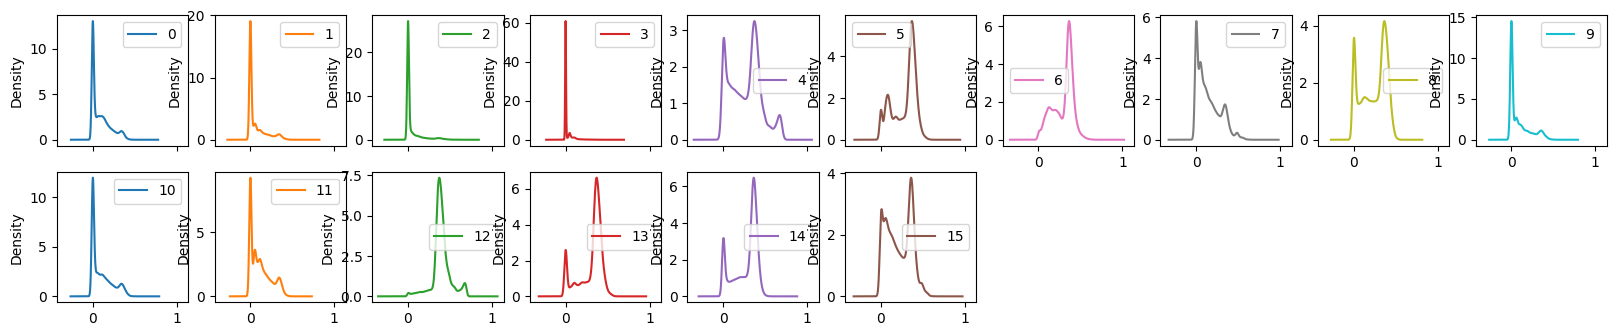

In [ ]:
print("Visualización de características: \n")
pd.DataFrame(x_train_HOG).plot(kind='density',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

Podemos encontrar una situación similar a la mostrada en los histogramas: características como la marcada con $0$ presentan sesgo a la izquierda con una marcada cola a la derecha, mientras que otras como la $13$ presentan mulimodalidad tal y como se indicó antes u otras como la $1$ o $2$ presentan una función de densidad muy alta en un intervalo pequeño, sugiriendo baja varianza (hecho que se puede comprobar en el anterior análisis de la varianza por característica).

### Preprocesamiento

No será necesario realizar normalización dado que todos los valores ya están en el intervalo $[0,1]$ según los estadísticos máximo y mínimo por característica.

#### Estandarización

Para empezar con el preprocesado, vamos a estandarizar las características por lo antes mencionado (recomendable por ser SVM el modelo a entrenar).

In [ ]:
from sklearn.preprocessing import StandardScaler

estandar = StandardScaler()
x_train_HOG = estandar.fit_transform(x_train_HOG)
x_test_HOG = estandar.transform(x_test_HOG)

In [ ]:
print(pd.DataFrame(x_train_HOG).describe())
print(pd.DataFrame(x_test_HOG).describe())

                 0             1             2             3             4   \
count  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   
mean  -1.271566e-08 -2.136230e-08 -1.932780e-08 -1.907349e-08 -5.086263e-09   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -8.636292e-01 -6.375674e-01 -4.448947e-01 -3.962514e-01 -1.452898e+00   
25%   -8.636292e-01 -6.375674e-01 -4.448947e-01 -3.962514e-01 -9.206546e-01   
50%   -3.487496e-01 -6.375674e-01 -4.448947e-01 -3.962514e-01  1.644262e-01   
75%    5.597550e-01  3.386096e-01 -1.863345e-01 -3.962514e-01  6.686650e-01   
max    3.877629e+00  4.451355e+00  5.566766e+00  9.632951e+00  2.325430e+00   

                 5             6             7             8             9   \
count  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04  6.000000e+04   
mean   3.051758e-09 -8.138021e-09  4.069010e-09  1.500448e-08 -1.525879e-09   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.

#### Reducción de dimensionalidad

Tras aplicar una estandarización a los datos, , se procede a aplicar ACP para intentar reducir la dimensionalidad. Para ello primero se visualiza un scree plot con el que observar la cantidad de varianza acumulada según la cantidad de características considerada.

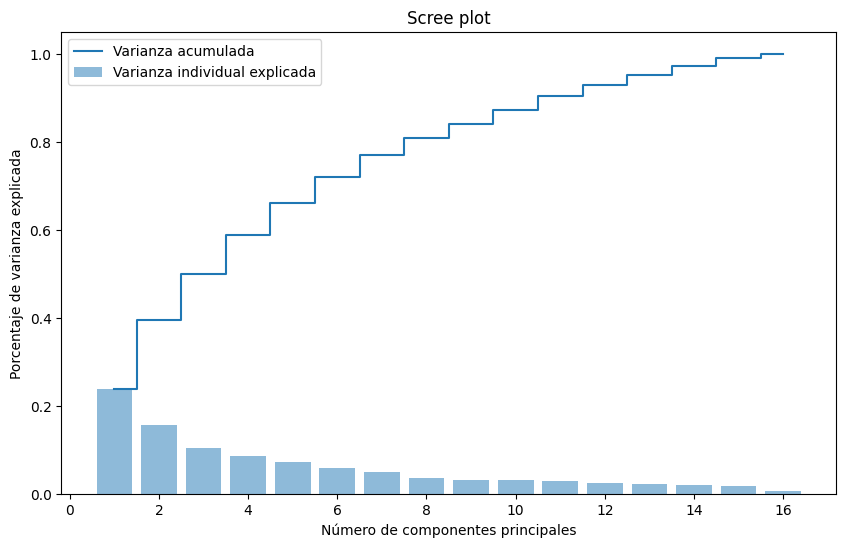

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train_HOG)

# Varianza explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Varianza acumulada
var_acum = np.cumsum(var_explicada)

# Visualización del scree plot
plt.figure(figsize=(10,6))
plt.bar(range(1,len(var_explicada) + 1),var_explicada,alpha=0.5,align='center',label='Varianza individual explicada')
plt.step(range(1,len(var_acum) + 1), var_acum,where='mid',label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

Buscamos mantener el $95$% de la varianza explicada, por lo que se calcula el número de componentes se puede calcular, de forma gráfica, trazando una línea horizontal, $y=0.95$, la cual cortará a la gráfica en el punto $x=13$.

Para un cálculo más seguro del número de componentes necesarios, se ejecuta el siguiente código.

In [ ]:
threshold = 0.95    # Mantenemos el 95% de varianza acumulada y reducimos algunas características
num_componentes = np.argmax(var_acum>=threshold)+1
print(f'El {threshold*100}% de la varianza acumulada es explicada por {num_componentes} componentes')

El 95.0% de la varianza acumulada es explicada por 13 componentes


Finalmente, se aplica reducción de dimensionalidad tanto al conjunto de entrenamiento como al de test.

In [ ]:
pca = PCA(n_components=num_componentes)
x_train_HOG_tras_pca = pca.fit_transform(x_train_HOG)
x_test_HOG_tras_pca = pca.transform(x_test_HOG)

### Justifiación de hiperparámetros para experimentación. Técnica de validación usada

Para buscar un buen modelo SVM, se experimenta con varios valores de los hiperparámetros C y kernel.

Primero se ajusta para valores pequeños de C, como $0.1$, para una regularización alta (SVM buscará un margen más amplio, lo que se puede traducir en una mayor tolerancia a errores de clasificación, puediendo evitar el sobreajuste). Progresivamente se prueba con otros valores hasta un valor grande, como $100$, que implica regularización baja (SVM intentará clasificar correctamente todos los puntos, por lo que se podría observar que el modelo se sobreajusta si para el problema se puede considerar grande).

También se experimenta con dos tipos de kernels. El kernel lineal es adecuado cuando los datos son, aproximadamente, linealmente separables, y RBF es más flexible y puede capturar relaciones no lineales complejas. Se usan los dos para poder cubrir varios casos en la dificultad de los datos y obtener el mejor.

Por último, otro hiperparámetro con el que se puede experimentar es `gamma`, ya que determina la influencia de un solo dato de entrenamiento en la creación de fronteras cuando se usan kernels como RBF, afectando a la complejidad del modelo y su capacidad de generalización. Se prueba con varios valores, del más grande con valor $1$ a más pequeños, con el objetivo de evaluar el rendimiento del modelo para estos valores. Un valor alto puede implicar alta precisión en entrenamiento porque se sobreajusta el modelo y un valor bajo puede llevar a infraajuste. Así, se busca el mejor valor del hiperparámetro para el problema.

Aunque pueda parecer que el gasto computacional pueda ser menor al caso de la red neuronal, la cantidad de datos con los que se entrena SVM sigue siendo muy elevado, por lo que usar cross-validation, aunque pueda parecer un mejor método, puede alargar en exceso la ejecución. Por ello, se aplica de nuevo hold-out donde un $20$% de los datos se destinarán a validación.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x_entrenar_HOG, x_val_HOG, y_entrenar_HOG, y_val_HOG = train_test_split(x_train_HOG_tras_pca, y_train, test_size=0.2, random_state=42)

### Código de experimentación

Es necesario hacer ciertas transformaciones a estructuras de datos que el método `.fit` espera de las etiquetas.

In [ ]:
y_entrenar_HOG = np.argmax(y_entrenar_HOG, axis=1) if y_entrenar_HOG.ndim > 1 else y_entrenar_HOG
y_val_HOG = np.argmax(y_val_HOG, axis=1) if y_val_HOG.ndim > 1 else y_val_HOG

In [ ]:
Cs = [0.1,1,10,100]
gammas = [1,0.1,0.01,0.001]
kernels = ['linear','rbf']

# Inicialización de variables para almacenar el mejor modelo y los resultados
best_accuracy = 0
best_params = {}
results = []

for C in Cs:
    for kernel in kernels:
        if kernel == 'rbf':
            for gamma in gammas:
                # Crear el modelo SVC con los hiperparámetros actuales
                modelo = SVC(C=C, kernel=kernel, gamma=gamma)

                # Entrenar el modelo
                modelo.fit(x_entrenar_HOG, y_entrenar_HOG)

                # Evaluar en el conjunto de validación
                y_val_pred = modelo.predict(x_val_HOG)

                val_acc = accuracy_score(y_val_HOG, y_val_pred)

                # Almacenar los resultados para el conjunto completo de entrenamiento
                results.append({
                    'C': C,
                    'kernel': kernel,
                    'gamma': gamma,
                    'accuracy': val_acc
                })
                print(f'C: {C}, Kernel: {kernel}, Gamma: {gamma}, Accuracy: {val_acc}')
                if val_acc > best_accuracy:
                    best_accuracy = val_acc
                    best_params = {'C': C, 'kernel': kernel, 'gamma': gamma}
        else:
            # Crear el modelo SVC con los hiperparámetros actuales (sin gamma para kernel linear)
            modelo = SVC(C=C, kernel=kernel)

            # Entrenar el modelo
            modelo.fit(x_entrenar_HOG, y_entrenar_HOG)

            # Evaluar en el conjunto de validación
            y_val_pred = modelo.predict(x_val_HOG)

            val_acc = accuracy_score(y_val_HOG, y_val_pred)

            # Almacenar los resultados para el conjunto completo de entrenamiento
            results.append({
                'C': C,
                'kernel': kernel,
                'gamma': 'n/a',
                'accuracy': val_acc
            })
            print(f'C: {C}, Kernel: {kernel}, Accuracy: {val_acc}')
            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_params = {'C': C, 'kernel': kernel}

# Mostrar todos los resultados
for result in results:
    print(f"C: {result['C']}, Kernel: {result['kernel']}, Gamma: {result['gamma']}, Accuracy: {result['accuracy']}")

C: 0.1, Kernel: linear, Accuracy: 0.7790833333333333
C: 0.1, Kernel: rbf, Gamma: 1, Accuracy: 0.5623333333333334
C: 0.1, Kernel: rbf, Gamma: 0.1, Accuracy: 0.8315
C: 0.1, Kernel: rbf, Gamma: 0.01, Accuracy: 0.7875833333333333
C: 0.1, Kernel: rbf, Gamma: 0.001, Accuracy: 0.72075
C: 1, Kernel: linear, Accuracy: 0.7801666666666667
C: 1, Kernel: rbf, Gamma: 1, Accuracy: 0.7944166666666667
C: 1, Kernel: rbf, Gamma: 0.1, Accuracy: 0.84975
C: 1, Kernel: rbf, Gamma: 0.01, Accuracy: 0.8195833333333333
C: 1, Kernel: rbf, Gamma: 0.001, Accuracy: 0.7733333333333333
C: 10, Kernel: linear, Accuracy: 0.7805
C: 10, Kernel: rbf, Gamma: 1, Accuracy: 0.7845833333333333
C: 10, Kernel: rbf, Gamma: 0.1, Accuracy: 0.8525833333333334
C: 10, Kernel: rbf, Gamma: 0.01, Accuracy: 0.8389166666666666
C: 10, Kernel: rbf, Gamma: 0.001, Accuracy: 0.7926666666666666
C: 100, Kernel: linear, Accuracy: 0.7805
C: 100, Kernel: rbf, Gamma: 1, Accuracy: 0.78225
C: 100, Kernel: rbf, Gamma: 0.1, Accuracy: 0.84025
C: 100, Kernel

In [ ]:
print(f"\nMejores parámetros: {best_params}")
print(f"Mejor accuracy en el conjunto de validación: {best_accuracy}")


Mejores parámetros: {'C': 10, 'kernel': 'rbf', 'gamma': 0.1}
Mejor accuracy en el conjunto de validación: 0.8525833333333334


Los resultados son, en general, bastante buenos. Sin embargo, son peores que los obtenidos con la red neuronal, demostrando la gran potencia que tienen las redes como algoritmos en tareas como clasificación.

Los mejores hiperparámetros son los mostrados anteriormente, con los que se entrenará de nuevo el modelo y se aplicarán los datos de test para comprobar si el modelo generaliza bien.

Como último apunte, el kernel usado en el mejor es RBF, lo que indica que los datos sobre los que se está trabajando presentan ciertos patrones que son difíciles de capturar con un kernel lineal.

In [ ]:
modelo_svm = SVC(C=10, kernel='rbf', gamma=0.1)
modelo_svm.fit(x_entrenar_HOG, y_entrenar_HOG)

SVC(C=10, gamma=0.1)

#### Resultados en validación

Puesto que no se está en una situación como la del apartado anterior, en que habría que comparar dos modelos para ver a cuál se le aplica test, no haría falta este apartado. Sin embargo, como se comparará con el mejor modelo de deep learning más adelante, se podría obtener información importante para la comparación.

Accuracy en validación: 0.8524
La matriz de confusión en validación es:
[[1020   15   12    2    3   13   28   17   48   17]
 [   9 1282    6    4    2    0    4    6    3    6]
 [  16    5  971   80   11   14    1   42   26    8]
 [   1    2   71  990    6   41    1   42   46   19]
 [   7    2   14    3 1028   16   86    3    9    8]
 [  16    3   15   66    4  885   12    4   57   42]
 [  21    3    2    0   68   14 1036    1   22   10]
 [  21    9   65   61   10    8    1 1095    6   23]
 [  33    1   29   42   15   45   25    7  897   66]
 [  22    2    6   22   12   30    8   16   51 1025]]


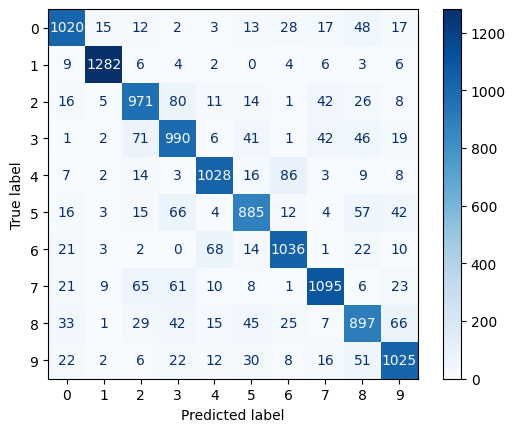

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1175
           1       0.97      0.97      0.97      1322
           2       0.82      0.83      0.82      1174
           3       0.78      0.81      0.80      1219
           4       0.89      0.87      0.88      1176
           5       0.83      0.80      0.82      1104
           6       0.86      0.88      0.87      1177
           7       0.89      0.84      0.86      1299
           8       0.77      0.77      0.77      1160
           9       0.84      0.86      0.85      1194

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [ ]:
# Mostrar rendimiento en validación
y_pred = modelo_svm.predict(x_val_HOG)

# Calcular la precisión
accuracy = sum(y_val_HOG == y_pred) / len(y_val_HOG)
print(f'Accuracy en validación: {accuracy:.4f}')

# Generar la matriz de confusión para el conjunto de validación
cm = confusion_matrix(y_val_HOG, y_pred)

print("La matriz de confusión en validación es:")
print(cm)

# Mostrar la matriz de confusión para el conjunto de validación
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Generar el informe de clasificación
report = classification_report(y_val_HOG, y_pred)
print("Classification Report:")
print(report)

Se procede a desglosar cada resultado:

. Accuracy: En validación, esta métrica vale casi $0.85$, lo cual es un resultado en general bueno cuando se trata con SVM.

- Matriz de confusión: Hay una gran cantidad de predicciones correctas, aunque también hay falsos positivos y falsos negativos: hay clases que son bastante fáciles de predecir para SVM como la etiquetada con $1$ y clases que son más difíciles de predecir como la etiquetada con $5$.

- Classification Report: La precisión varía entre clases (por ejemplo, es más fácil de predecir el $1$ que el $8$, entendiendo que hay casos en que el modelo será más robusto. Además, se puede indicar lo mismo del recall. Por ejemplo, el peor valor lo presenta $8$, indicando que es la clase que menos puede predecir el modelo.

En conclusión, parece tener un buen rendimiento global , aunque no perfecto. Funciona muy bien para el $1$ pero podría mejorar para el $8$.

### Comparación: SVM y deep learning

Antes de comparar los resultados obtenidos con ambos modelos, se enumeran ventajas y desventajas de ambos algoritmos en el contexto de clasificación de dígitos con MNIST.

VENTAJAS:

- **SVM**: Pueden ser algoritmos bastante eficientes cuando se usan características obtenidas por métodos de extracción buenos como HOG. Por ello, también puede dar una buena generalización, tal y como se ha visto, por su sólida construcción matemática

- **CNN**: Presentan un rendimiento superior en tareas de clasificación por su capacidad de aprender características más complejas (incluso de las que puede capturar SVM). Son escalables y tienen una gran capacidad de generalización si se usa la estrategia de regularización adecuada.

DESVENTAJAS:

- **SVM**: La cantidad de datos es bastante elevada, por lo que el gasto computacional se incrementa bastante. Además, aunque se use un kernel RBF, puede haber características no lineales que sean demasiado difíciles de capturar.

- **CNN**: Para poder conseguir un buen modelo, se necesita una gran cantidad de datos, lo cual acarrea un aumento muy elevado en el coste computacional. Es posible que pueda llegar a ser más compleja en lo que respecta a encontrar los mejores hiperparámetros, gastando muchos recursos para encontrarlos, y son modelos de caja negra y no se puede conocer el "razonamiento" realizado por la red para clasificar un dato.

Hasta ahora, los mejores resultados se recogen a continuación. No se indican los valores en la función de pérdida dada la buena generalización que presentan sendos modelos en test.

- CNN con Adadelta, tamaño de batch $32$ y learning rate $0.1$. Accuracy en validación de $0.986$.   

- SVM con puntos HOG, C es $10$, kernel RBF y gamma es $0.1$. Accuracy en validación de $0.8525$.

Puede observarse que el modelo que presenta mejores métricas es la red neuronal convolucional del primer ejercicio. Esto era de esperar puesto que, aunque la elección de puntos de entrenamiento para SVM no ha sido trivial (obtenidos con HOG), la potencia de las redes neuronales hace que estas ofrezcan mejores resultados en tareas como clasificación de imágenes. Además, la red usada ha podido capturar patrones complejos que no ha podido capturar SVM, hecho que se comprueba con el accuracy de ambos modelos, o incluso si se observan las métricas para clases como el $3$ y $8$.

##### Resultados en test del mejor modelo según validación

Habiendo entrenado al mejor modelo obtenido hasta el momento en el mismo conjunto de datos, MNIST, se evalua su rendimiento habiendo escogido todos los elementos e hiperparámetros necesarios, evitando así hacer data snooping (ya que dado que los resultados son casi perfectos, se cambiará de conjunto de datos para el apartado 1.3).

313/313 [==============================] - 1s 2ms/step
Accuracy en Test: 0.9885
La matriz de confusión en Test es:
[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1130    1    0    0    0    1    1    2    0]
 [   0    0 1025    0    1    0    0    4    2    0]
 [   0    0    1 1001    0    3    0    1    3    1]
 [   0    0    1    0  971    0    2    1    1    6]
 [   1    0    1    7    0  879    1    2    1    0]
 [   5    2    0    1    4    5  939    0    2    0]
 [   0    1    7    4    1    0    0 1014    0    1]
 [   3    1    3    4    1    3    0    1  954    4]
 [   1    2    0    5    4    1    0    1    0  995]]


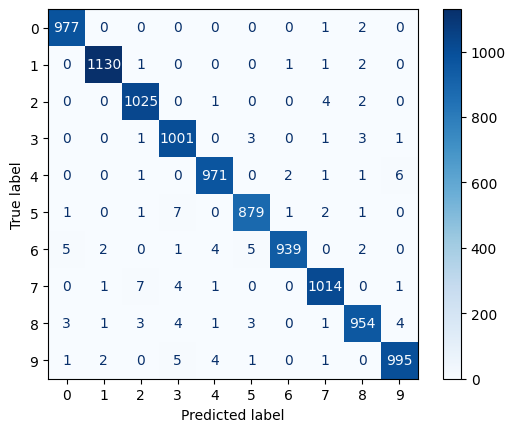

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Mostrar rendimiento en test
metricasInfo(mejor_modelo,x_test,y_test,'Test')

Los resultados en test son muy buenos, y se presentan a continuación:

- Matriz de confusión: La tasa de predicciones acertadas es muy elevada, y el número de predicciones erróneas parace ser ligeramente menor que las predichas mal en validación.

- Las métricas son muy buenas, llegando a estar la precisión al nivel de la precisión en validación. Sin embargo, en clases como $6$ incluso ha mejorado. Por otro lado, el recall y F1-score son bastante buenos, mostrando que el número de falsos positivos y falsos negativos es bajo (tal y como se ve en los elementos de fuera de la diagonal de la matriz de confusión).

En conclusión, en el modelo final no hay clases con un rendimiento significativamente inferior, y las métricas llevan a afirmar que el modelo es muy robusto y, dados los valores en test, el modelo es capaz de generalizar bien todas las clases. El modelo puede considerarse altamente confiable para tareas de clasificación de números como los que aparecen en el conjunto de datos empleado.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

### Importación de datos de CIFAR-10

Con la primera red se ha obtenido un accuracy prácticamente perfecto, por lo que para poder notar cierta mejoría con el nuevo diseño, se usará el conjunto CIFAR-10.

In [ ]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

num_classes = len(class_names)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Se muestran algunas imágenes como primer acercamiento al problema.

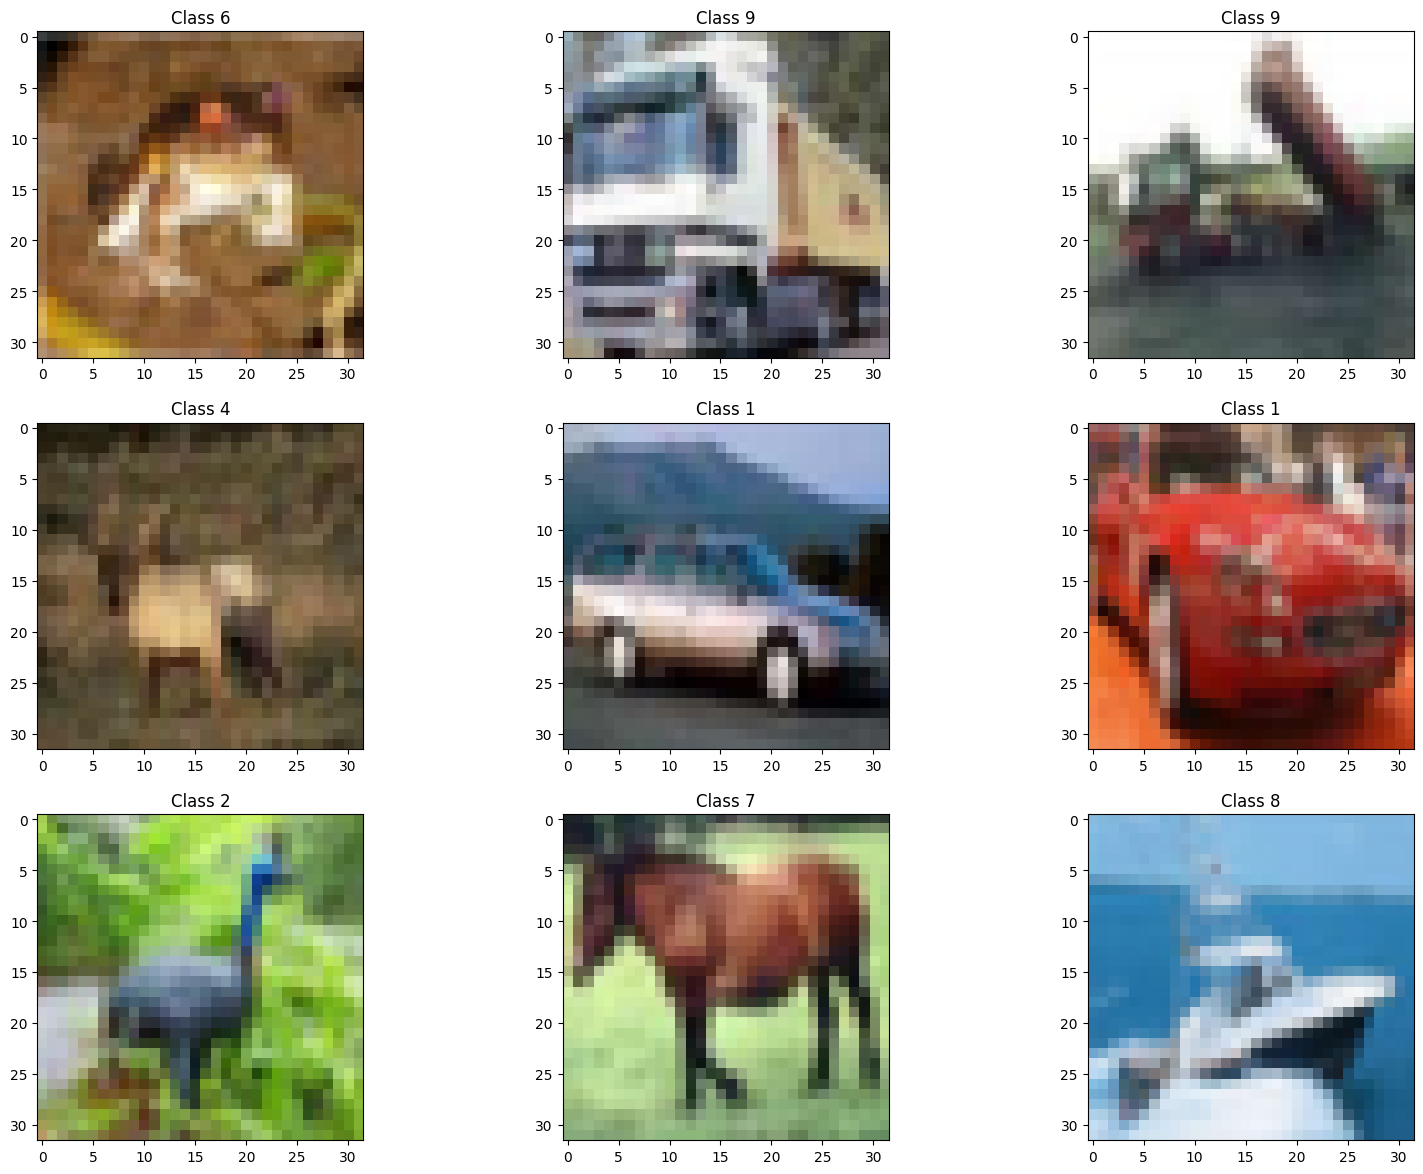

In [ ]:
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

Y se realizan las separaciones oportunas teniendo en cuenta que se usará hold-out como método de validación dado el gran coste computacional que acarrea el entrenamiento con redes neuronales (las razones son las mismas que las especificadas en la primera red). Para ello, se separan el conjunto en dos, teniendo uno de ellos el $20$% de las muestras, que será el conjunto de validación. El porcentaje se ha elegido teniendo en cuenta que, como la separación será aleatoria, los resultados aportados pueden ser fiables.

In [ ]:
from sklearn.model_selection import train_test_split

x_entrenar, x_val, y_entrenar, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Resultados con el mejor modelo del primer apartado

Antes de continuar, se tomará el modelo que mejores resultados ha dado en el apartado 1.1 (haciendo las modificaciones necesarias para los datos del nuevo conjunto) y se verán los resultados que da tanto en validación como en test. El objetivo de realizar esto es tener un punto de referencia a partir del que poder mejorar la red, por lo que se hará una revisión superficial de los resultados.

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adadelta

In [ ]:
def modeloCNNprimeroAlterado():
  return Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(16, kernel_size=(5,5), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ])


Epoch 1/50
1250/1250 [==============================] - 9s 6ms/step - loss: 1.9133 - accuracy: 0.3034 - val_loss: 1.6222 - val_accuracy: 0.4213
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5492 - accuracy: 0.4433 - val_loss: 1.4613 - val_accuracy: 0.4735
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4404 - accuracy: 0.4810 - val_loss: 1.3939 - val_accuracy: 0.4997
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3778 - accuracy: 0.5063 - val_loss: 1.3485 - val_accuracy: 0.5231
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3288 - accuracy: 0.5279 - val_loss: 1.3040 - val_accuracy: 0.5379
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2877 - accuracy: 0.5430 - val_loss: 1.2798 - val_accuracy: 0.5431
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2553 - accuracy: 0.5582 - val_loss: 1.2505 - val_accuracy:

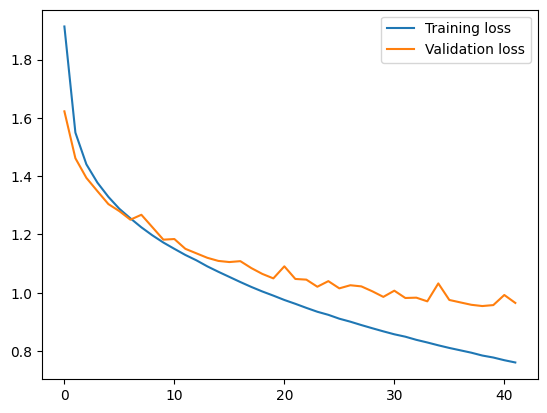

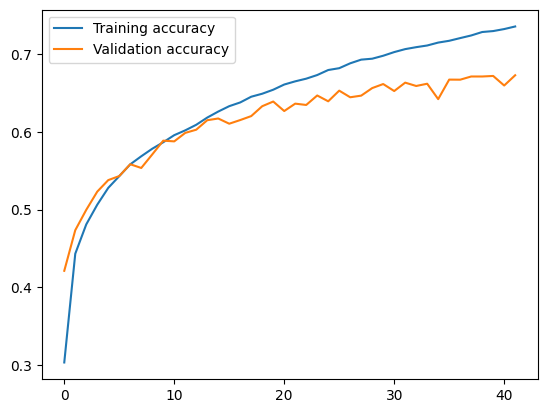

In [ ]:
mejor_s_batch = 32
mejor_lr = 0.1
mejor_patiente = 3

mejor_modelo = modeloCNNprimeroAlterado()
mejor_opt = Adadelta(learning_rate=mejor_lr)
mejor_modelo.compile(optimizer=mejor_opt, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=mejor_patiente, restore_best_weights=True)

hist = mejor_modelo.fit(x_entrenar, y_entrenar, epochs=50, batch_size=mejor_s_batch, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(hist)

313/313 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.6711
La matriz de confusión en Validación es:
[[741  23  40  13  19  11   5  20  65  36]
 [ 47 757  12  10   9   9   9   6  29  91]
 [ 93  15 554  57 103  83  52  50  18   5]
 [ 25   7  74 419  57 256  95  59  18  13]
 [ 34   6  63  29 594  39  44 102  19   3]
 [ 13   4  69 152  57 608  34  67   3   8]
 [ 15   8  50  62  68  22 740  10  10  11]
 [ 20   4  32  41  74  56   4 742   8  13]
 [100  35  12  13   2   7   4   6 807  31]
 [ 47 103  13  20  11  11  11  27  48 749]]


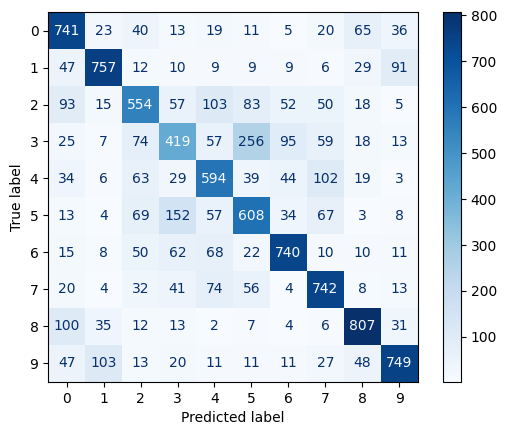

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       973
           1       0.79      0.77      0.78       979
           2       0.60      0.54      0.57      1030
           3       0.51      0.41      0.46      1023
           4       0.60      0.64      0.62       933
           5       0.55      0.60      0.57      1015
           6       0.74      0.74      0.74       996
           7       0.68      0.75      0.71       994
           8       0.79      0.79      0.79      1017
           9       0.78      0.72      0.75      1040

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [ ]:
metricasInfo(mejor_modelo,x_val,y_val,'Validación')

Las métricas en validación dan resultados que son peores que con MNIST. Si no se tuviese como referencia los resultados en MNIST, se diría que el rendimiento del modelo no es perfecto, pero es aceptable. Habría que mejorar la arquitectura de la red para mejores resultados, ya que se observa en la evolución de aprendizaje que el modelo estaba empezando a sobreajustarse a los datos de entrenamiento.

### Construcción y análisis de la nueva red

Teniendo un resultado en torno al $67$% de accuracy en validación como punto de partida, se comienza a construir la nueva red neuronal para clasificar imágenes de CIFAR-10.

Vamos a definir una extensión de la arquitectua de la red convolucional propuesta en el primer apartado, justificando cada paso.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

def modeloCNN_alumno():
    return Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

En primer lugar, ha sido necesario cambiar las dimensiones de entrada que espera el modelo: de imágenes $28 \times 28$ de un canal (en blanco y negro) a imágenes $32 \times 32$ de tres canales (a color).

A grandes rasgos se ha optado por añadir más profundidad a la red, capas nuevas como Dropout o normalización de batch y capas para extraer más características. La justificación de cada elección se hace a continuación:

- Cambio de entrada esperada: Por lo que se comentó, los datos en CIFAR-10 tienen nuevas dimensiones y tres canales.

- Incremento de la profundidad: Se diseña un modelo que utiliza tres capas convolucionales con número creciente de filtros, esperando así que el modelo maneje características más complejas y jerárquicas que estén en las imágenes.

- Normalización de batch: Tras cada capa convolucional y completamente conectada se normaliza el batch de los datos para poder estabilizar y acelerar el entrenamiento. Esto sería consecuencia de haber normalizado tras cada capa de activación en las capas intermedias. Por ello, se reduce la sensibilidad a la inicialización de hiperparámetros.

- Capas Dropout: Introducidas tras cada capa de MaxPooling, aplican una técnica de regularización para prevenir el sobreajuste y que el modelo aprenda características no robustas. Esta [técnica](https://www.garcia-ferreira.es/conoce-todo-sobre-el-dropout/) consiste en la desactivación de un porcentaje de neuronas aleatorio durante el entrenamiento, y se establece al $25$% o $50$% porque ha mostrado ser una valor eficaz tanto en [investigación](https://ar5iv.labs.arxiv.org/html/2401.01361) como en el [sector industrial](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).

- Regularización tras capas completamente conectadas: Mediante el uso de Dropout o normalización de batch, se intenta evitar que el modelo sobreajuste en capas completamente conectadas. En las capas DropOut se cambia el porcentaje de neuronas a desactivar aleatoriamente a $50$% por asegurar una mayor regularización y la garantía de que el modelo aprenda características robustas.

La elección de las dimensiones de salida por capa se realiza teniendo en cuenta que se usan tres capas convolucionales seguidas de capas MaxPooling, aplicando padding en cada capa convolucional para mantener el tamaño de la imagen. El objetivo de no alterar estas dimensiones por la propia operación de convolución es conseguir algunos de los beneficios que da esta práctica como la preservación de información en los bordes, que si presenta características importantes hay una alta probabilidad de que se mantengan tras aplicar MaxPooling.

Vamos a observar las características de la nueva red, comentando aquello que no fuese comentado en el primer apartado del ejercicio.

In [ ]:
modeloCNN_alumno().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       5

En relación a las nuevas capas añadidas:

- Capas de normalización de batch: Están diseñadas para normalizar las activacones de la capa previa, estabilizando el proceso de entrenamiento. Introducen parámetros no entrenables, usados para mantener una media y varianza promedios durante el entrenamiento, junto al uso de algunos parámetros entrenables (por ello la cantidad de no entrenables no coincide con la suma de parámetros en estas capas).

- Capas Dropout: Aplican la operación antes explicada. Por ello, no presentan parámetros ya que no los precisa.


### Data Augmentation

Ahora se procede a implementar un método de data augmentation, de manera que aumentará la cantidad de datos de entrenamiento y con ello la red podrá aprender características más robustas (por presentarse datos de entrenamiento con operaciones realizadas tales como zooms, rotaciones,...). Esta técnica consiste en tomar varias muestras del conjunto de entrenamiento y aplicar varias transformaciones afines, como rotaciones, homotecias,... La finalidad de realizar esto es que el modelo pueda aprender características robustas de las imágenes (con las que podrá detectar lo mismo en distintas situaciones, y no memorizará cierta situación a una etiqueta). Sin embargo, debe realizarse con cuidado, ya que puede haber situaciones que, tras aplicar la transformación, en realidad resulte en otro dato con etiqueta distinta (por ejemplo, rotar $6$ $\pi$ radianes resulta en $9$, y esta muestra estaría etiquetada como "seis", lo que puede hacer que el modelo aprenda peor).

En este caso, se aplican rotaciones (`rotation_range`), homotecias (zooms, `zoom_range`) y desplazamientos tanto en vertical (`height_shift_range`) como en horizontal (`width_shift_range`). Los valores de cada rango han sido elegidos considerando que la cantidad de muestras nuevas puedan ayudar en el aprendizaje de la red evitando que la imagen transformada no tenga sentido (por ejemplo, si se desplaza demasiado a la derecha, resultando en que la figura a detectar ha perdido la forma).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generadorDatos = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.1
)

Para que tenga resultado la técnica de Data Augmentation, se entrena al generador con las imágenes de entrenamiento. Es necesario remarcar que se debe hacer a las imágenes de entrenamiento y no a las de validación, puesto que esto puede introducir algún sesgo en la fase de validación del modelo.

In [ ]:
generadorDatos.fit(x_entrenar)

### Experimentación con el nuevo modelo

Se comienza la experimentación con el nuevo modelo. Para ello, se hará uso de todos los elementos utilizados en la primera red:

- Optimizador: Se usará Adadelta, del cual se ha extraído en el primer apartado que a mayor learning rate, presuntamente mejores resultados se obtendrán. Por ello, se hará un estudio de las métricas en validación tras varias ejecuciones donde el learning rate irá aumentando, procurando con ello obtener mejores resultados, hasta llegar a un momento en que el modelo no aprende más o empieza a aprender peor.

- Función de pérdida: Al tratarse de un problema multiclase, se volverá a utilizar la función de pérdida cross entropy categórica.

- Regularización: Además de las capas incluidas en el nuevo modelo, se usa el método Early Stopping para dejar de entrenar si en algún momento las métricas no mejora cada ciertas épocas.

- Hiperparámetros: Se empezará con el learning rate de mejor resultado en el 1.1, el cual se irá incrementando por las conclusiones extraídas en el apartado primero. En cuanto al tamaño de batch, se mantiene a $32$ para todas las ejecuciones (el obtenido como mejor en la primera red).

- Métricas: Se mantiene accuracy como métrica para comparar modelos.

- Número de épocas: Se establece a $50$ como en el primer apartado, pues se considera suficiente para evaluar la evolución del modelo.

Para entrenar al modelo, se usa el objeto creado para Data Augmentation con el método asociado para obtener las nuevas imágenes.

Epoch 1/50
1250/1250 [==============================] - 56s 38ms/step - loss: 2.3350 - accuracy: 0.3094 - val_loss: 2.0215 - val_accuracy: 0.3797
Epoch 2/50
1250/1250 [==============================] - 43s 34ms/step - loss: 1.8594 - accuracy: 0.3952 - val_loss: 1.7671 - val_accuracy: 0.4518
Epoch 3/50
1250/1250 [==============================] - 45s 36ms/step - loss: 1.6559 - accuracy: 0.4396 - val_loss: 1.7433 - val_accuracy: 0.4760
Epoch 4/50
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5112 - accuracy: 0.4791 - val_loss: 1.4551 - val_accuracy: 0.5436
Epoch 5/50
1250/1250 [==============================] - 48s 38ms/step - loss: 1.4008 - accuracy: 0.5132 - val_loss: 1.7174 - val_accuracy: 0.4845
Epoch 6/50
1250/1250 [==============================] - 47s 37ms/step - loss: 1.3149 - accuracy: 0.5392 - val_loss: 1.6152 - val_accuracy: 0.5353
Epoch 7/50
1250/1250 [==============================] - 45s 36ms/step - loss: 1.2588 - accuracy: 0.5601 - val_loss: 1.7920 -

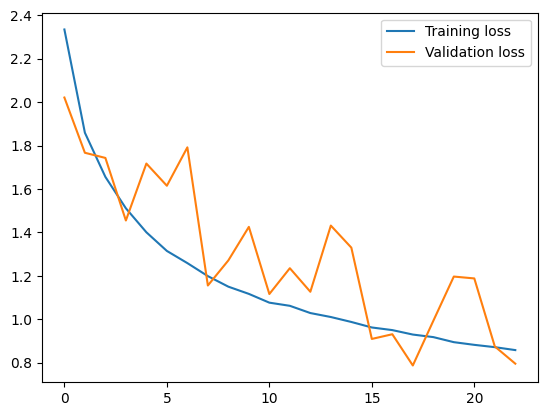

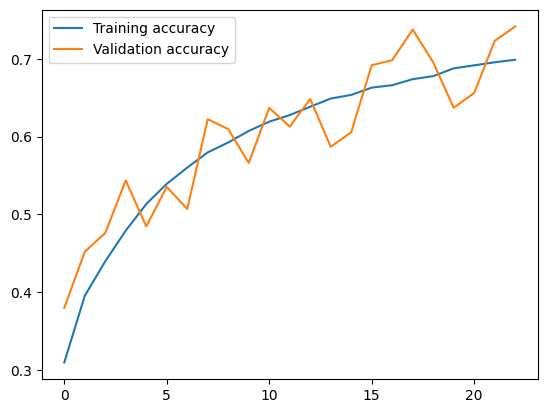

In [ ]:
modelo_nuevo = modeloCNN_alumno()

optimizer = Adadelta(learning_rate=0.1)
modelo_nuevo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = modelo_nuevo.fit(generadorDatos.flow(x_entrenar, y_entrenar, batch_size=32),epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(history)

En primera instancia, la gráfica de pérdida muestra que este valor en el conjunto de entrenamiento, en caso de seguir, tiende a estabilizarse, mientras que la gráfica en validación presenta patrones zigzageantes. No se ha llegado a una situación en que se haya sobreajustado (clara diferencia final entre la pérdida en entrenamiento, que se situaría debajo, y la de validación, que crecería), aunque podría considerarse como posible escenario. Esto se justificará más adelante cuando se compruebe en test si la generalización es buena. Sin embargo, accuracy en validación ha mejorado con respecto al accuracy en test que se ha tomado como punto de referencia, luego es una indicador de que la red propuesta puede estar bien diseñada.

313/313 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.7378
La matriz de confusión en Validación es:
[[802  29  19   4   2   3  13  11  56  34]
 [ 10 899   0   1   0   0  11   0  12  46]
 [108   9 499  27  71  65 185  34  22  10]
 [ 48  12  30 345  53 230 237  26  24  18]
 [ 31   5  20  10 632  19 144  50  15   7]
 [ 11   5  30  67  43 697  90  47   5  20]
 [ 12   6  12  10   8  11 929   0   6   2]
 [ 17   9  13  14  57  52  19 783  10  20]
 [ 38  33   4   0   2   3   2   2 916  17]
 [ 23  89   3   0   2   2  11   5  29 876]]


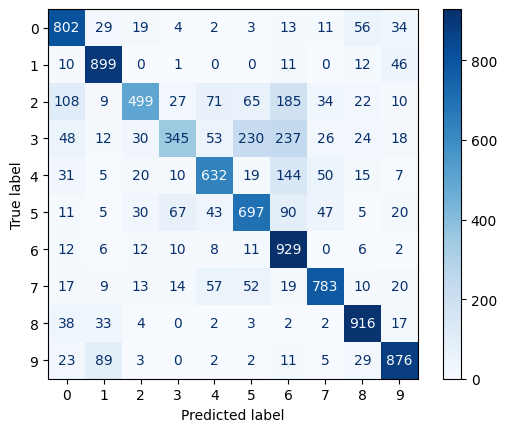

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       973
           1       0.82      0.92      0.87       979
           2       0.79      0.48      0.60      1030
           3       0.72      0.34      0.46      1023
           4       0.73      0.68      0.70       933
           5       0.64      0.69      0.66      1015
           6       0.57      0.93      0.70       996
           7       0.82      0.79      0.80       994
           8       0.84      0.90      0.87      1017
           9       0.83      0.84      0.84      1040

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.74      0.73     10000



In [ ]:
# Obtener predicciones para el conjunto de validación
metricasInfo(modelo_nuevo,x_val,y_val,'Validación')

En validación se encuentra una situación en que hay clases que el modelo ha aprendido mejor a predecir, como la etiquetada con $1$, y otras que no predice bien, como la etiquetada con $6$. Sin embargo, generalmente los resultados mejoran en función a los anteriores, a excepción de que deba predecir muestras etiquetadas como $3$, por ejemplo.

Se procede a aumentar el learning rate para ver si las métricas de validación mejoran.

Epoch 1/50
1250/1250 [==============================] - 38s 27ms/step - loss: 1.9633 - accuracy: 0.3641 - val_loss: 1.7263 - val_accuracy: 0.4385
Epoch 2/50
1250/1250 [==============================] - 29s 24ms/step - loss: 1.4401 - accuracy: 0.4906 - val_loss: 1.2449 - val_accuracy: 0.5717
Epoch 3/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.2636 - accuracy: 0.5534 - val_loss: 0.9751 - val_accuracy: 0.6547
Epoch 4/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1614 - accuracy: 0.5867 - val_loss: 1.0768 - val_accuracy: 0.6424
Epoch 5/50
1250/1250 [==============================] - 39s 31ms/step - loss: 1.0871 - accuracy: 0.6165 - val_loss: 1.0536 - val_accuracy: 0.6400
Epoch 6/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0430 - accuracy: 0.6334 - val_loss: 1.4044 - val_accuracy: 0.5791
Epoch 7/50
1250/1250 [==============================] - 42s 34ms/step - loss: 0.9967 - accuracy: 0.6456 - val_loss: 1.1532 -

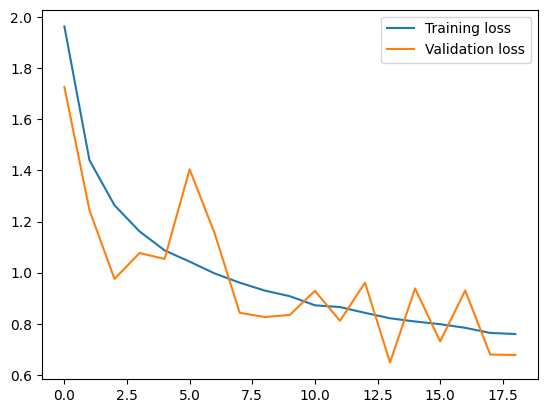

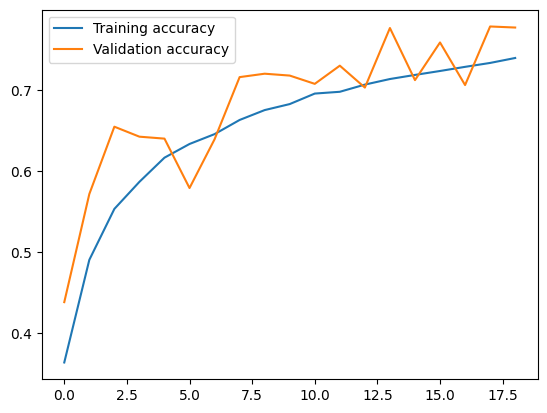

In [ ]:
modelo_nuevo = modeloCNN_alumno()

optimizer = Adadelta(learning_rate=0.4)
modelo_nuevo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = modelo_nuevo.fit(generadorDatos.flow(x_entrenar, y_entrenar, batch_size=32),epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(history)

La situación de las gráficas es similar al caso anterior, aunque visualmente parece que mejora levemente accuracy en validación. La hipótesis de que un mayor learning rate puede mejorar las métricas del modelo parece ser cierta, por lo que se seguirá aumentando este valor.

313/313 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.7763
La matriz de confusión en Validación es:
[[812  23  23   5   2   2   8  23  27  48]
 [  6 903   3   2   2   0   3   4   5  51]
 [ 76   3 620  29  70  51  96  62  13  10]
 [ 42   7  59 457  49 228 103  48  10  20]
 [ 33   3  24  19 672   8  60 103   9   2]
 [ 14   4  36  76  41 724  27  73   4  16]
 [ 10   8  19  22  16  13 882   9   9   8]
 [  7   4  15  17  27  24   4 881   3  12]
 [ 52  43   7   4   2   2   3   3 868  33]
 [ 11  56   2   4   0   3   1  15   4 944]]


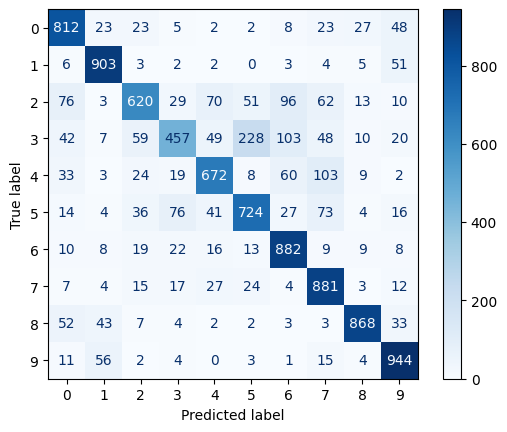

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       973
           1       0.86      0.92      0.89       979
           2       0.77      0.60      0.67      1030
           3       0.72      0.45      0.55      1023
           4       0.76      0.72      0.74       933
           5       0.69      0.71      0.70      1015
           6       0.74      0.89      0.81       996
           7       0.72      0.89      0.80       994
           8       0.91      0.85      0.88      1017
           9       0.83      0.91      0.86      1040

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



In [ ]:
# Obtener predicciones para el conjunto de validación
metricasInfo(modelo_nuevo,x_val,y_val,'Validación')

En validación el modelo predice muy bien muestras como las etiquetadas con $1$ u $8$, aunque predice levemente peor las etiquetadas con $5$. Esta situación ha cambiado en relación al anterior modelo, que la clase que peor predecía era la etiquetada con $6$. Además, la cantidad de falsos positivos y falsos negativos es algo menor, tanto de forma global como por clase, lo que implica cierta mejoría, aunque se debe mencionar que muestras etiquetadas como $3$ pueden compartir patrones similares, que el modelo no es capaz de distinguir, con muestras etiquetadas como $5$, ya que en la matriz de confusión puede verse que muchas muestras que deben ser clasificadas como $3$ realmente clasifican como $5$, y en menor medida como $6$. La red confunde mayormente a perros con gatos y viceversa, aunque no en gran medida. Ello muestra que la arquitectura no es perfecta, aunque mejore los resultados del modelo propuesto en el apartado 1.1.

Epoch 1/50
1250/1250 [==============================] - 37s 25ms/step - loss: 1.8353 - accuracy: 0.3878 - val_loss: 1.2625 - val_accuracy: 0.5429
Epoch 2/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3413 - accuracy: 0.5242 - val_loss: 1.1492 - val_accuracy: 0.5939
Epoch 3/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.2125 - accuracy: 0.5694 - val_loss: 1.1677 - val_accuracy: 0.5949
Epoch 4/50
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1139 - accuracy: 0.6059 - val_loss: 1.0296 - val_accuracy: 0.6496
Epoch 5/50
1250/1250 [==============================] - 31s 24ms/step - loss: 1.0630 - accuracy: 0.6279 - val_loss: 0.8588 - val_accuracy: 0.7001
Epoch 6/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0057 - accuracy: 0.6483 - val_loss: 1.0087 - val_accuracy: 0.6639
Epoch 7/50
1250/1250 [==============================] - 29s 24ms/step - loss: 0.9760 - accuracy: 0.6634 - val_loss: 0.9684 -

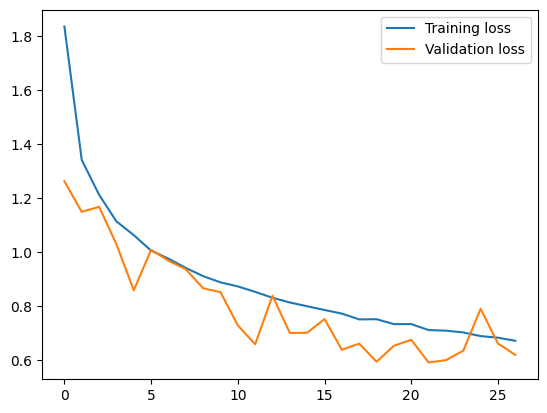

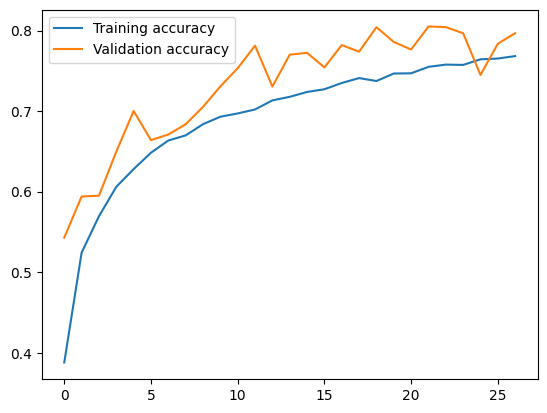

In [ ]:
modelo_nuevo = modeloCNN_alumno()

optimizer = Adadelta(learning_rate=0.9)
modelo_nuevo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = modelo_nuevo.fit(generadorDatos.flow(x_entrenar, y_entrenar, batch_size=32),epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(history)

Finalmente las gráficas tanto de entrenamiento como validación parecen converger a una asíntota horizontal, en torno a $0.65$ en la función de pérdida y a $0.8$ en accuracy. Además, haciendo uso de la gráfica de pérdida se podría afirmar que, como en los otros modelos, este no está sobreajustando, aunque es una conclusión que debería extraerse en test si este es el modelo elegido.

313/313 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.8050
La matriz de confusión en Validación es:
[[874  20  23   4   0   2   3   6  17  24]
 [ 10 920   2   1   1   1   1   2   7  34]
 [ 84   3 775  15  31  24  62  26   7   3]
 [ 52  10  80 551  19 149  89  48   7  18]
 [ 32   1  72  14 645  15  48  92  11   3]
 [ 17   7  61  90  27 718  28  57   2   8]
 [ 16   8  35  20   4   8 891   3   8   3]
 [ 17   1  28  26  27  23   4 860   4   4]
 [ 63  28  10   0   0   3   2   4 888  19]
 [ 25  63   3   2   1   1   2   5  10 928]]


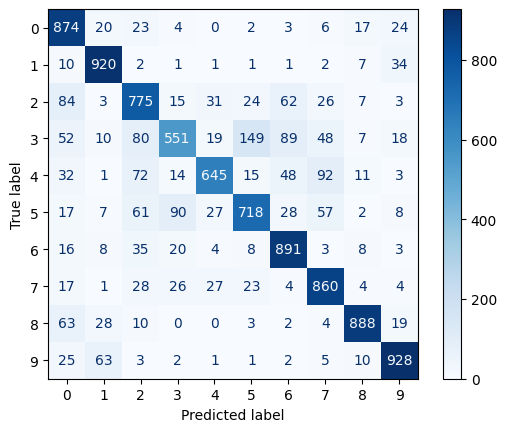

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       973
           1       0.87      0.94      0.90       979
           2       0.71      0.75      0.73      1030
           3       0.76      0.54      0.63      1023
           4       0.85      0.69      0.76       933
           5       0.76      0.71      0.73      1015
           6       0.79      0.89      0.84       996
           7       0.78      0.87      0.82       994
           8       0.92      0.87      0.90      1017
           9       0.89      0.89      0.89      1040

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [ ]:
# Obtener predicciones para el conjunto de validación
metricasInfo(modelo_nuevo,x_val,y_val,'Validación')

Si bien mejoran los valores de las métricas en este modelo de forma leve, sigue teniendo carencias como la confusión entre las muestras etiquetadas como $3$ con posibles patrones parecidos de las muestras de etiqueta $5$. Este es el caso más llamativo, aunque se puede ver que en menor medida tambuén ocurre con muestras etiquetadas con $2$ que son predichas como $0$.

Epoch 1/50
1250/1250 [==============================] - 38s 26ms/step - loss: 1.8082 - accuracy: 0.3903 - val_loss: 1.3990 - val_accuracy: 0.5028
Epoch 2/50
1250/1250 [==============================] - 38s 31ms/step - loss: 1.3482 - accuracy: 0.5206 - val_loss: 1.1011 - val_accuracy: 0.6164
Epoch 3/50
1250/1250 [==============================] - 45s 36ms/step - loss: 1.2062 - accuracy: 0.5737 - val_loss: 0.9672 - val_accuracy: 0.6682
Epoch 4/50
1250/1250 [==============================] - 41s 33ms/step - loss: 1.1245 - accuracy: 0.6043 - val_loss: 1.1611 - val_accuracy: 0.6391
Epoch 5/50
1250/1250 [==============================] - 38s 30ms/step - loss: 1.0692 - accuracy: 0.6264 - val_loss: 0.9182 - val_accuracy: 0.6781
Epoch 6/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0172 - accuracy: 0.6445 - val_loss: 1.6343 - val_accuracy: 0.5519
Epoch 7/50
1250/1250 [==============================] - 33s 26ms/step - loss: 0.9769 - accuracy: 0.6608 - val_loss: 0.9082 -

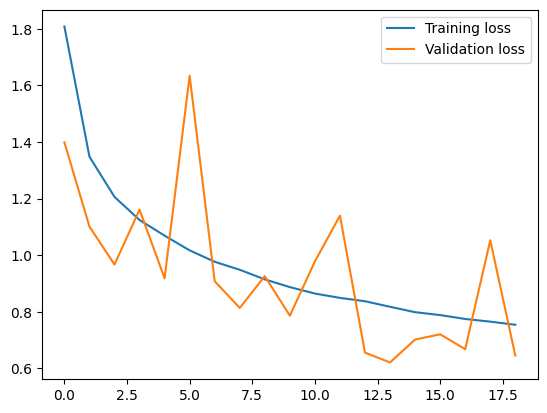

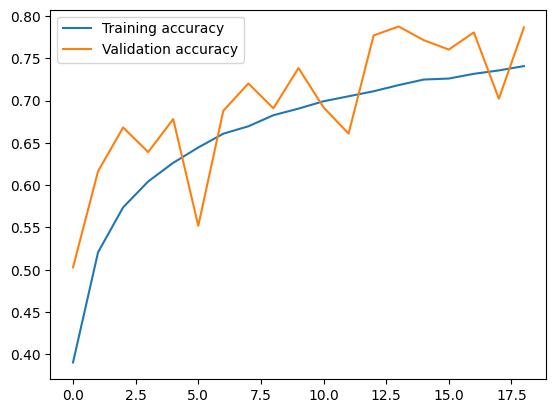

In [ ]:
modelo_nuevo = modeloCNN_alumno()

optimizer = Adadelta(learning_rate=1)
modelo_nuevo.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = modelo_nuevo.fit(generadorDatos.flow(x_entrenar, y_entrenar, batch_size=32),epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(history)

La gráficas aportadas en este caso muestran una curva, tanto de pérdida como de accuracy, en entrenamiento que tiende a estabilizarse, junto a otra curva de validación que sigue zigzagueando, y esta vez no parece que vaya a converger. Se hace un estudio más a fondo de la situación con otras métricas.

313/313 [==============================] - 1s 2ms/step
Accuracy en Validación: 0.7876
La matriz de confusión en Validación es:
[[786  40  29  11   3   4  14  11  26  49]
 [  2 918   2   1   0   0   2   3   5  46]
 [ 67   8 658  39  36  60 118  36   2   6]
 [ 24   8  43 578  30 171 130  27   3   9]
 [ 24   3  33  29 661  23 102  49   6   3]
 [  8   5  25 130  33 718  46  39   1  10]
 [  4   6  12  25   7   7 927   4   0   4]
 [ 11   6  13  30  36  36  16 834   5   7]
 [ 45  49  11  10   5   4   7   1 853  32]
 [  8  67   3   4   1   2   4   4   4 943]]


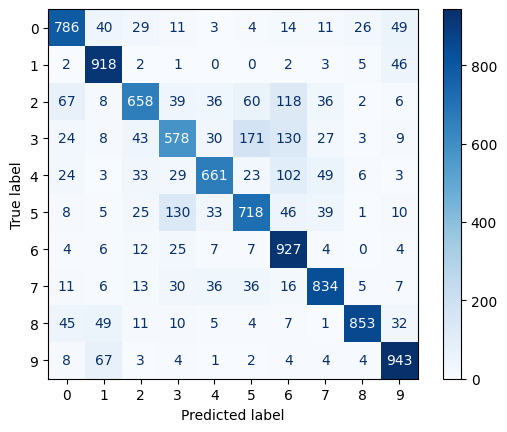

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       973
           1       0.83      0.94      0.88       979
           2       0.79      0.64      0.71      1030
           3       0.67      0.57      0.61      1023
           4       0.81      0.71      0.76       933
           5       0.70      0.71      0.70      1015
           6       0.68      0.93      0.78       996
           7       0.83      0.84      0.83       994
           8       0.94      0.84      0.89      1017
           9       0.85      0.91      0.88      1040

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.78     10000



In [ ]:
# Obtener predicciones para el conjunto de validación
metricasInfo(modelo_nuevo,x_val,y_val,'Validación')

Obsérvese que accuracy en validación ha bajado levemente respecto al modelo anterior. Además, parece que está confundiendo más clases, como la marcada con $3$ con las etiquetadas con $5$ y $6$, situación extrapolable a las marcadas con $4$ y predichas como $6$. Aunque los resultados sean buenos, a grandes rasgos accuracy en validación casi de $78$%, este modelo está confundiendo más clases que el anterior, y parece que no va a tener mejor generalización que la que pudiera tener el de learning rate a $0.9$. Entonces, se ha llegado al caso en que se ha sobrepasado el posible pico de aprendizaje en un conjunto como CIFAR-10 con la red neuronal propuesta, empeorando a partir de él (presuntamente, estará en un learning rate en $[0.9.1]$).

Hasta el momento, los hiperparámetros con los que mejor resultado da el modelo son un learning rate de $0.9$ y un tamaño de batch de $32$, junto a la técnicas de regularización Early Stopping con `patience=5`. A continuación se vuelve a obtener este modelo para poder usarlo más adelante en caso de ser mejor modelo que el SVM que se usará para comparar.

Epoch 1/50
1250/1250 [==============================] - 36s 26ms/step - loss: 1.8356 - accuracy: 0.3838 - val_loss: 1.6317 - val_accuracy: 0.4506
Epoch 2/50
1250/1250 [==============================] - 32s 25ms/step - loss: 1.3681 - accuracy: 0.5104 - val_loss: 1.2115 - val_accuracy: 0.5703
Epoch 3/50
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2080 - accuracy: 0.5723 - val_loss: 0.9690 - val_accuracy: 0.6547
Epoch 4/50
1250/1250 [==============================] - 33s 27ms/step - loss: 1.1259 - accuracy: 0.6028 - val_loss: 1.4716 - val_accuracy: 0.5465
Epoch 5/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0611 - accuracy: 0.6299 - val_loss: 0.9271 - val_accuracy: 0.6736
Epoch 6/50
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0186 - accuracy: 0.6417 - val_loss: 0.8113 - val_accuracy: 0.7166
Epoch 7/50
1250/1250 [==============================] - 33s 26ms/step - loss: 0.9792 - accuracy: 0.6586 - val_loss: 0.8108 -

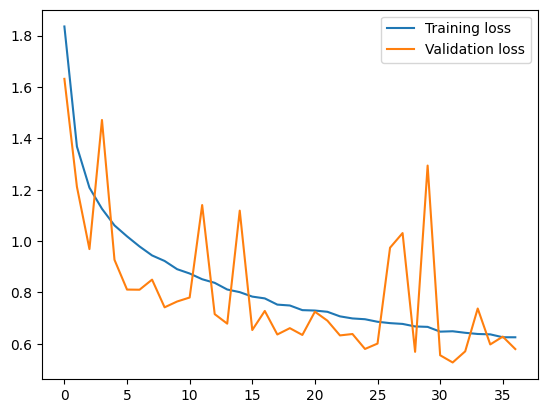

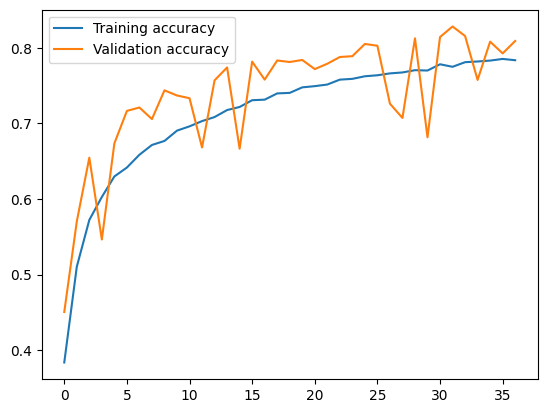

In [ ]:
modelo_final_alumno = modeloCNN_alumno()

optimizer = Adadelta(learning_rate=0.9)
modelo_final_alumno.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = modelo_final_alumno.fit(generadorDatos.flow(x_entrenar, y_entrenar, batch_size=32),epochs=50, validation_data=(x_val, y_val), callbacks=[early_stopping])
mostrarEvolucion(history)

Se ve que ha aumentado levemente el accuracy en validación, hecho que puede desprenderse de la posible inicialización aleatoria de los pesos de la red y el ajuste dinámico del learning rate en Adadelta.

### Comparación con SVM

Dado que en el apartado 1.2 se hizo uso de SVM para comparar el rendimiento entre la red neuronal entrenada en MNIST con otro algoritmo de aprendizaje supervisado, se mantiene su uso para la comparación con la nueva red neuronal. Este algoritmo usará puntos HOG al igual que en el apartado 1.2 para el entrenamiento. La decisión de usar el mismo algoritmo se debe a que ya se ha experimentado con él para clasificar imágenes, y aunque no dió mejores resultados en validación que la red, dió resultados muy aceptables, y se quiere comprobar si cambiando los datos de blanco y negro a color este buen comportamiento se mantiene.

Primero obtenemos los puntos del algoritmo HOG usando como plantilla el código dado en el apartado 1.2. Como se querrá buscar los mejores hiperparámetros de varios para SVM, se decide no cambiar los parámetros del algoritmo de extracción de características ya que el gasto computacional de entrenar varios SVM para comparar su rendimiento en validación es demasiado alto. En caso de contar con suficientes recursos para comparar modelos en este caso, sí es recomendable aumentar el número de orientaciones y alterar el resto de parámetros para poder obtener más características, y de mayor calidad, por extraerlas de más bajo nivel, o menos evidentes, en la imagen.

In [ ]:
from skimage.feature import hog

# Extracción de características HOG para la primera imagen para inicializar el tamaño del array
fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

# Inicializar arrays para almacenar características HOG
x_train_HOG = np.zeros((x_train.shape[0], len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0], len(fd)), np.float32)

# Extracción de características HOG para el conjunto de entrenamiento
for i in range(x_train.shape[0]):
    x_train_HOG[i], _ = hog(x_train[i], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=True, channel_axis=-1)

# Extracción de características HOG para el conjunto de prueba
for i in range(x_test.shape[0]):
    x_test_HOG[i], _ = hog(x_test[i], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=True, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(50000, 64)


El número de características extraídas aumenta de $32$ a $64$, y el número de muestras es menor. Como se expuso antes, aumentando los hiperparámetros de HOG se podría aumentar el número de características y, con ello, el modelo tener mejor rendimiento, pero dada la limitación mencionada con respecto a lo que se quiere realizar, se considera que la cantidad de características expuestas son suficientes para obtener un modelo fiable.

Antes de continuar es necesario ver si los datos están normalizados y estandarizados, ya que SVM al menos necesita que la media y desviación de los datos sean las usuales (media cero y desviación típica uno).

In [ ]:
import pandas as pd

print(pd.DataFrame(x_train_HOG).describe())

                 0             1             2             3             4   \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.193582      0.200540      0.211861      0.145357      0.204475   
std        0.103497      0.100920      0.100099      0.105182      0.105675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.101888      0.116552      0.130311      0.049536      0.115076   
50%        0.213222      0.216827      0.238574      0.129743      0.229729   
75%        0.285592      0.288795      0.293014      0.242930      0.291373   
max        0.463885      0.489539      0.542532      0.521398      0.681689   

                 5             6             7             8             9   \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.243049      0.246928      0.175178      0.239593      0.240305   
std        0.090957      0.085443      0.106607    

Al igual que en el caso de MNIST, los valores de las características ya están normalizados por el preprocesamiento realizado al principio del apartado (división por $255$). Por ello, solo será necesario estandarizar a media nula y desviación típica uno para un entrenamiento libre de sesgos de SVM.

##### Preprocesamiento

###### Estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_HOG_1 = scaler.fit_transform(x_train_HOG)
x_test_HOG_1 = scaler.transform(x_test_HOG)

In [ ]:
print(pd.DataFrame(x_train_HOG_1).describe())

                 0             1             2             3             4   \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -2.670288e-09  1.173019e-08  9.155273e-10 -1.065254e-08 -6.103515e-09   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.870430e+00 -1.987132e+00 -2.116540e+00 -1.381968e+00 -1.934951e+00   
25%   -8.859667e-01 -8.322274e-01 -8.147088e-01 -9.110110e-01 -8.459817e-01   
50%    1.897646e-01  1.613897e-01  2.668672e-01 -1.484499e-01  2.389829e-01   
75%    8.890140e-01  8.745156e-01  8.107347e-01  9.276729e-01  8.223251e-01   
max    2.611720e+00  2.863670e+00  3.303463e+00  3.575186e+00  4.515897e+00   

                 5             6             7             8             9   \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -5.035401e-09  8.201599e-09  2.670288e-09  3.013611e-09  2.365112e-09   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.

###### Reducción de dimensionalidad

Tras realizar la estandarización oportuna, se procede a intentar reducir la dimensionalidad de los datos. Para ello, primero se visualiza un scree plot.

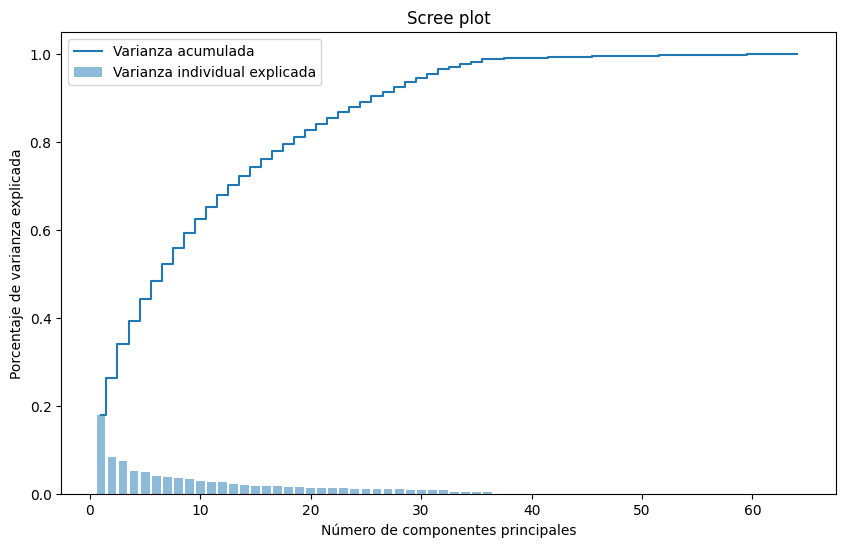

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train_HOG)

# Varianza explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Varianza acumulada
var_acum = np.cumsum(var_explicada)

# Visualización del scree plot
plt.figure(figsize=(10,6))
plt.bar(range(1,len(var_explicada) + 1),var_explicada,alpha=0.5,align='center',label='Varianza individual explicada')
plt.step(range(1,len(var_acum) + 1), var_acum,where='mid',label='Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

Si se traza la recta $y=0.95$, se puede intuir que corta a la gráfica en un punto donde la abscisa es cercana a $30$. Si se mantiene el $95$% de varianza explicada, preservando gran parte de la información, casi la mitad de las características se pueden eliminar, reduciendo tiempo de cómputa en el entrenamiento de SVM.

In [ ]:
threshold = 0.95    # Mantenemos el 95% de varianza acumulada y reducimos algunas características
num_componentes = np.argmax(var_acum>=threshold)+1
print(f'El {threshold*100}% de la varianza acumulada es explicada por {num_componentes} componentes')

El 95.0% de la varianza acumulada es explicada por 31 componentes


In [ ]:
pca = PCA(n_components=num_componentes)
x_train_HOG_tras_pca = pca.fit_transform(x_train_HOG_1)
x_test_HOG_tras_pca = pca.transform(x_test_HOG_1)

In [ ]:
import pandas as pd

print(pd.DataFrame(x_train_HOG_tras_pca).describe())

                 0             1             2             3             4   \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -6.408691e-09  1.663208e-08  1.525879e-09 -2.098083e-09 -6.752014e-09   
std    3.395799e+00  2.318216e+00  2.285833e+00  1.836223e+00  1.776569e+00   
min   -1.337961e+01 -9.766135e+00 -1.242124e+01 -1.066600e+01 -8.802459e+00   
25%   -2.161960e+00 -1.419409e+00 -1.168814e+00 -1.083700e+00 -1.096142e+00   
50%   -4.098660e-01 -9.151454e-02  3.450160e-02  4.098473e-02 -3.644633e-02   
75%    1.847520e+00  1.273041e+00  1.216399e+00  1.109940e+00  1.050122e+00   
max    1.374928e+01  1.398186e+01  1.312187e+01  1.094855e+01  1.071434e+01   

                 5             6             7             8             9   \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean   5.264282e-09  4.348755e-09 -6.179810e-09  1.068115e-09  4.673004e-09   
std    1.628805e+00  1.547265e+00  1.542799e+00  1.

Análisis de componentes principales ha conseguido reducir a $31$ características los datos de entrenamiento y test. Con ellos, se entrenará SVM.

Se procede a separar los datos para poder aplicar la técnica de validación hold-out según un $20$%, ya que además de haber gran cantidad de datos, para hacer una comparación más fiable será necesario que las técnicas usadas para validar, función de pérdida,... sean iguales.

In [ ]:
x_entrenar_HOG, x_val_HOG, y_entrenar_HOG, y_val_HOG = train_test_split(x_train_HOG_tras_pca, y_train, test_size=0.2, random_state=42)

#### Búsqueda de hiperparámetros para SVM

Puede suponerse cierto que, aunque se han reducido muchas características, la dimensionalidad del problema sigue siendo alta y, en consecuente, SVM consumirá bastantes recurso. Por ello, se harán las siguientes hipótesis dada la naturaleza de los datos:

- Se usará kernel RBF, ya que las imágenes a color en CIFAR-10 presentan patrones complejos de capturar (en general, las imágenes suelen presentarlos en problemas de clasificación).

- Como la cantidad de características en general es la misma que en 1.2, se evalua con los mismos valores de C y gamma con los que se experimentó antes, obteniendo los hiperparámetros de mejor accuracy en validación. La razón de ello es intentar cubrir varios escenarios posibles en función de la regularización según C y el comportamiento del kernel RBF según gamma.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
y_entrenar_HOG = np.argmax(y_entrenar_HOG, axis=1) if y_entrenar_HOG.ndim > 1 else y_entrenar_HOG
y_val_HOG = np.argmax(y_val_HOG, axis=1) if y_val_HOG.ndim > 1 else y_val_HOG

In [ ]:
Cs = [0.1,1,10,100]
gammas = [1,0.1,0.01,0.001]

# Inicialización de variables para almacenar el mejor modelo y los resultados
best_accuracy = 0
best_params = {}
results = []

for C in Cs:
        for gamma in gammas:
            # Crear el modelo SVC con los hiperparámetros actuales
            modelo = SVC(C=C, kernel='rbf', gamma=gamma)

            # Entrenar el modelo
            modelo.fit(x_entrenar_HOG, y_entrenar_HOG)

            # Evaluar en el conjunto de validación
            y_val_pred = modelo.predict(x_val_HOG)

            val_acc = accuracy_score(y_val_HOG, y_val_pred)

            # Almacenar los resultados para el conjunto completo de entrenamiento
            results.append({
                'C': C,
                'kernel': 'rbf',
                'gamma': gamma,
                'accuracy': val_acc
            })
            print(f'C: {C}, Kernel: rbf, Gamma: {gamma}, Accuracy: {val_acc}')
            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_params = {'C': C, 'kernel': 'rbf', 'gamma': gamma}

# Mostrar todos los resultados
for result in results:
    print(f"C: {result['C']}, Kernel: {result['kernel']}, Gamma: {result['gamma']}, Accuracy: {result['accuracy']}")

C: 0.1, Kernel: rbf, Gamma: 1, Accuracy: 0.0933
C: 0.1, Kernel: rbf, Gamma: 0.1, Accuracy: 0.214
C: 0.1, Kernel: rbf, Gamma: 0.01, Accuracy: 0.461
C: 0.1, Kernel: rbf, Gamma: 0.001, Accuracy: 0.3973
C: 1, Kernel: rbf, Gamma: 1, Accuracy: 0.0972
C: 1, Kernel: rbf, Gamma: 0.1, Accuracy: 0.4538
C: 1, Kernel: rbf, Gamma: 0.01, Accuracy: 0.5098
C: 1, Kernel: rbf, Gamma: 0.001, Accuracy: 0.4316
C: 10, Kernel: rbf, Gamma: 1, Accuracy: 0.0993
C: 10, Kernel: rbf, Gamma: 0.1, Accuracy: 0.4584
C: 10, Kernel: rbf, Gamma: 0.01, Accuracy: 0.52
C: 10, Kernel: rbf, Gamma: 0.001, Accuracy: 0.4744
C: 100, Kernel: rbf, Gamma: 1, Accuracy: 0.0993
C: 100, Kernel: rbf, Gamma: 0.1, Accuracy: 0.4586
C: 100, Kernel: rbf, Gamma: 0.01, Accuracy: 0.488
C: 100, Kernel: rbf, Gamma: 0.001, Accuracy: 0.5078
C: 0.1, Kernel: rbf, Gamma: 1, Accuracy: 0.0933
C: 0.1, Kernel: rbf, Gamma: 0.1, Accuracy: 0.214
C: 0.1, Kernel: rbf, Gamma: 0.01, Accuracy: 0.461
C: 0.1, Kernel: rbf, Gamma: 0.001, Accuracy: 0.3973
C: 1, Kernel: 

In [ ]:
best_params

{'C': 10, 'kernel': 'rbf', 'gamma': 0.01}

Nótese que el hiperparámetro de regularización coincide con el del primer SVM, pero el hiperparámetro gamma varía. Esto puede deberse a que las imágenes presentan patrones distintos a los de las imágenes en MNIST, por lo que el funcionamiento del kernel RBF debe ser distinto. Se intuye que por la naturaleza de los datos, estos patrones deben ser más complejos.

Usando los mejores hiperparámetros se vuelve a entrenar SVM y se evalua su rendimiento en el conjunto de validación.

In [ ]:
mejor_C = 10
mejor_gamma = 0.01

mejor_svm = SVC(C=mejor_C,kernel='rbf',gamma=mejor_gamma)
mejor_svm.fit(x_entrenar_HOG,y_entrenar_HOG)

SVC(C=10, gamma=0.01)

La evaluación de las métricas en validación se hace a continuación.

Accuracy en validación: 0.5200
La matriz de confusión en validación es:
[[613  31  82  20  35  14  20  19 103  36]
 [ 36 671  13  14  28   8  30  19  83  77]
 [105  25 376  75 132  87  70  69  48  43]
 [ 37  38  71 341  93 178  96  91  15  63]
 [ 37  20  50  75 472  43  76  93  12  55]
 [ 23  15  69 170 106 428  65  87   9  43]
 [ 22  36  49  54  57  59 620  33  12  54]
 [ 27  15  53  57 125  86  32 542   9  48]
 [102  95  24  22  35  16  12   7 642  62]
 [ 58 112  24  61  65  48  73  47  57 495]]


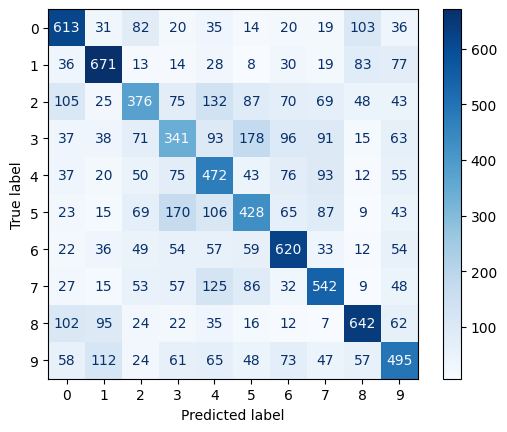

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       973
           1       0.63      0.69      0.66       979
           2       0.46      0.37      0.41      1030
           3       0.38      0.33      0.36      1023
           4       0.41      0.51      0.45       933
           5       0.44      0.42      0.43      1015
           6       0.57      0.62      0.59       996
           7       0.54      0.55      0.54       994
           8       0.65      0.63      0.64      1017
           9       0.51      0.48      0.49      1040

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Mostrar rendimiento en validación
y_pred = mejor_svm.predict(x_val_HOG)

# Calcular la precisión
accuracy = sum(y_val_HOG == y_pred) / len(y_val_HOG)
print(f'Accuracy en validación: {accuracy:.4f}')

# Generar la matriz de confusión para el conjunto de validación
cm = confusion_matrix(y_val_HOG, y_pred)

print("La matriz de confusión en validación es:")
print(cm)

# Mostrar la matriz de confusión para el conjunto de validación
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Generar el informe de clasificación
report = classification_report(y_val_HOG, y_pred)
print("Classification Report:")
print(report)

A grandes rasgos se observa que el modelo tiene un rendimiento relativamente decente si se observa el valor de accuracy global en validación. Sin embargo, desglosando los resultados, de la matriz de confusión podemos extraer que las imágenes que más falla en reconocer son aquellas marcadas de $2$ a $5$ (hecho que se puede ver en la baja precisión asociada en el classification report). Confunde bastante las imágenes marcadas con $3$ como $5$ y viceversa (vulnerabilidad que también presentaba la red neuronal), aunque también confunde clases como la $1$ con la $8$. En classification report se puede observar que hay bastantes falsos positivos y falsos negativos.

#### Comparación de modelos

Los modelos comparados son:

- Red neuronal propuesta. Un accuracy en validación en torno al $80$%.

- SVM con características HOG. Un accuracy en validación en torno al $52$%.

Solo observando los resultados en validación, podemos obtener como conclusión que la red neuronal obtiene bastante mejores resultados que SVM entrenado con puntos extraídos con el algoritmo HOG. Ambos algoritmos tienen carencias comunes como la mencionada entre las clases etiquetadas con $3$ y $5$, pero SVM tiene bastantes más, y la métrica recall es más baja en SVM que en la red, dando a entender que hay muchos más falsos positivos y falsos negativos en este algoritmo. En conclusión, se escoge como mejor algoritmo la red neuronal propuesta en el presente apartado, con nombre anteriormente asignado `modelo_final_alumno`, y se aplicará test con el único objetivo de comprobar su comportamiento frente a nuevos datos (posiblemente si se extrae una gran cantidad de características HOG, SVM pueda llegar a tener mejor rendimiento que la red, aunque ello podría suponer un gasto computacional mucho más grande de lo deseado).

313/313 [==============================] - 1s 2ms/step
Accuracy en Test: 0.8256
La matriz de confusión en Test es:
[[904  18   4   5   2   1   3   8  34  21]
 [  2 955   0   0   1   0   0   0   6  36]
 [104   5 655  47  51  36  58  24  10  10]
 [ 33  15  29 693  36  75  57  31  12  19]
 [ 45   2  25  31 782  17  49  42   6   1]
 [ 25   4  12 171  31 684  26  33   3  11]
 [ 13   3  19  29  13  14 892   6   7   4]
 [ 26   2  12  23  17  14   5 892   2   7]
 [ 63  26   2   2   0   0   2   2 887  16]
 [ 22  49   1   6   1   0   1   4   4 912]]


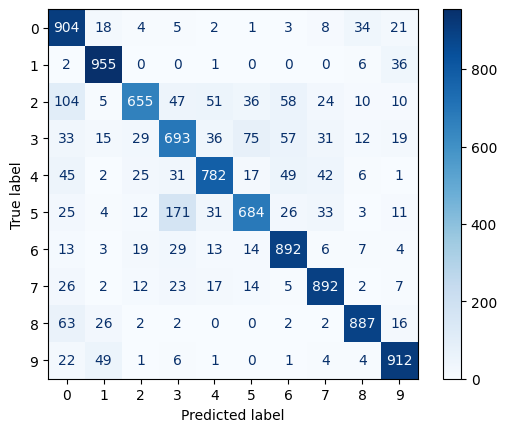

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1000
           1       0.89      0.95      0.92      1000
           2       0.86      0.66      0.74      1000
           3       0.69      0.69      0.69      1000
           4       0.84      0.78      0.81      1000
           5       0.81      0.68      0.74      1000
           6       0.82      0.89      0.85      1000
           7       0.86      0.89      0.87      1000
           8       0.91      0.89      0.90      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



In [ ]:
# Obtener predicciones para el conjunto de test
metricasInfo(modelo_final_alumno,x_test,y_test,'Test')

Generalmente, este red ha dado buenos resultados, y estos en test dan a entender que el modelo es capaz de generalizar bastante bien frente a datos no vistos. La matriz de confusión muestra que muchas predicciones son correctas, aunque sigue habiendo falsos positivos y falsos negativos, en la medida que había en la matriz de confusión de validación en la experimentación con estos hiperparámetros.

Por clase, hay imágenes que el modelo predice mejor como la marcada con $8$, según se observa en el classification report. Además, en la matriz de confusión puede verse que el modelo aún confunde imágenes como la $5$, confundida con la etiquetada con $3$, mostrando que el modelo no es capaz de capturar relaciones muy complejas y aprender características muy robustas para diferenciar imágenes parecidas.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


4422102/4422102 [==============================] - 0s 0us/step


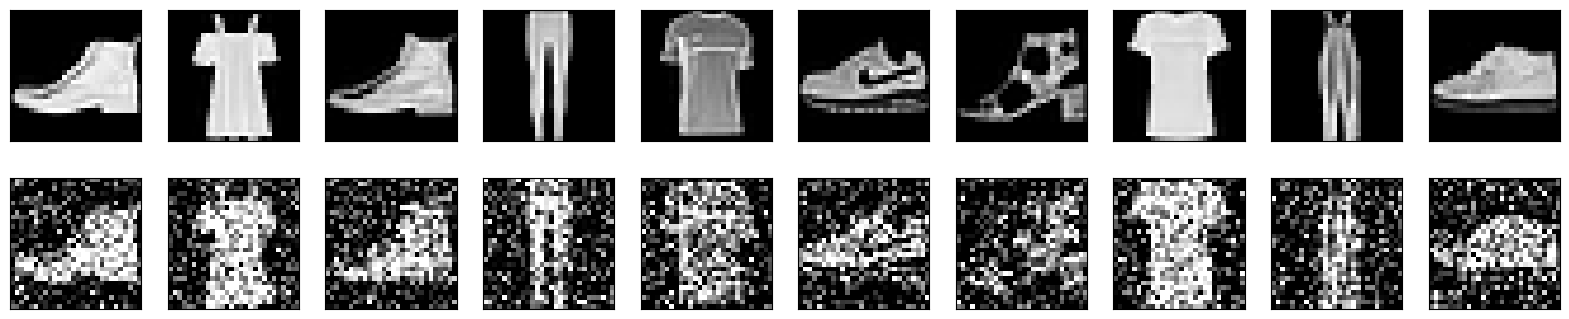

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

### Construcción del autoencoder

Primero se construye el autoencoder siguiendo la información aportada en la documentación de Keras.

#### Construcción del encoder

In [ ]:
# Las imágenes de fashion MNIST son de dimensión 28x28, en blanco y negro (un canal)
imagen_entrada = layers.Input(shape=(28,28,1))

# Construcción del encoder
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(imagen_entrada)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
encoder = layers.MaxPooling2D((2,2),padding='same')(x)

Se han seguido las especificaciones expuestas en el enunciado del ejercicio. El uso de `layers.input` se debe a la necesidad de definir de la entrada al modelo, junto con sus dimensiones, aunque este hecho se desarrollará más adelante.

El resto de capas usadas en la celda anterior, junto con sus parámetros, fueron explicadas en el primer ejercicio, por lo que no se hará de nuevo para no alargar la memoria.

#### Construcción del decoder

Tras la construcción del encoder, construimos el decoder con la propiedad de ser simétrico al encoder anterior.

In [ ]:
x = layers.Conv2DTranspose(16,(3,3),strides=2,activation='relu',padding='same')(encoder)
x = layers.Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
decoded = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [ ]:
Model(imagen_entrada,decoded).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                        

En general, los datos dados por `.summary` se pueden explicar de la misma forma que en el primer ejercicio, aunque en este caso aparecen dos capas más:

- InputLayer: Es la capa de entrada al autoencoder, indicando las dimensiones de entrada de la red (dimensiones $28 \times 28$ con un canal). Se usa para los autoencoders, y no en redes para clasificación como la del ejercicio 1, ya que a veces requieren de una definición clara de la imagen para las posteriores operaciones, lo cual no es necesario en redes convolucionales usadas para clasificación en las que se usa `Sequential`, pues en este caso la primera capa deduce las dimensiones de las imágenes de entrada.

- Conv2DTrasnpose: Usada para las operaciones de deconvolución, aumenta las dimensiones espaciales según se especifique como salida. Esto es necesario para que las dimensiones de salida de la red coincidan con las de entrada y, a diferencia de la capa InputLayer, esta si tiene parámetros entrenables.

#### Respuestas a las preguntas y justificaciones necesarias.

La simetría del decoder con respecto al encoder se ha construido invirtiendo el encoder. En otras palabras, deshaciendo las operaciones que ha hecho el encoder, usando los parámetros usados en el mismo.

A continuación se procede a responder a las preguntas:

- La convolución aplicada en el decoder se lleva a cabo con `Conv2DTranspose`, que tendrá los mismos parámetros que su simétrico en el encoder, pero se añade `strides=2`, asegurando el aumento de las dimensiones de la imagen, en particular, duplicándolas. No es posible usar solo una capa de convolución `Conv2D`, al menos no hasta la última capa, dado a que esta capa no aumenta las dimensiones de la imagen de salida (a lo sumo las mantiene, y por ello se usa solo en el final, cuando ya se tienen las dimensiones requeridas para la imagen). También se puede usar una combinación de `Conv2D` con `UpSampling2D` si lo que se busca es incrementar las dimensiones, aunque la solución puede ser menos íntegra.

- La función de activación usada en la última capa debe ser la función sigmoide, dado que lleva las salidas del decoder en el intervalo $[0,1]$, lo cual es conveniente en problemas de reconstrucción de imágenes con píxeles entre $0$ y $1$ (no se usa softmax como en el primer ejercicio porque el objetivo no es clasificar entradas en un problema multiclase). Por otro lado, la función de pérdida que se empleará es la función de pérdida cross entropy binaria, puesto que aunque es más usada en problemas de clasificación binaria, dentro del contexto de la eliminación de ruido cada píxel se podría considerar como salida binaria (tiene o no ruido presente). Además, es efectiva para comparar las distribuciones de los píxeles reconstruidos con los originales.

- Teniendo en cuenta que se busca que el modelo elimine el ruido presente en una imagen dada, teniendo como salida otra imagen, las entradas en el entrenamiento, $X$, son las imágenes con ruido (`noisy_train_data`), y las salidas, $y$, son las imágenes sin ruido (`train_data`). Esto se relaciona con el hecho de que sean técnicas de aprendizaje no supervisado, puesto que no se están usando las etiquetas de las imágenes para entrenar al modelo, y ajustará los pesos y sesgos en función de la comparación que haga de cada salida con la imagen original, retroalimentándose con el resultado de la función de pérdida. Las etiquetas anotadas en este caso son las imágenes originales, que no tienen ruido, las cuales no son las etiquetas empleadas hasta ahora, sino que son el objetivo al que debe llegar, o aproximarse, el autoencoder.

### Entrenamiento con imágenes limpias

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

Se procede entonces a entrenar el autoencoder. Para ello, se hace uso de los siguientes elementos e hiperparámetros:

- Número de épocas: Un valor suficientemente alto como $50$. Se han usado épocas más altas, pero en la curva de pérdida se observa que el modelo se estabiliza mucho antes de llegar a $50$, llegando a oscilar y Early Stopping no consigue aplicarse.

- Optimizador: Dada la naturaleza de los datos y el objetivo a cumplir, que es la eliminación de ruido, se opta por usar el optimizador AdamW. La razón es que regula directamente los pesos para evitar el sobreajuste (importante en la buena generalización en la eliminación de ruido) y combina las ventajas de Adam respecto a la adaptabilidad y velocidad de convergencia con la robustez que da la decaída de peso.

- Tamaño de batch: Tomando la siguiente [referencia](https://ar5iv.labs.arxiv.org/html/1512.03385), se utiliza un tamaño de batch de $64$.

- Learning rate: AdamW es bueno para un learning rate de $0.001$. Sin embargo, también se prueba con $0.0005$ ya que puede ayudar a mejorar la estabilidad y evitar saltos en la función de pérdida, tal y como se puede encontrar [aquí](https://ar5iv.labs.arxiv.org/html/1512.03385).

- Early Stopping: Como se opta por $50$ épocas, se establece `patience` al $4$, ya que tras varios intentos de entrenamiento, se comprueba que la gráfica de pérdida del modelo converge, pero al mejorar muy poco tras $3-4$ épocas, no se aplica Early Stopping y el entrenamiento nunca termina, dando mejoras demasiado pequeñas para el gasto computacional que implica.



Para validar cada entrenamiento, tal y como se especifica en el enunciado, vamos a usar los datos de test. Además, como ya se han preprocesado los datos, no será necesario volver a hacerlo para aplicar el algoritmo. No se usa métricas como accuracy ya que el problema no es de aprendizaje supervisado, así que se usará la media entre datos de validación e imágenes con ruido eliminado para evaluar el rendimiento del modelo. Esto se consigue con la siguiente métrica:

- PSNR: Es una medida de la relación entre la máximo potencia posible de una señal y la potencia del ruido que afecta a la fidelidad de su presentación. Se calcula como

$$PSNR = 10 \cdot log_{10} \left( \frac{MAX^2}{MSE} \right)$$

deonde $MAX$ es el valor máximo de los píxeles en la imagen (a lo sumo valdrá $1$ en imágenes normalizadas) y $MSE$ es el error cuadrático medio entre la imagen original y la imagen reconstruida. Es una métrica fácil de calcular y entender, la cual ofrece una medida cuantitativa directa de la fiabilidad de la reconstrucción. Ha demostrad ser útil en tareas de reconstrucción de imágenes. Un valor mayor a $30$ implica buena calidad en la imagen obtenida, entre $20$ y $30$ indica una calidad aceptable y menos de $20$ indica una calidad pobre en la imagen reconstruida.

In [ ]:
from keras.callbacks import EarlyStopping
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from tensorflow.keras.optimizers import AdamW

def calcularMetricas(original, reconstructed):
    psnr_value = psnr(original, reconstructed)
    #ssim_value = ssim(original, reconstructed, win_size=7)  # A multichannel=False porque las imágenes son en blanco y negro
    return psnr_value

def mostrarEvolucionSinAccuracy(hist):  # Como no usamos accuracy en este caso, nos quedamos con media función 'mostrarEvolucion'
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

# Se define así el autoencoder para la experimentación para que, siempre que se llame,
# se entrene desde cero, y no sobre un modelo entrenado con otrso hiperparámetros.
def modeloAutoencoder():
    # Las imágenes de fashion MNIST son de dimensión 28x28, en blanco y negro (un canal)
    imagen_entrada = layers.Input(shape=(28,28,1))

    # Construcción del encoder
    x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(imagen_entrada)
    x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
    x = layers.MaxPooling2D((2,2),padding='same')(x)
    x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
    encoder = layers.MaxPooling2D((2,2),padding='same')(x)
    x = layers.Conv2DTranspose(16,(3,3),strides=2,activation='relu',padding='same')(encoder)
    x = layers.Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same')(x)
    x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
    decoded = layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

    return Model(imagen_entrada,decoded)

Entrenamiento con batch_size=64 y learning rate: 0.0005
Epoch 1/50
938/938 [==============================] - 11s 9ms/step - loss: 0.2955 - val_loss: 0.2689
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2638 - val_loss: 0.2634
Epoch 3/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2596 - val_loss: 0.2605
Epoch 4/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2571 - val_loss: 0.2585
Epoch 5/50
938/938 [==============================] - 14s 15ms/step - loss: 0.2557 - val_loss: 0.2571
Epoch 6/50
938/938 [==============================] - 13s 14ms/step - loss: 0.2547 - val_loss: 0.2564
Epoch 7/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2539 - val_loss: 0.2556
Epoch 8/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2534 - val_loss: 0.2551
Epoch 9/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2529 - val_loss: 0.2548
Epoch 10/50
938/938 [==========

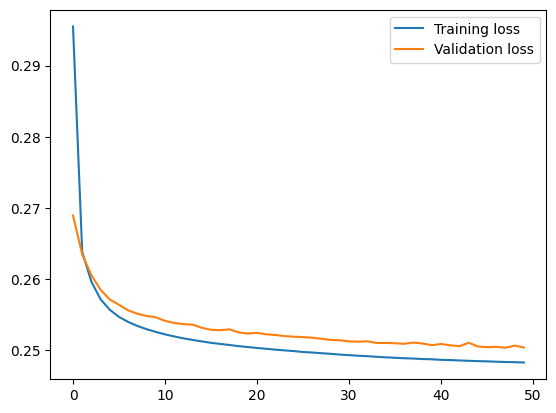

313/313 [==============================] - 1s 2ms/step
PSNR medio: 27.4359
Entrenamiento con batch_size=64 y learning rate: 0.001
Epoch 1/50
938/938 [==============================] - 11s 10ms/step - loss: 0.2854 - val_loss: 0.2681
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2631 - val_loss: 0.2626
Epoch 3/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2588 - val_loss: 0.2592
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2566 - val_loss: 0.2579
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2551 - val_loss: 0.2564
Epoch 6/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2541 - val_loss: 0.2557
Epoch 7/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2533 - val_loss: 0.2549
Epoch 8/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2526 - val_loss: 0.2543
Epoch 9/50
938/938 [==============================] - 9s 10ms/

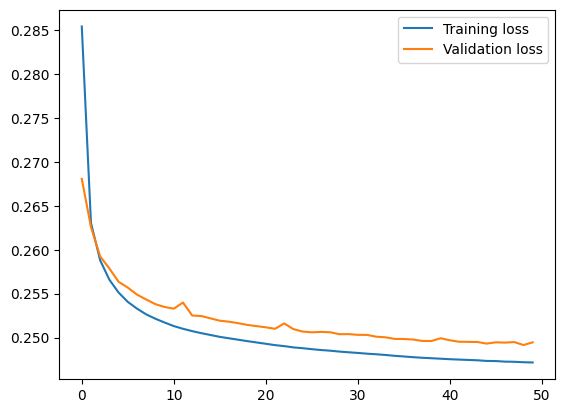

313/313 [==============================] - 1s 2ms/step
PSNR medio: 27.9465
Los mejores hiperparámetros son 
{'batch_size': 64, 'learning_rate': 0.001}
Estos hiperparámetros han dado u PSNR medio de 27.9465


In [ ]:
batch_sizes = [64]
learning_rates = [0.0005,0.001]

best_psnr = -1
#best_ssim = -1
best_params = {}

for batch_size in batch_sizes:
  for lr in learning_rates:
    print(f'Entrenamiento con batch_size={batch_size} y learning rate: {lr}')
    early_stopping = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
    autoencoder = modeloAutoencoder()
    opt_adamw = AdamW(learning_rate=lr)
    # La siguiente función se usa para liberar memoria si estuviese ocupada
   # tf.keras.backend.clear_session()
    autoencoder.compile(optimizer=opt_adamw,loss='binary_crossentropy')
    hist = autoencoder.fit(train_data,train_data,epochs=50,batch_size=batch_size,validation_data=(test_data,test_data),callbacks=[early_stopping])
    mostrarEvolucionSinAccuracy(hist)

    # Evaluación del modelo en imágenes limpias
    imagenes_sin_ruido = autoencoder.predict(test_data)
    psnr_medio = np.mean([calcularMetricas(test_data[i],imagenes_sin_ruido[i]) for i in range(len(test_data))])

    print(f'PSNR medio: {psnr_medio:.4f}')#, SSIM medio:{ssim_medio:.4f}')

    if psnr_medio > best_psnr:# and ssim_medio > best_ssim:
      best_psnr = psnr_medio
     # best_ssim = ssim_medio
      best_params = {'batch_size': batch_size, 'learning_rate': lr}

print("Los mejores hiperparámetros son ")
print(best_params)
print(f'Estos hiperparámetros han dado u PSNR medio de {best_psnr:.4f}')# y SSIM medio de {best_ssim:.4f}')

Primero, nótese que en la evolución del entrenamiento solo aparece la pérdida y no accuracy, como en el ejercicio anterior. Esto se debe a que no se ha especificado esta última métrica en el entrenamiento del modelo, ya que no es un problema de aprendizaje supervisado como el anterior. Ahora bien, si se hace una observación a los resultados se encuentra lo siguiente:

- Modelo con AdamW, learning rate inicial a $0.0005$ y tamaño de batch a $64$: Pérdida en validación a $0.2504$ y PSNR medio a $27.4359$. Se puede observar en la curva de pérdida que el modelo tendía a sobreajustarse, aunque no a realizar un gran sobreajuste debido a la pequeña escala con la que se hacen las comparaciones en el eje de los valores de la pérdida-

- Modelo con AdamW, learning rate inicial a $0.001$ y tamaño de batch a $64$: Pérdida en validación de $0.2495$ y PSNR medio a $27.9465$. El comportamiento de la curva de pérdida es similar a la del modelo con learning rate inicial a $0.0005$, aunque la escala con la que parece que sobreajusta es mucho menor y, dado que el modelo parece haber convergido, la diferencia entre la pérdida en entrenamiento y validación es mucho menor.

Como conclusión, se afirma que si se usan imágenes limpias, el mejor modelo de los dos anteriores es el segundo, con tamaño de batch a $64$ y learning rate inicial a $0.001$. Esto se concluye porque la diferencia entre las pérdidas en entrenamiento y validación es mucho menor a la del otro modelo, además de que el PSNR medio es ligeramente mayor, por lo que la calidad de las imágenes reconstruidas es algo mayor.

Se escoge el mejor modelo, que es aquel entrenado con un learning rate inicial de $0.001$ y tamaño de batch $64$, para mostrar las imágenes predichas por pantalla, haciendo una comparación con la imagen verdadera (sin ruido).

Epoch 1/50
938/938 [==============================] - 13s 11ms/step - loss: 0.2840 - val_loss: 0.2667
Epoch 2/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2612 - val_loss: 0.2606
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2572 - val_loss: 0.2590
Epoch 4/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2552 - val_loss: 0.2583
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2537 - val_loss: 0.2559
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2527 - val_loss: 0.2544
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2520 - val_loss: 0.2535
Epoch 8/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2514 - val_loss: 0.2533
Epoch 9/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2509 - val_loss: 0.2528
Epoch 10/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2505 - val_l

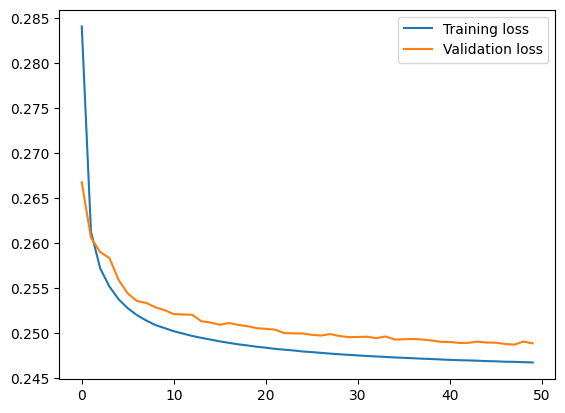

313/313 [==============================] - 1s 3ms/step


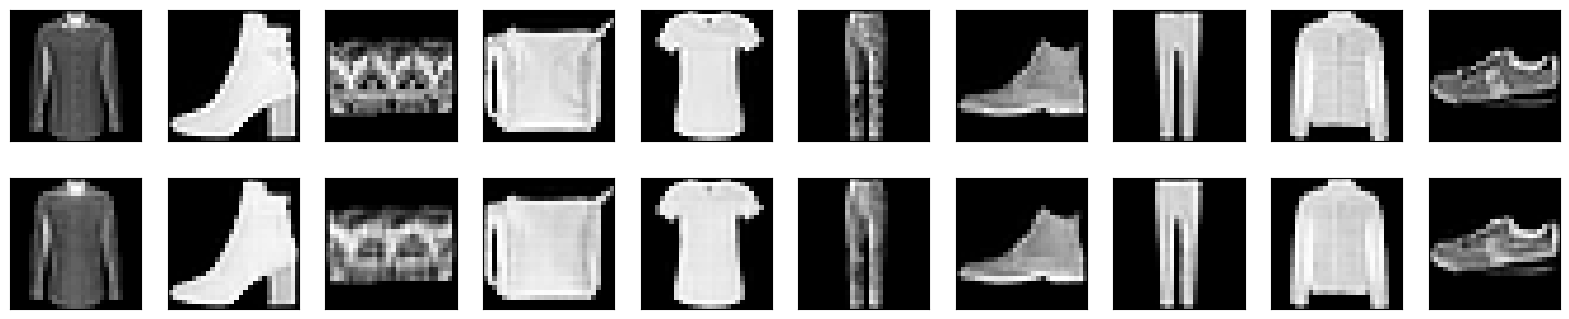

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
autoencoder = modeloAutoencoder()
opt_adamw = AdamW(learning_rate=0.001)
autoencoder.compile(optimizer=opt_adamw,loss='binary_crossentropy')
hist = autoencoder.fit(train_data,train_data,epochs=50,batch_size=64,validation_data=(test_data,test_data),callbacks=[early_stopping])
mostrarEvolucionSinAccuracy(hist)

# Mostrar las imágenes predichas por pantalla
display(test_data,autoencoder.predict(test_data))

Las imágenes reales son las de arriba y las reconstruidas las de abajo. En general hay menor grado de detalle en las reconstruidas, e incluso son más borrosas. Sin embargo, si no se observan con mucho detalle podrían confundirse con las imágenes reales.

### Entrenamiento con imágenes ruidosas

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

Como el modelo se entrena con datos ruidosos, no es seguro que los hiperparámetros óptimos sean los anteriores. Se experimenta con los mismos valores para una buena comparación de las curvas de entrenamiento, pero no implica que los que mejores métricas en validación devuelvan sean los mismos hiperparámetros que al entrenar con imágenes limpias. Además, en validación se usan las imágenes para test con ruido para comprobar si el modelo generaliza bien con imágenes que no ha visto y son ruidosas.

Entrenamiento con batch_size=64 y learning rate: 0.0005
Epoch 1/50
938/938 [==============================] - 12s 10ms/step - loss: 0.3271 - val_loss: 0.2998
Epoch 2/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2953 - val_loss: 0.2957
Epoch 3/50
938/938 [==============================] - 12s 12ms/step - loss: 0.2920 - val_loss: 0.2929
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2900 - val_loss: 0.2912
Epoch 5/50
938/938 [==============================] - 13s 14ms/step - loss: 0.2886 - val_loss: 0.2900
Epoch 6/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2876 - val_loss: 0.2892
Epoch 7/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2869 - val_loss: 0.2889
Epoch 8/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2863 - val_loss: 0.2882
Epoch 9/50
938/938 [==============================] - 10s 10ms/step - loss: 0.2858 - val_loss: 0.2878
Epoch 10/50
938/938 [=====

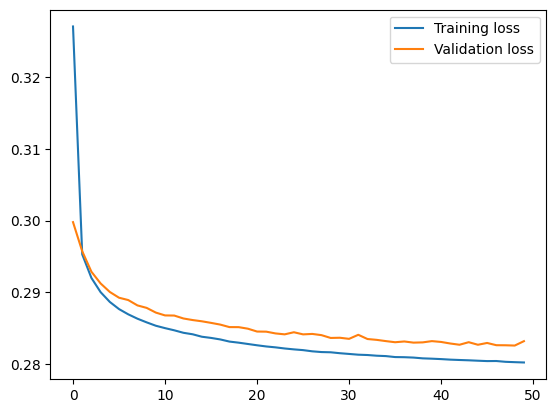

313/313 [==============================] - 1s 2ms/step
PSNR medio: 20.8622
Entrenamiento con batch_size=64 y learning rate: 0.001
Epoch 1/50
938/938 [==============================] - 11s 10ms/step - loss: 0.3151 - val_loss: 0.2985
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2924 - val_loss: 0.2925
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2891 - val_loss: 0.2905
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2873 - val_loss: 0.2887
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2861 - val_loss: 0.2874
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2851 - val_loss: 0.2870
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2843 - val_loss: 0.2861
Epoch 8/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2838 - val_loss: 0.2854
Epoch 9/50
938/938 [==============================] - 13s 14m

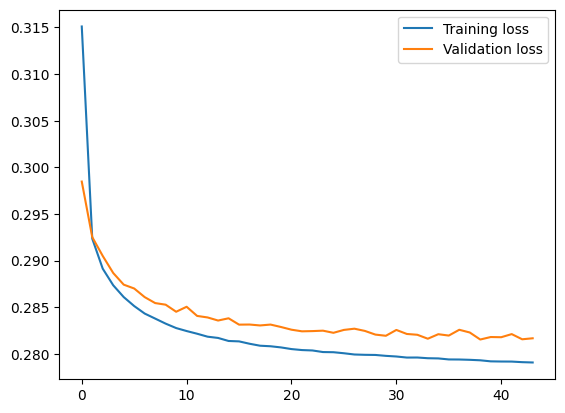

313/313 [==============================] - 1s 2ms/step
PSNR medio: 21.4379
Los mejores hiperparámetros son 
{'batch_size': 64, 'learning_rate': 0.001}
Estos hiperparámetros han dado u PSNR medio de 21.4379


In [ ]:
batch_sizes = [64]
learning_rates = [0.0005,0.001]

best_psnr = -1
#best_ssim = -1
best_params = {}

for batch_size in batch_sizes:
  for lr in learning_rates:
    print(f'Entrenamiento con batch_size={batch_size} y learning rate: {lr}')
    early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
    autoencoder = modeloAutoencoder()
    opt_adamw = AdamW(learning_rate=lr)
    # La siguiente función se usa para liberar memoria si estuviese ocupada
   # tf.keras.backend.clear_session()
    autoencoder.compile(optimizer=opt_adamw,loss='binary_crossentropy')
    hist = autoencoder.fit(noisy_train_data,train_data,epochs=50,batch_size=batch_size,validation_data=(noisy_test_data,test_data),callbacks=[early_stopping])
    mostrarEvolucionSinAccuracy(hist)

    # Evaluación del modelo en imágenes limpias
    imagenes_sin_ruido = autoencoder.predict(test_data)
    psnr_medio = np.mean([calcularMetricas(test_data[i],imagenes_sin_ruido[i]) for i in range(len(test_data))])

    print(f'PSNR medio: {psnr_medio:.4f}')#, SSIM medio:{ssim_medio:.4f}')

    if psnr_medio > best_psnr:# and ssim_medio > best_ssim:
      best_psnr = psnr_medio
      #best_ssim = ssim_medio
      best_params = {'batch_size': batch_size, 'learning_rate': lr}

print("Los mejores hiperparámetros son ")
print(best_params)
print(f'Estos hiperparámetros han dado u PSNR medio de {best_psnr:.4f}')# y SSIM medio de {best_ssim:.4f}')


Se obtienen los siguientes resultados:

- Modelo con AdamW, learning rate inicial a $0.0005$ y tamaño de batch a $64$: La pérdida en validación acaba teniendo valor $0.2832$ y el PSNR medio es de $20.8622$. La gráfica de pérdida da a entender que el modelo a convergido y, aunque tendía a sobreajustarse, dada la estabilidad alcanzada este sobreajuste es muy pequeño (esto es, por la diferencia de pérdidas en la época $50$).

- Modelo con AdamW, learning rate inicial a $0.001$ y tamaño de batch a $64$: En validación el valor de la función de pérdida es $0.2817$, y el PSNR medio es de $21.4379$. Si se observa la gráfica de pérdida parece que el modelo está sobreajustándose, por lo que en la época $42$ aproximadamente Early Stopping ha parado el entrenamiento. Aquí la curva de pérdida en validación zigzaguea (aunque si se cambiase a una escala mayor, probablemente parecería una curva suave) y, aunque se mencionó que el modelo tendía a sobreajustarse, debe observarse que la escala del eje de los valores de pérdida es más pequeña que en otros casos, por lo que finalmente la diferencia entre pérdida en entrenamiento y validación es minúscula.

De acuerdo a los resultados en validación, puede observarse que el mejor modelo es el de learning rate inicial a $0.001$ y tamaño de batch a $64$. La pérdida en validación es levemente menor, pero el PSNR medio es algo mayor, indicando una ligera mejor calidad en las imágenes reconstruidas. Sin embargo, a diferencia del caso anterior, en el que se entrenaba con imágenes limpias, el PSNR medio da a entender que las imágenes resultantes son peores (aunque en un término de calidad medio como se indicó al inicio en los posibles rangos de PSNR).

Para los próximos apartados se vuelve a entrenar el mejor modelo del segundo caso (tamaño de batch $64$ y learning rate inicial a $0.001$), mostrando por pantalla los resultados de las predicciones de las imágenes con ruido en validación.

Epoch 1/50
938/938 [==============================] - 21s 15ms/step - loss: 0.3153 - val_loss: 0.2957
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2920 - val_loss: 0.2923
Epoch 3/50
938/938 [==============================] - 11s 12ms/step - loss: 0.2891 - val_loss: 0.2902
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2873 - val_loss: 0.2895
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2861 - val_loss: 0.2878
Epoch 6/50
938/938 [==============================] - 10s 11ms/step - loss: 0.2852 - val_loss: 0.2889
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2846 - val_loss: 0.2863
Epoch 8/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2841 - val_loss: 0.2861
Epoch 9/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2836 - val_loss: 0.2859
Epoch 10/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2832 - v

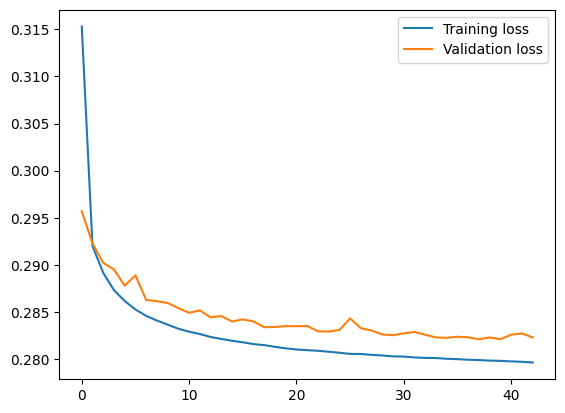

313/313 [==============================] - 1s 2ms/step


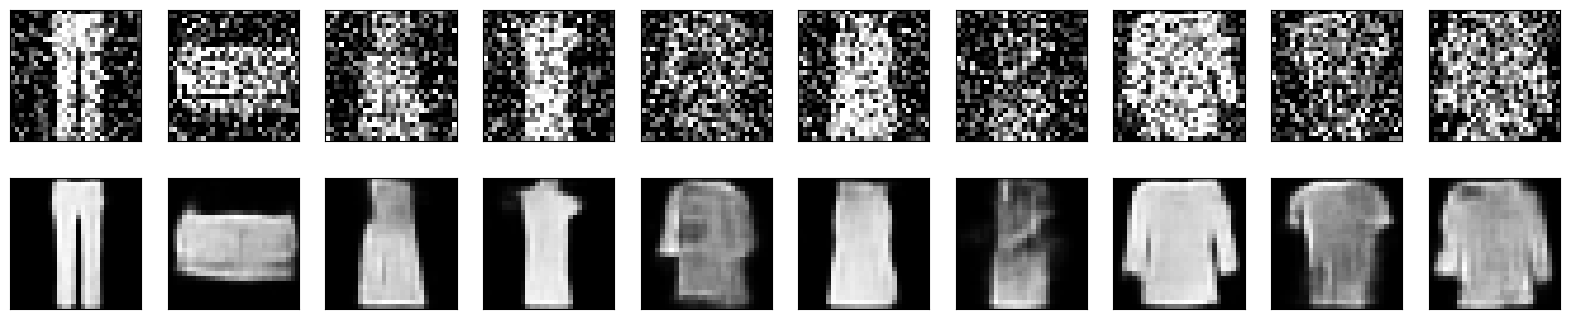

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
autoencoder = modeloAutoencoder()
opt_adamw = AdamW(learning_rate=0.001)
autoencoder.compile(optimizer=opt_adamw,loss='binary_crossentropy')
hist = autoencoder.fit(noisy_train_data,train_data,epochs=50,batch_size=64,validation_data=(noisy_test_data,test_data),callbacks=[early_stopping])
mostrarEvolucionSinAccuracy(hist)

# Mostrar las imágenes predichas por pantalla
display(noisy_test_data,autoencoder.predict(noisy_test_data))

Con una cantidad de ruido del $40$%, se observa que la reconstrucción dada por la red entrenada con las imágenes ruidosas es bastante buena. Cierto es que si se comparan las imágenes reconstruidas con las imágenes reales, el resultado es bastante aceptable, pero a grandes rasgos gran cantidad de ruido que aparece en las imágenes de entrada ha sido eliminado en las imágenes de salida. Únicamente sería mejorable la presentación y calidad de resolución de las nuevas imágenes.

### Búsqueda del breakpoint y capacidad de generalización.

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

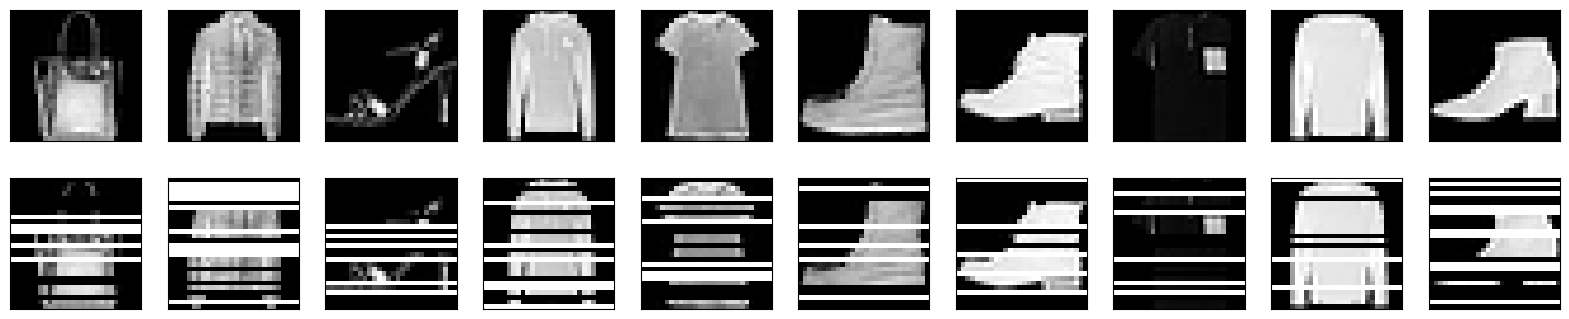

In [ ]:
noise_factor = 0.4

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

#### Progresión de ruido hasta encontrar un breakpoint

Para la realización del ejercicio, y dado que en el anterior apartado ha sido útil la comparación con las imágenes reales para conocer la calidad del resultado, se implementa una función, tomando como base `display`, que permita mostrar por pantalla tres listas de imágenes: las imágenes reales, las imágenes con ruido y las imágenes reconstruidas, junto al porcentaje de ruido añadido en la imagen.

In [ ]:
def display_three_lists(array1, array2, array3, noise_level):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    images3 = array3[indices, :]

    noise_label = f"Ruido={noise_level*100}%"

    plt.figure(figsize=(20, 6))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(image3.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.suptitle(noise_label, fontsize=16)
    plt.show()

Usando el modelo entrenado con imágenes con un $40$% de ruido, se procede a obtener los resultados de una serie de imágenes con más ruido, desde un $40$% para tener datos de referencia, hasta un $100$% de ruido, realizando un incremento del $5$% en cada iteración.

313/313 [==============================] - 1s 2ms/step


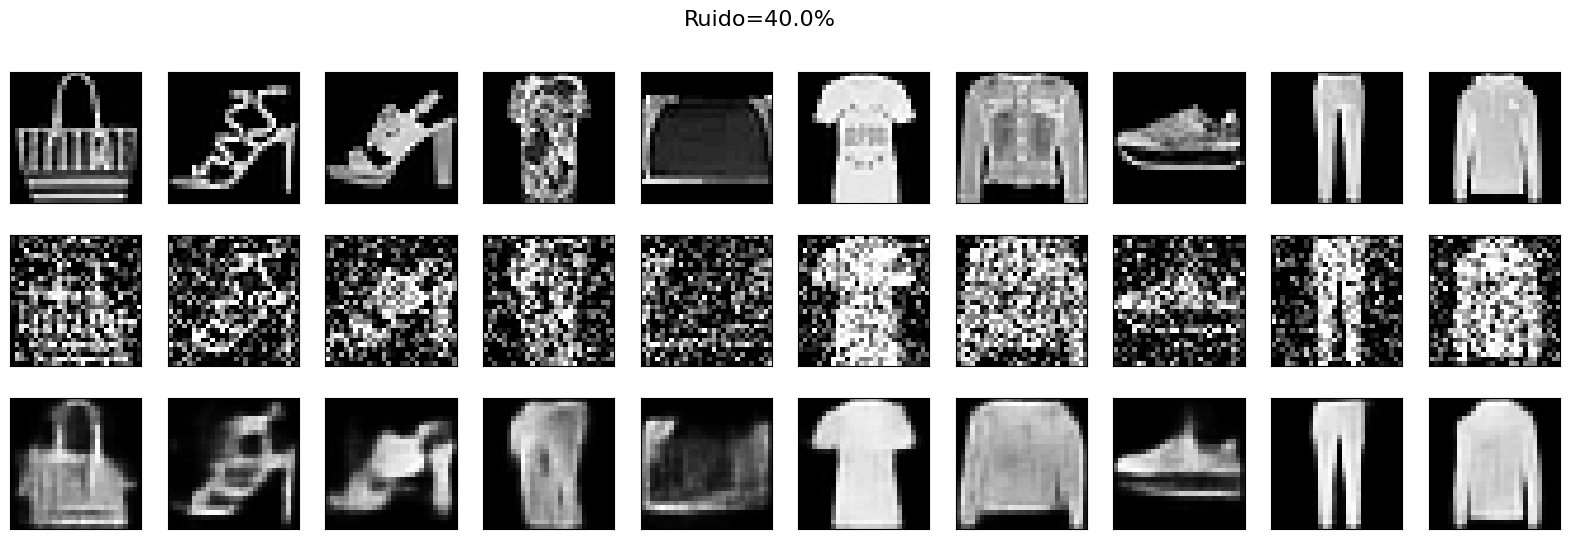

313/313 [==============================] - 1s 2ms/step


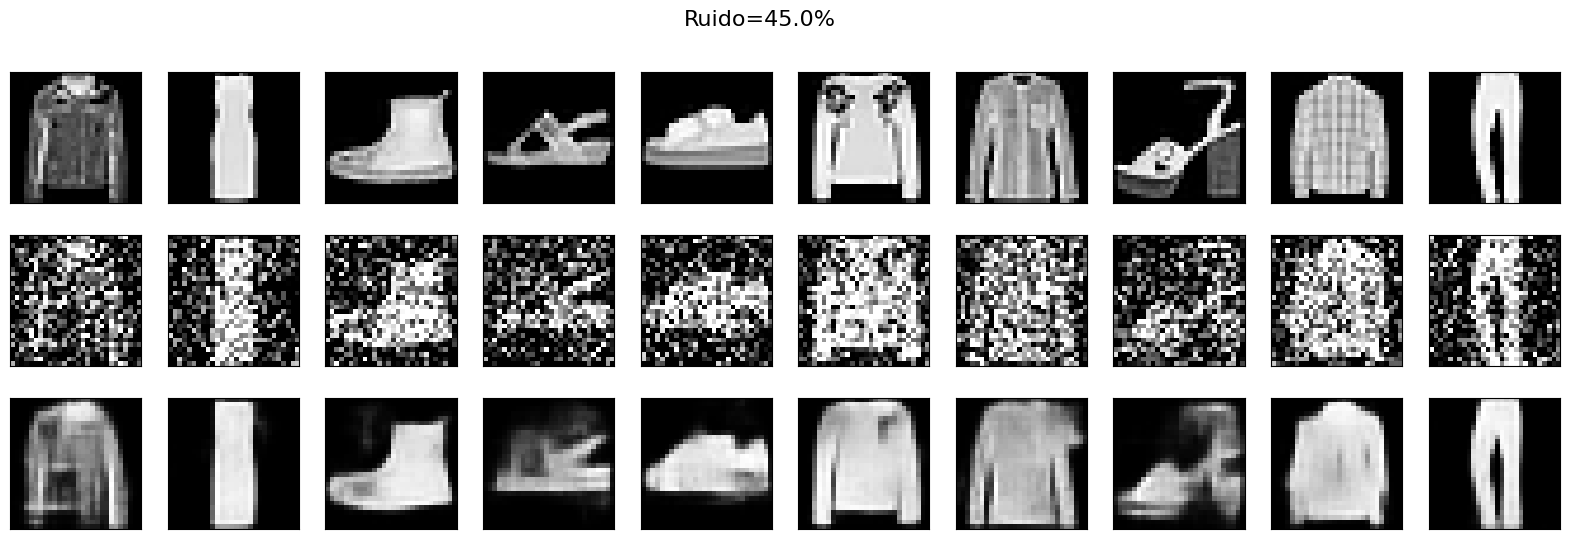

313/313 [==============================] - 1s 2ms/step


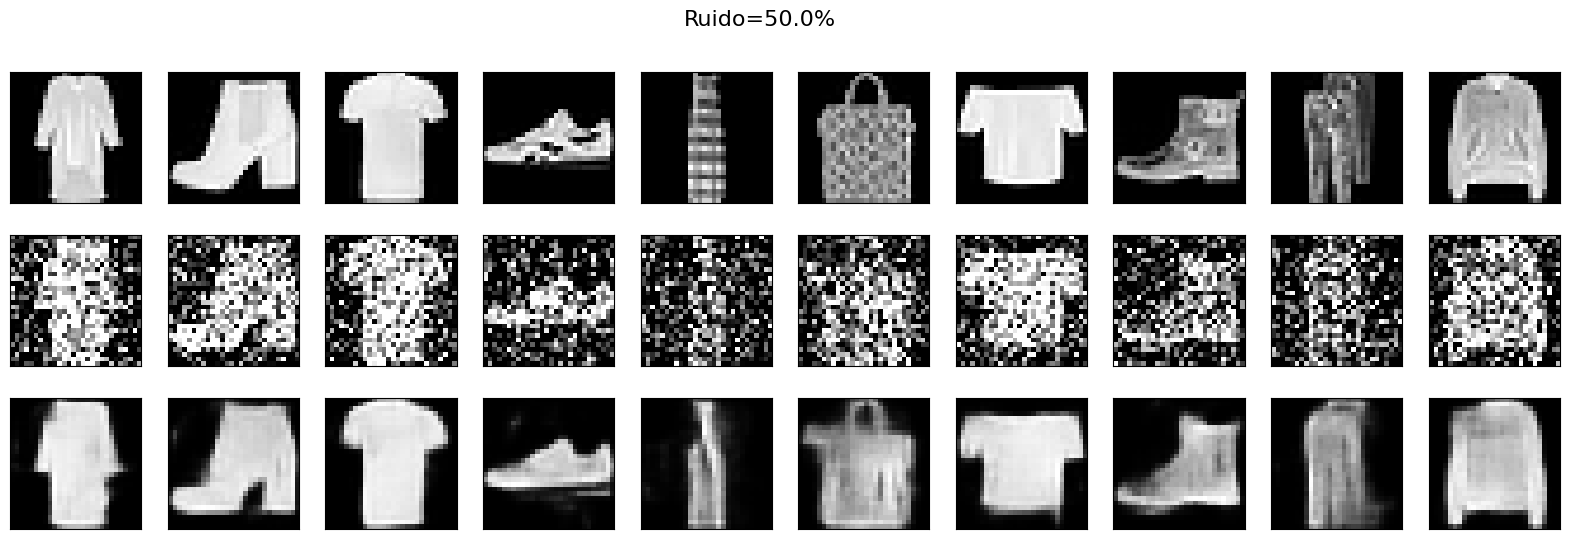

313/313 [==============================] - 1s 2ms/step


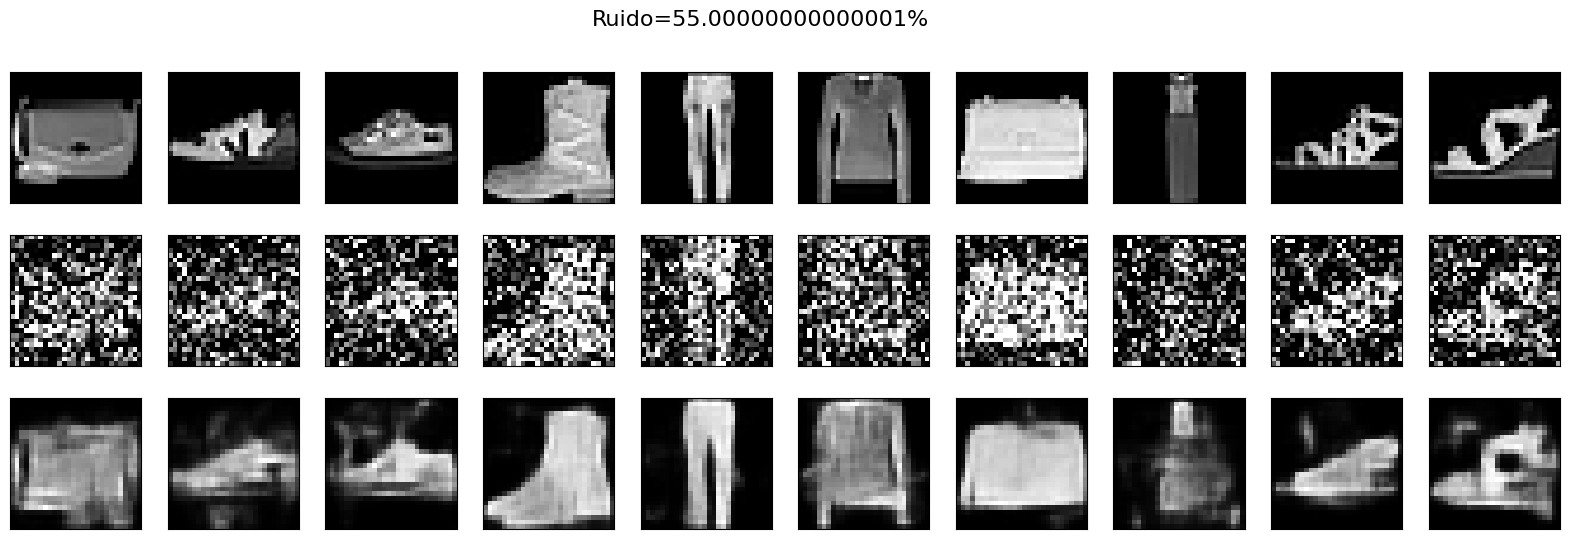

313/313 [==============================] - 1s 4ms/step


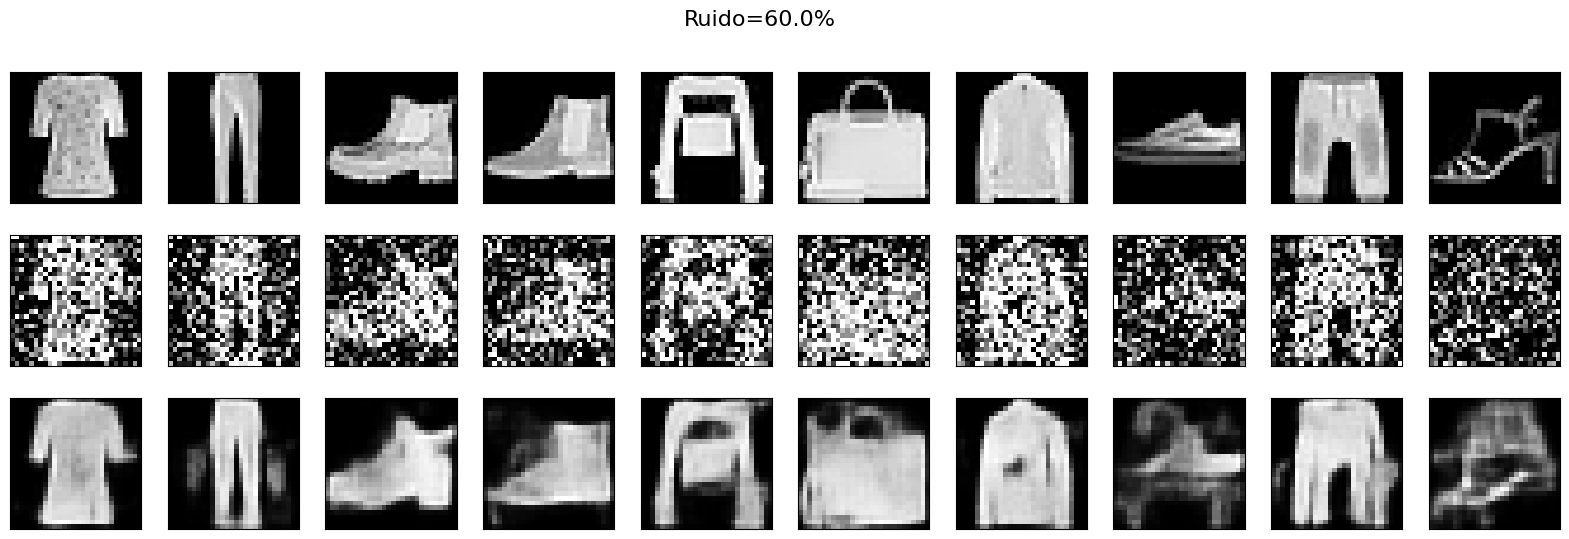

313/313 [==============================] - 1s 4ms/step


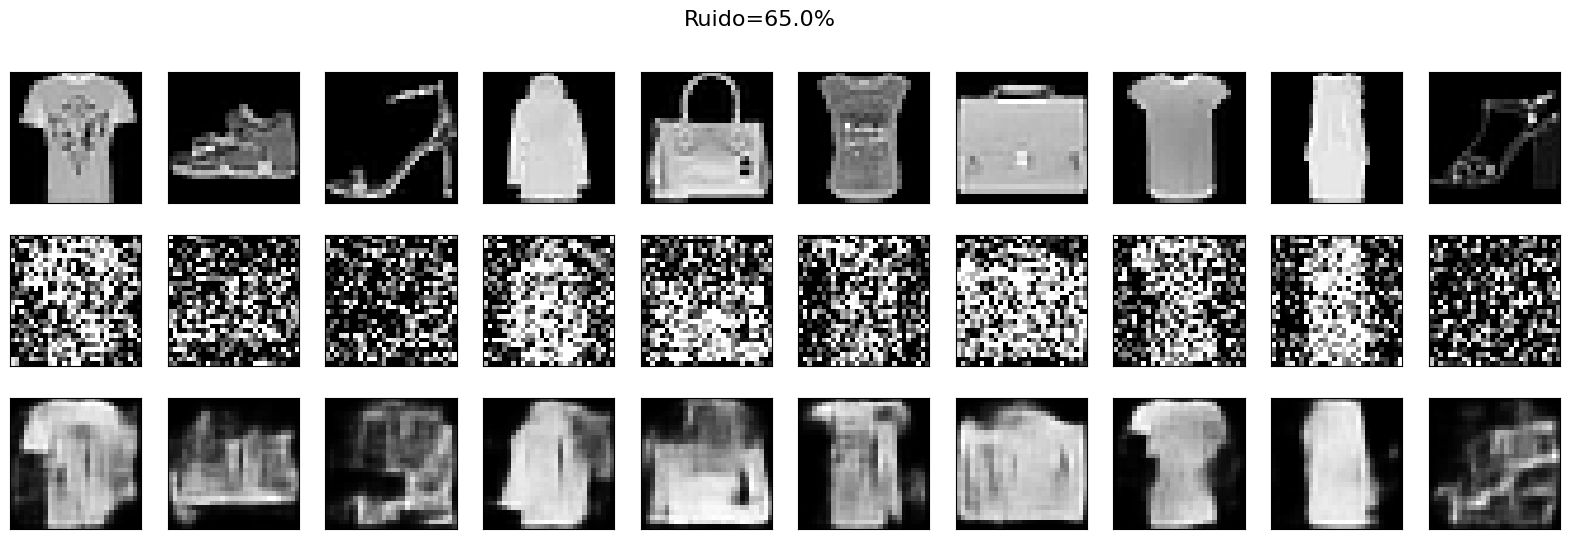

313/313 [==============================] - 2s 6ms/step


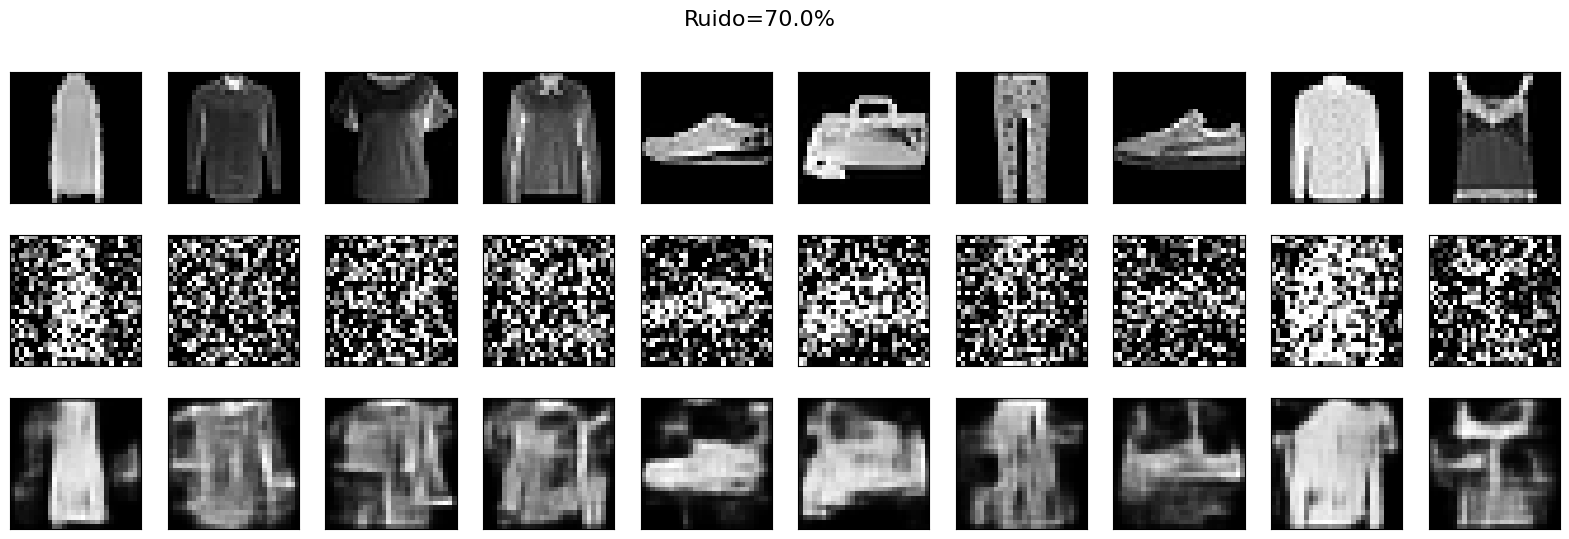

313/313 [==============================] - 2s 7ms/step


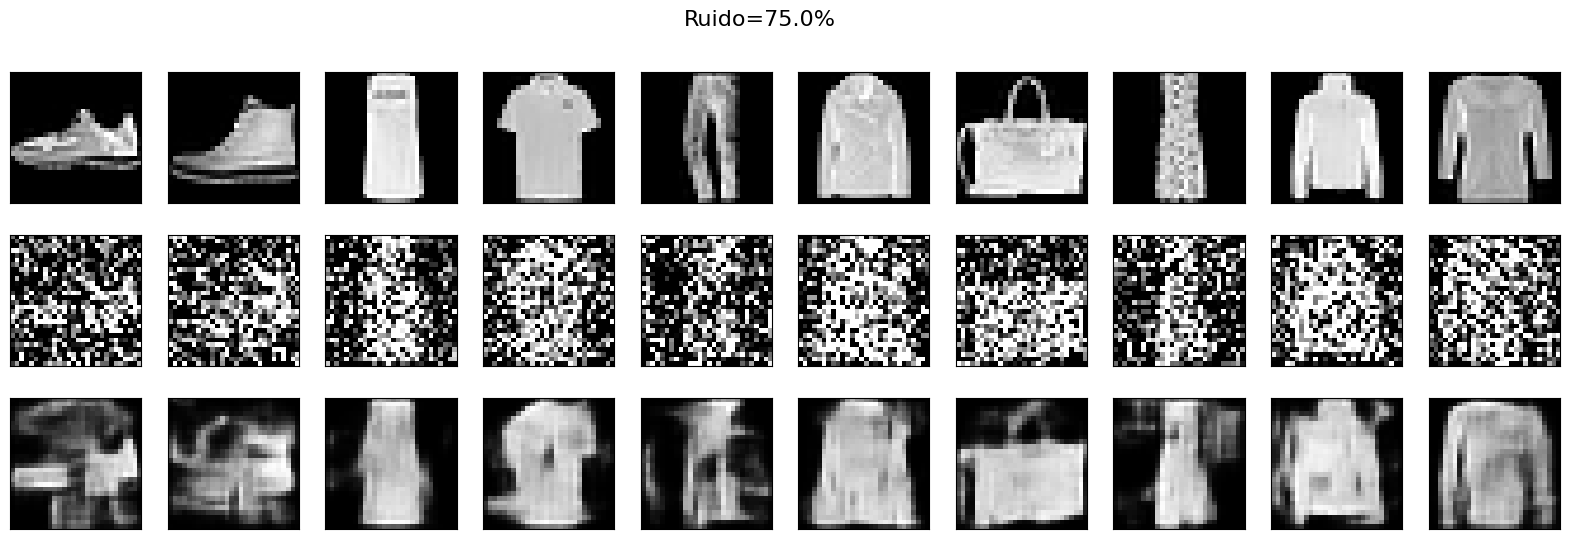

313/313 [==============================] - 1s 2ms/step


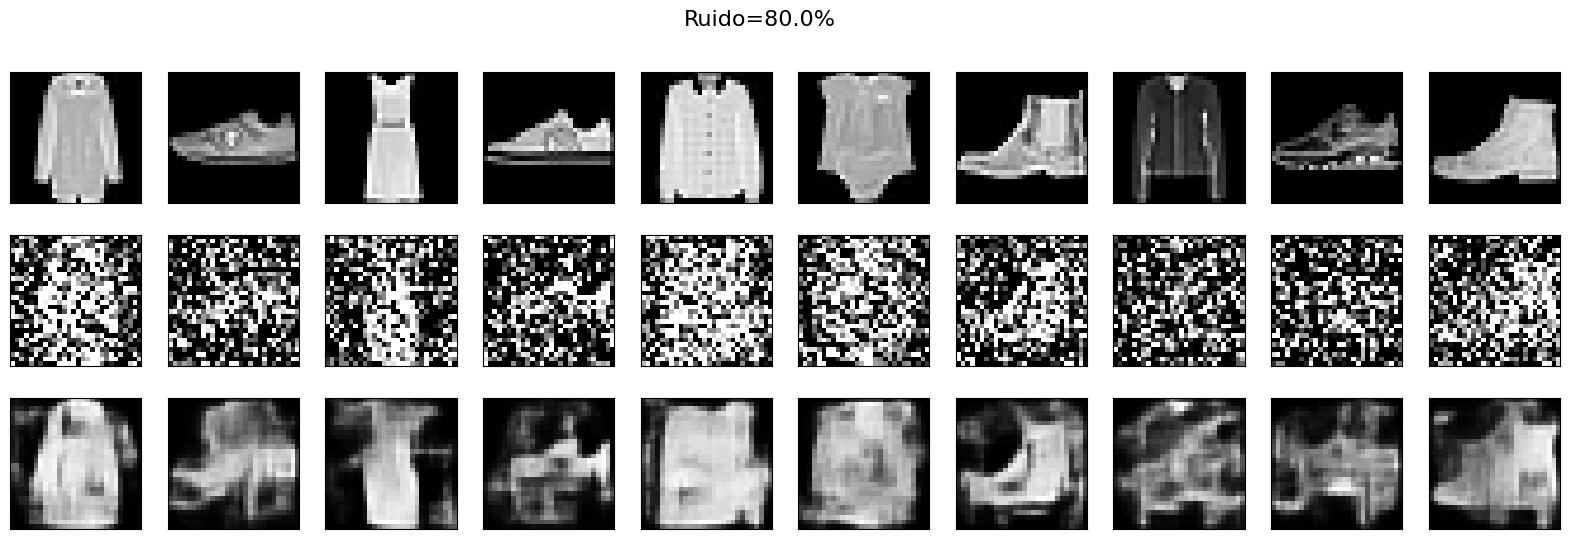

313/313 [==============================] - 1s 2ms/step


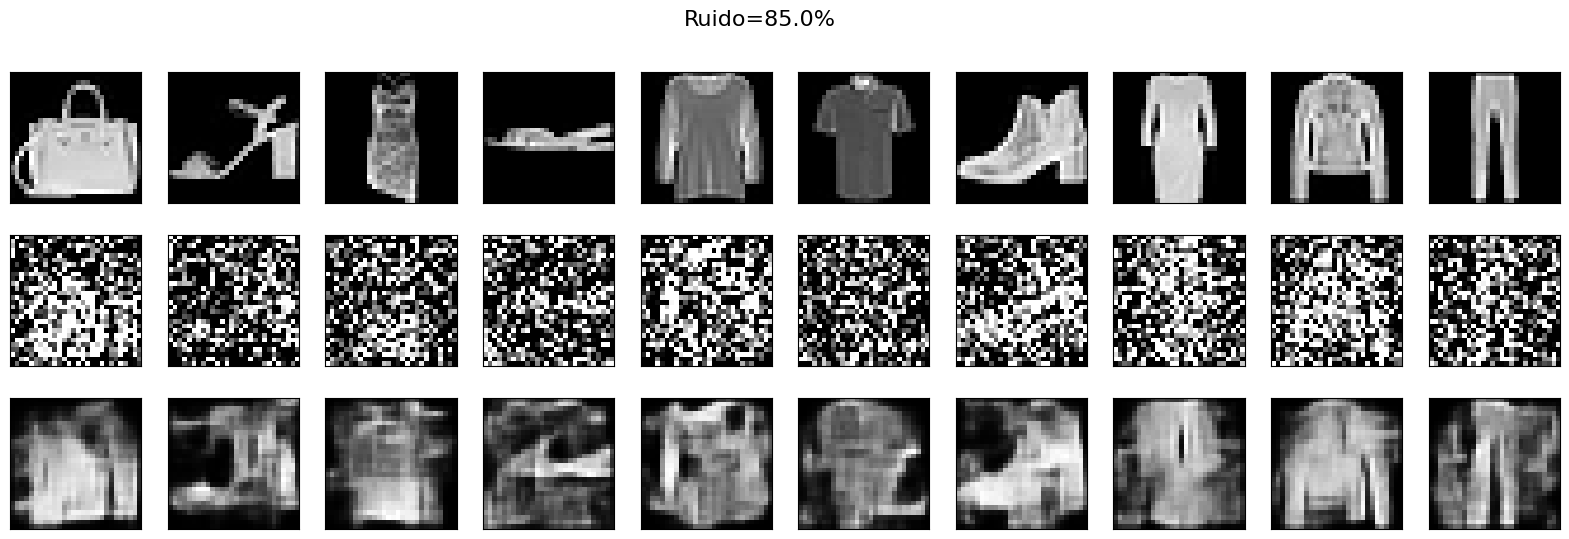

313/313 [==============================] - 1s 3ms/step


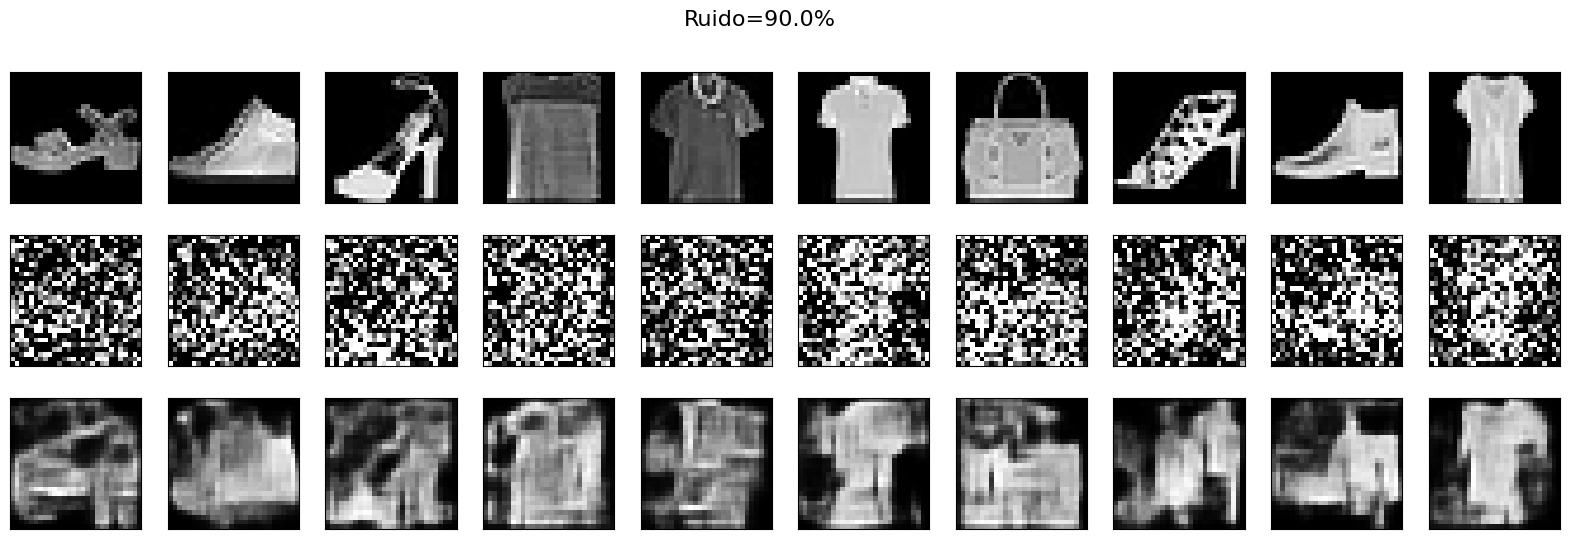

313/313 [==============================] - 1s 3ms/step


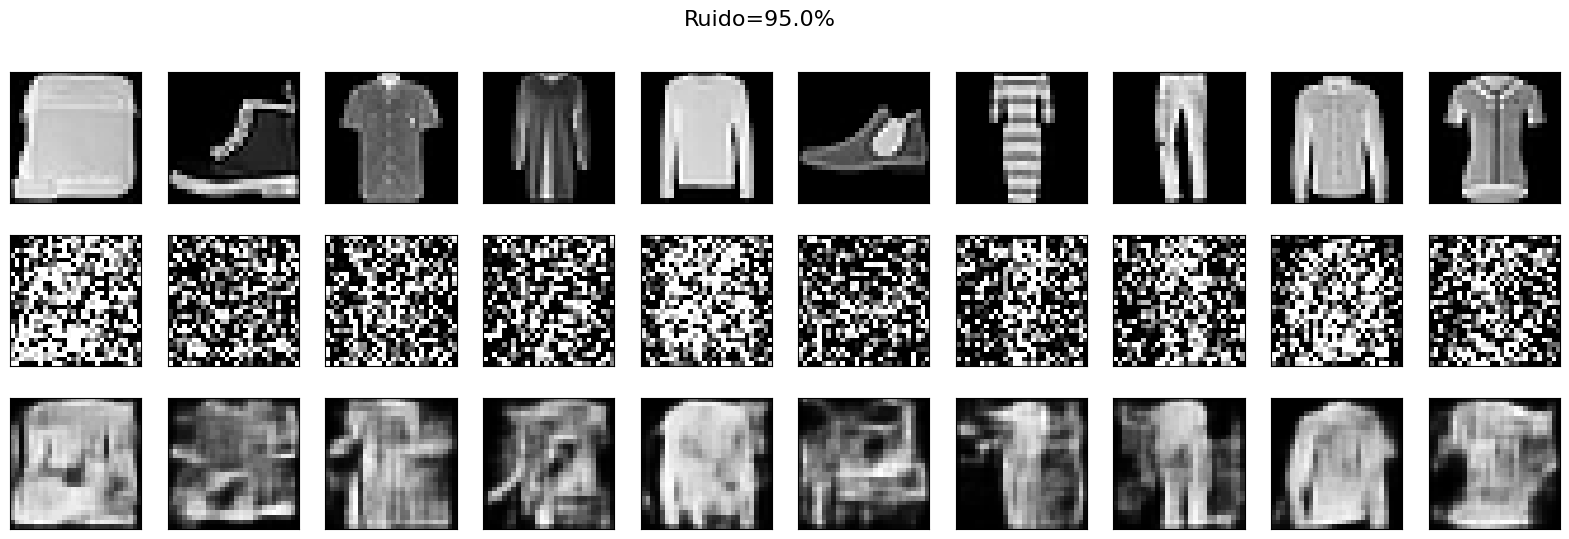

313/313 [==============================] - 1s 2ms/step


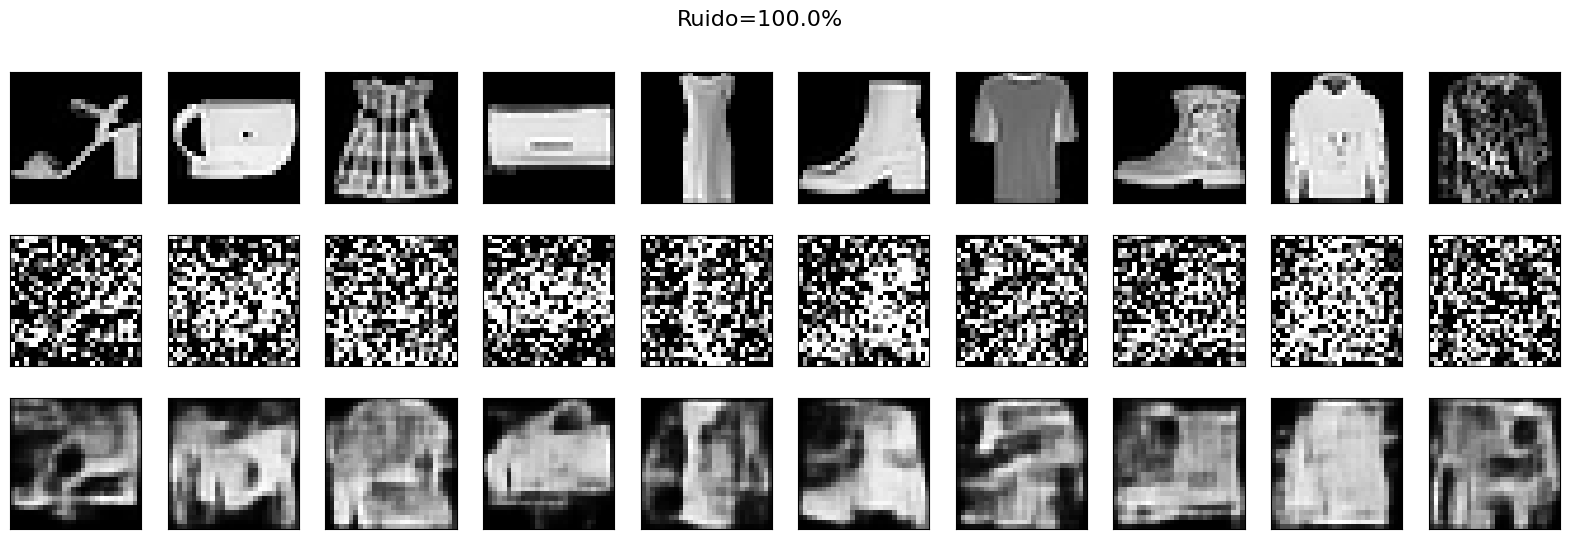

In [ ]:
noises = [0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]

for noise_number in noises:
  ims_ruido_test = noise(test_data,noise_number)
  display_three_lists(test_data,ims_ruido_test,autoencoder.predict(ims_ruido_test),noise_number)

Tras realizar una serie de reconstrucciones de imágenes con ruido incremental, puede observarse que con ruido aleatorio, que es el que tienen las imágenes con las que se entrenó el modelo, las reconstrucciones son aproximadas a la realidad (aunque se pierde cierta precisión en la imagen). Si bien es cierto, hay imágenes mejor reconstruidas que otras, concluyendo que el modelo recosntruye meor las imágenes con objetos con tonos más blancos y sin contrastes.

En relación al posible breakpoint, si este estuviese relacionado con la preservación de la forma del objeto, estaría en torno al $65$%-$70$%, ya que a partir de este punto se empiezan a ver la presencia de píxeles, presumiblemente relacionados con otros objetos inexistentes, en algunas imágenes, además de que hay reconstrucciones que no tienen nada que ver con la imagen original (como la tercer imagen en el caso de un ruido de $65$%). Conforme más aumenta el porcentaje de ruido, aún peores son las reconstrucciones, llegando a un caso extremo de $100$% de ruido. Habría que remarcar que en este tipo de casos tan extremos, la reconstrucción no se acerca a la imagen real, pero sí consigue construir cierto patrón relacionado con la forma del objeto en la imagen original, lo cual podría ser positivo teniendo en cuenta que el objeto en la imagen con ruido tan alto no es detectado por el ojo humano, ni siquiera se podría intuir que hay un objeto.

#### Autoencoder frente a ruido diferente

313/313 [==============================] - 1s 3ms/step


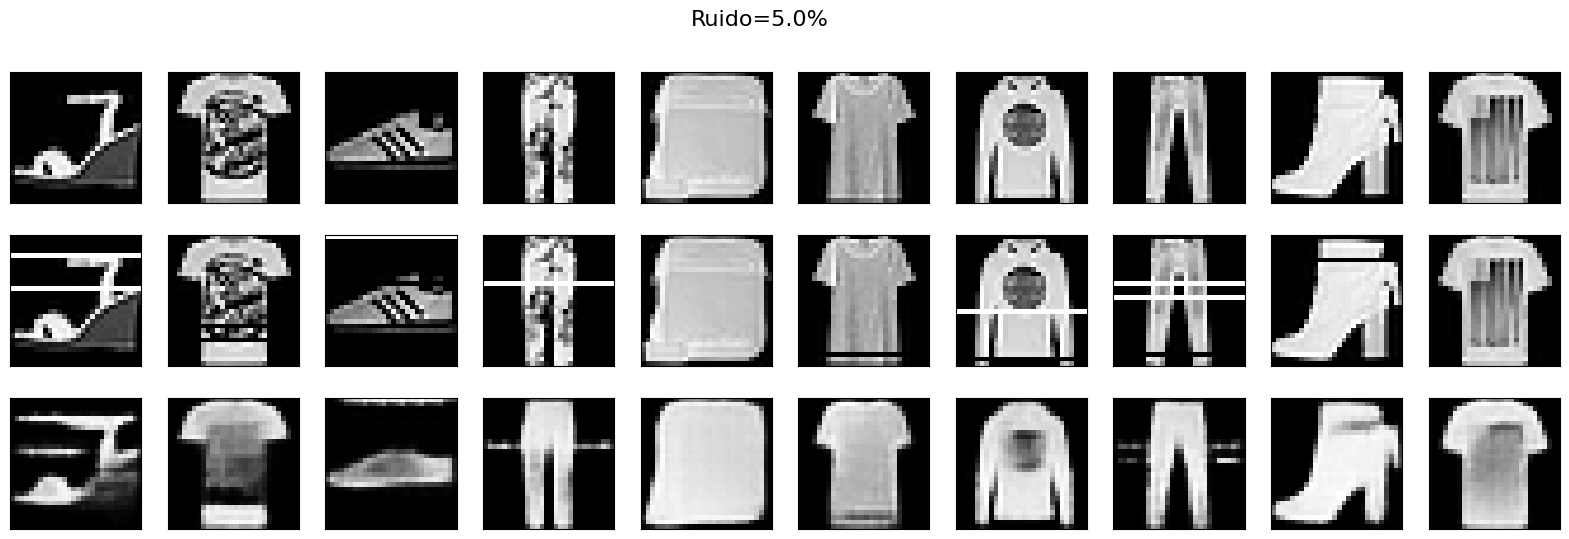

313/313 [==============================] - 1s 2ms/step


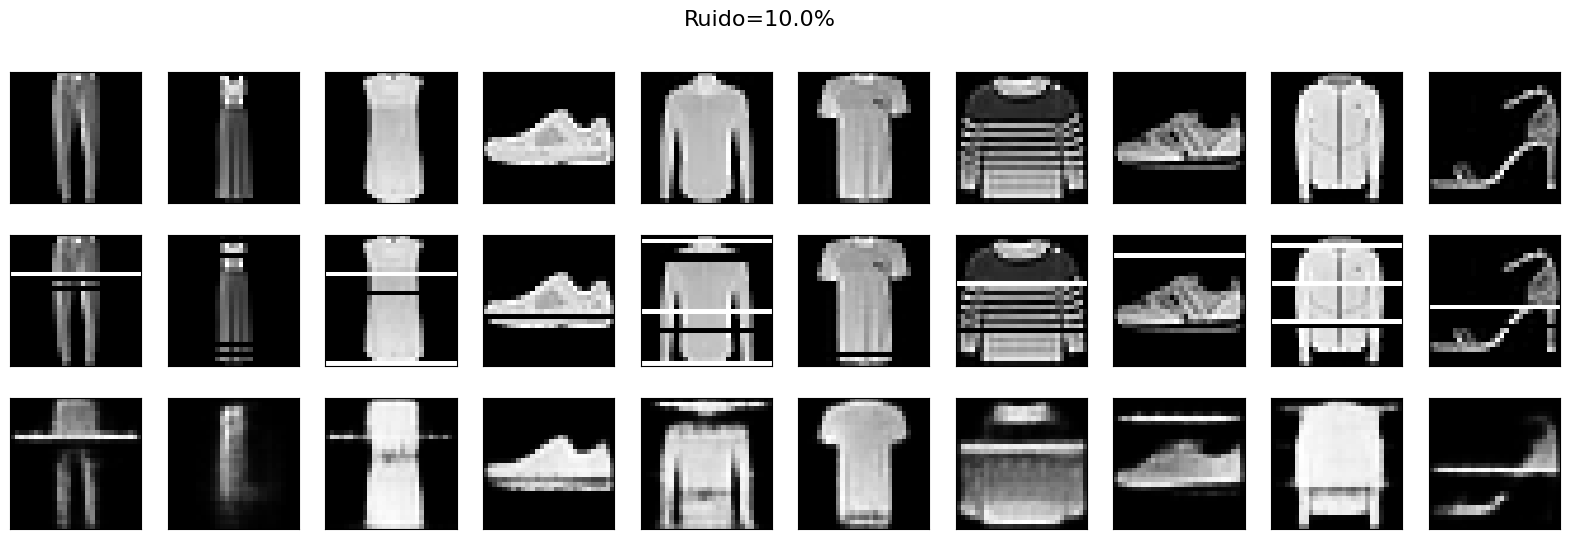

313/313 [==============================] - 1s 2ms/step


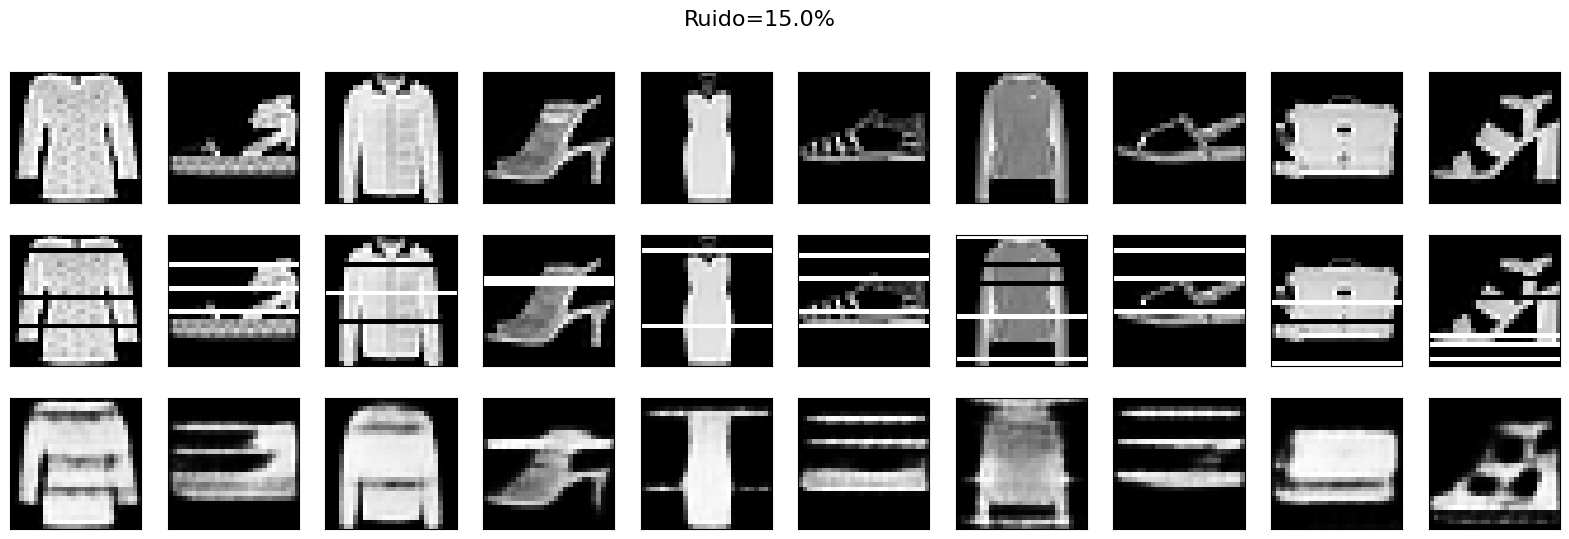

313/313 [==============================] - 1s 2ms/step


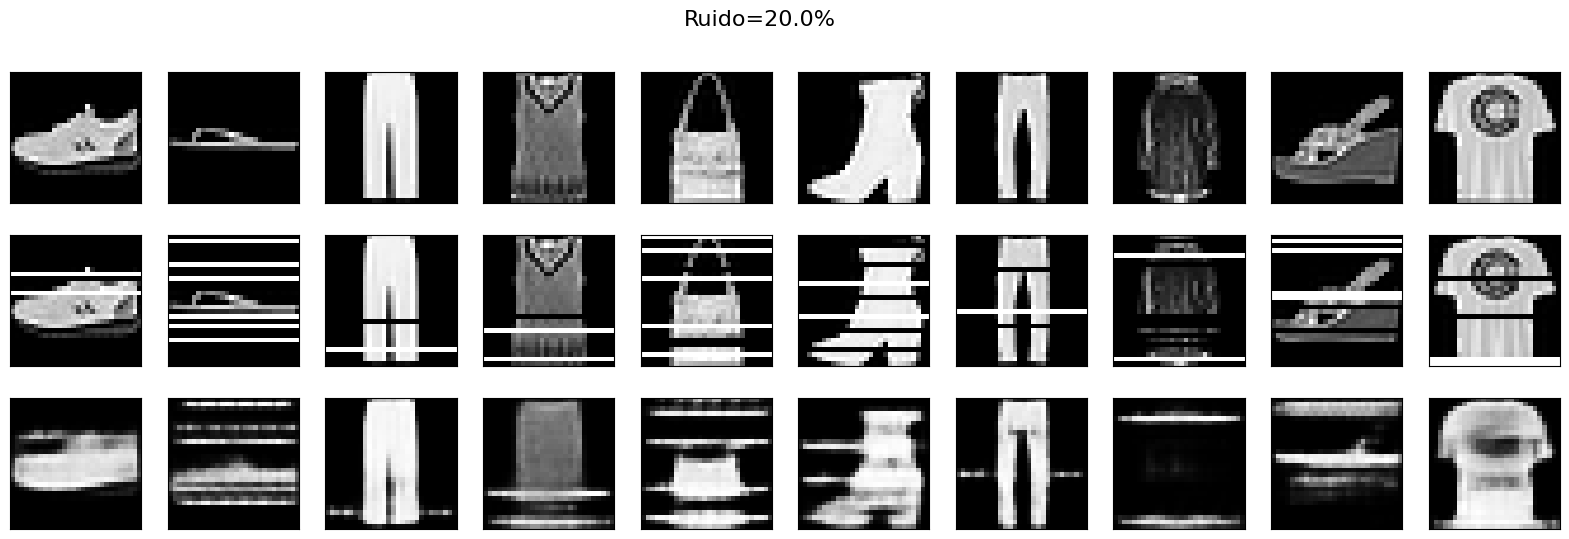

313/313 [==============================] - 1s 2ms/step


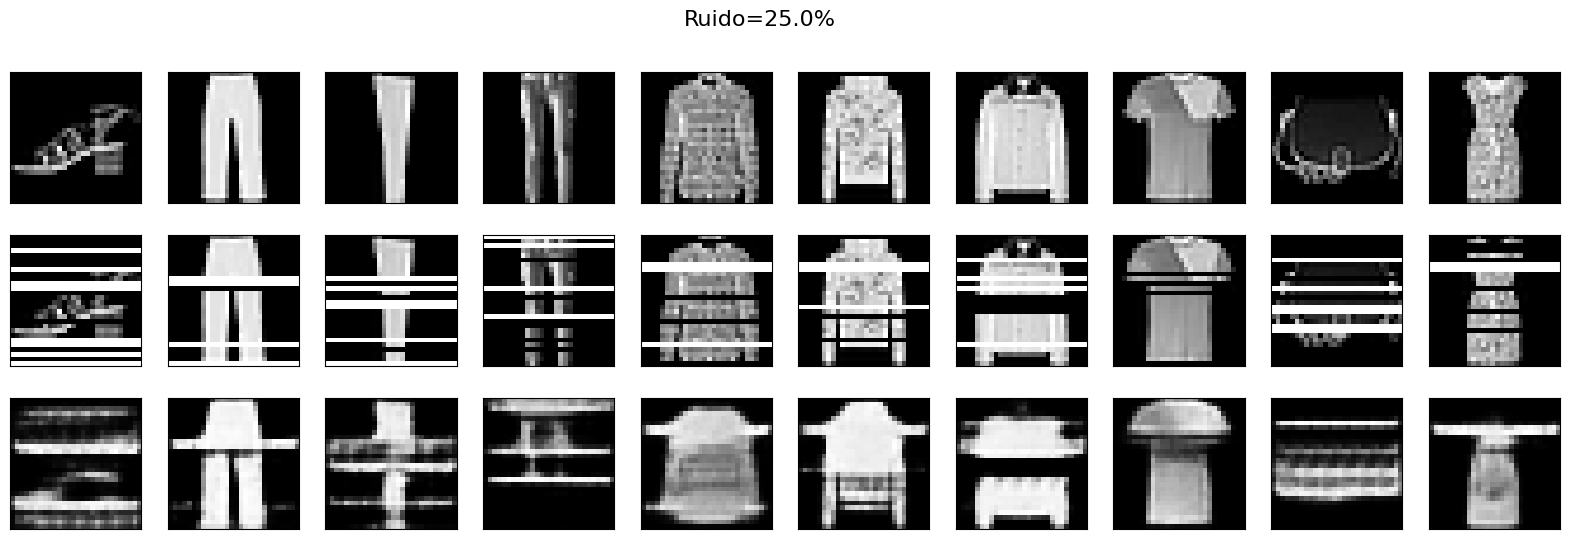

313/313 [==============================] - 2s 6ms/step


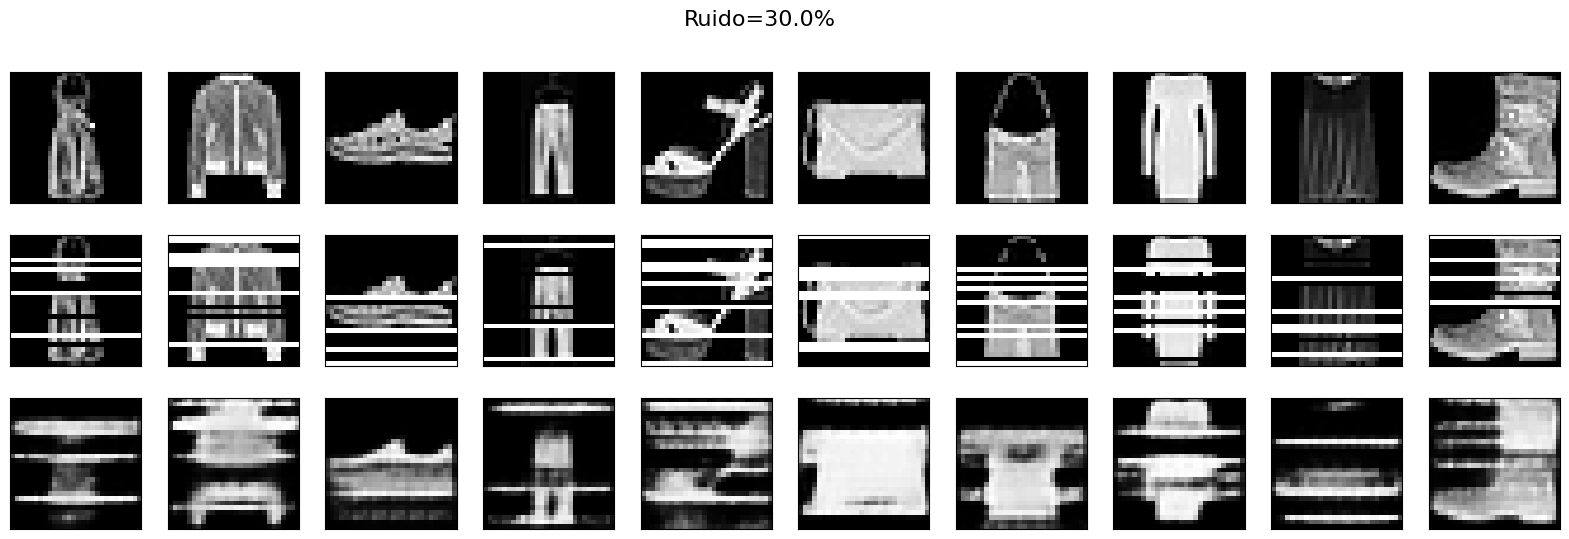

313/313 [==============================] - 1s 4ms/step


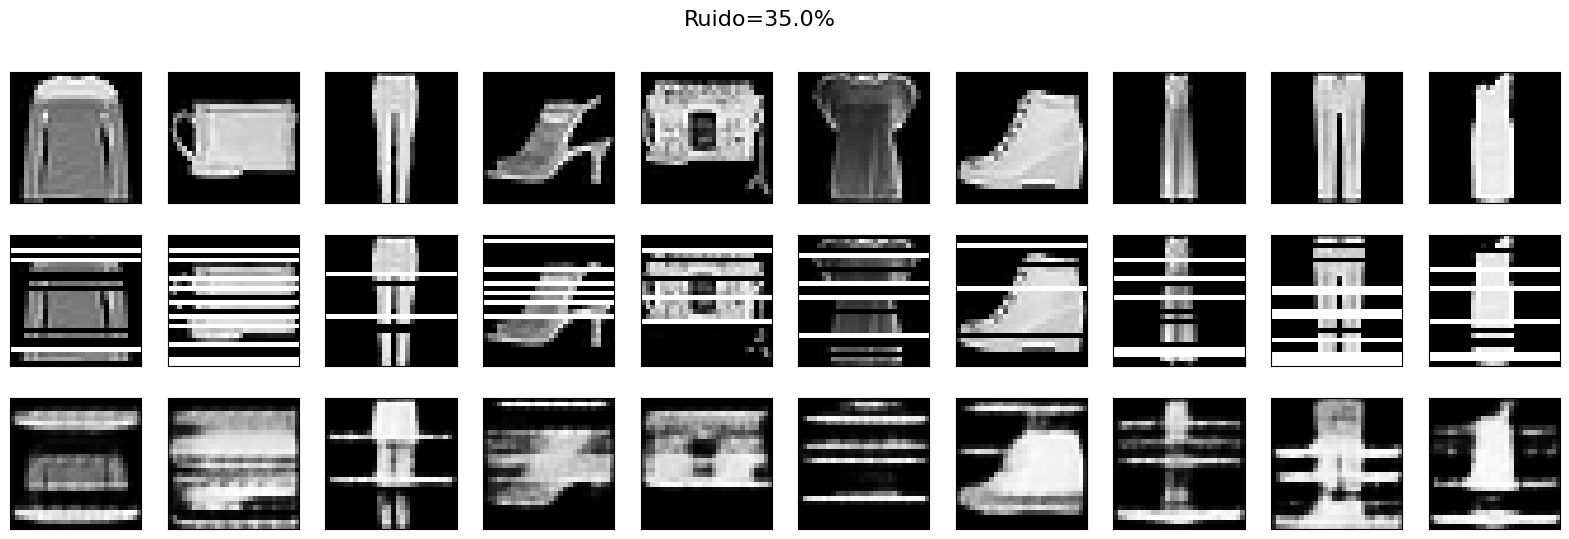

313/313 [==============================] - 1s 4ms/step


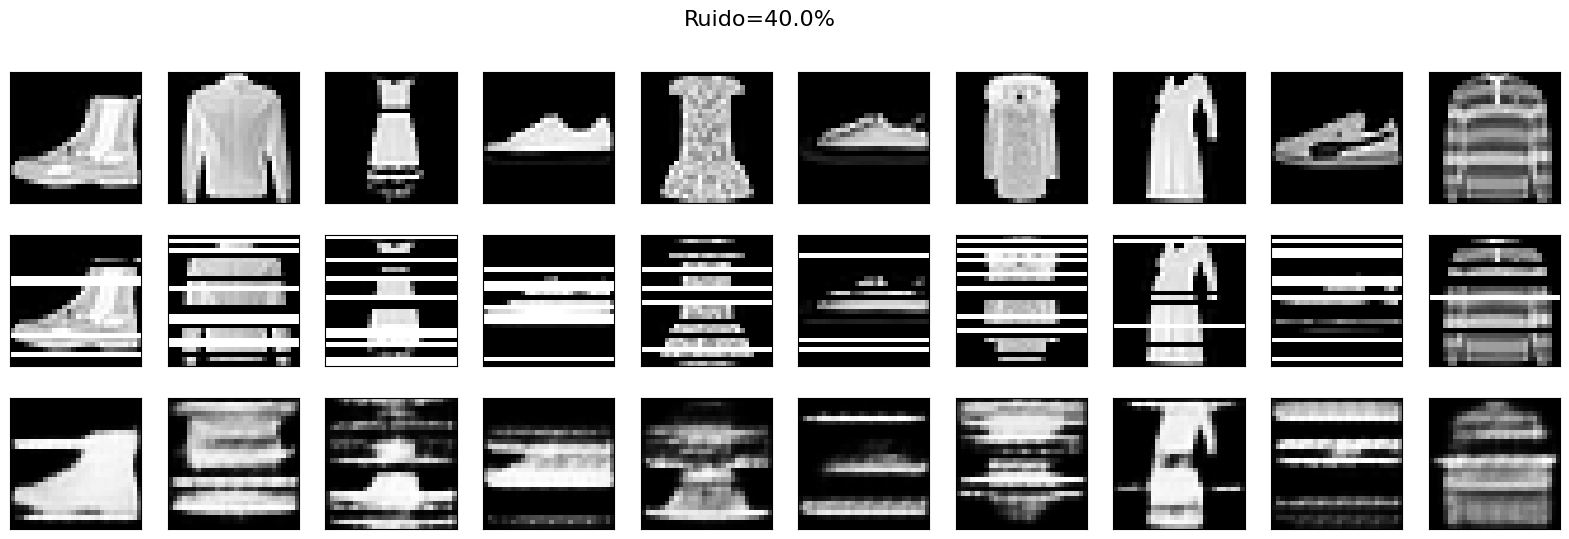

313/313 [==============================] - 1s 3ms/step


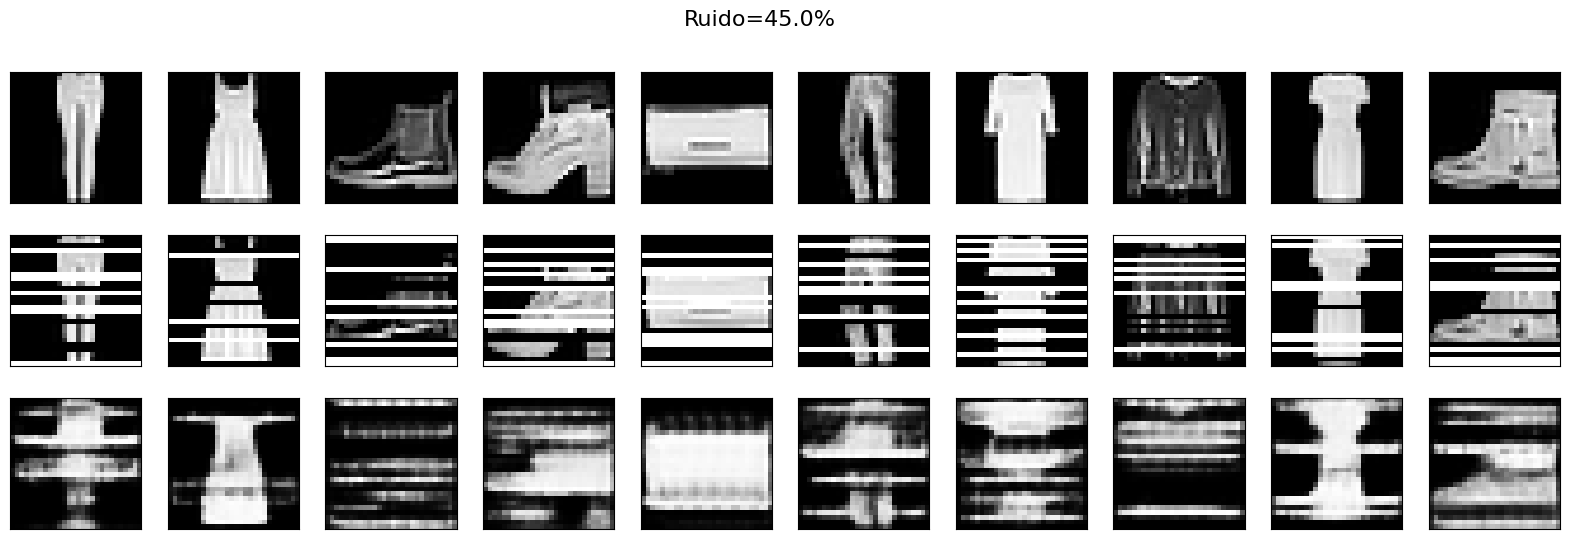

313/313 [==============================] - 1s 3ms/step


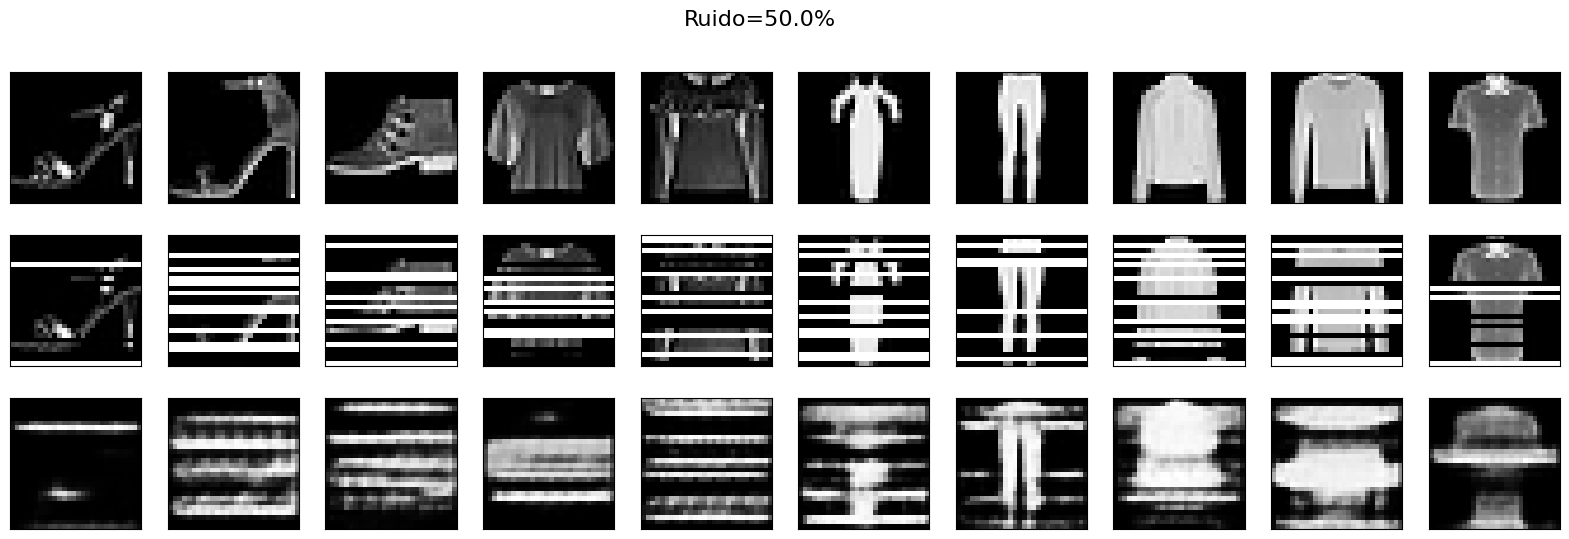

313/313 [==============================] - 1s 2ms/step


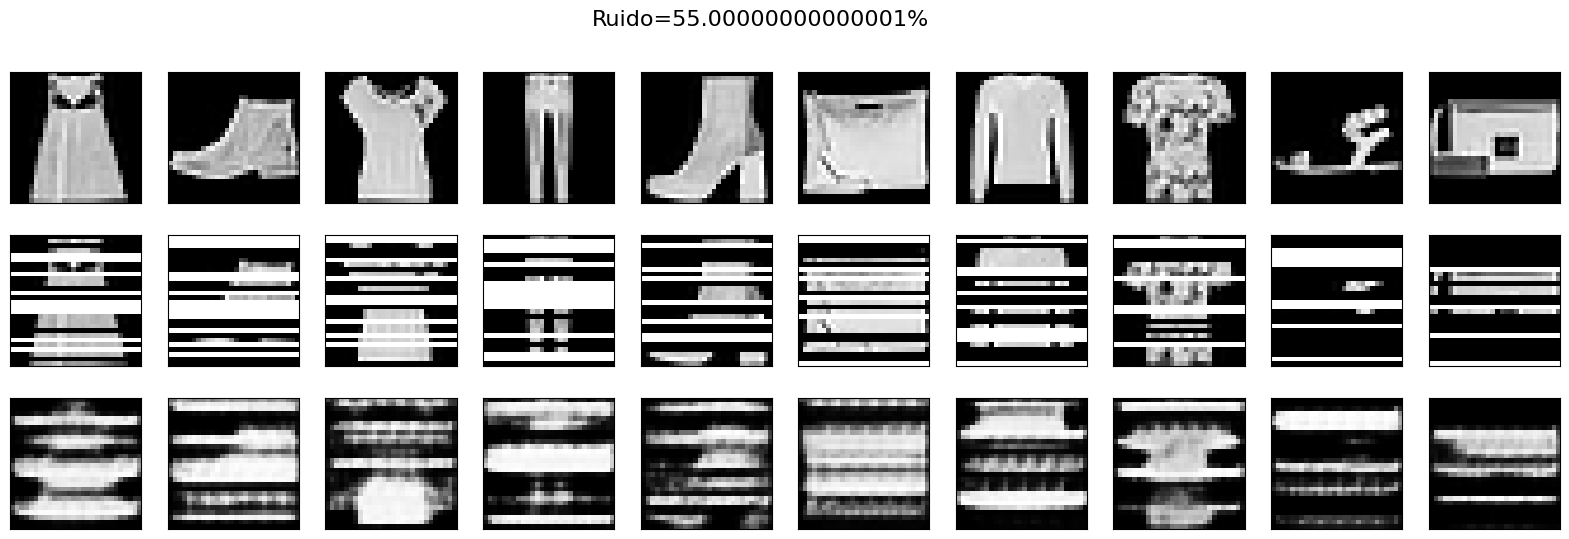

313/313 [==============================] - 1s 2ms/step


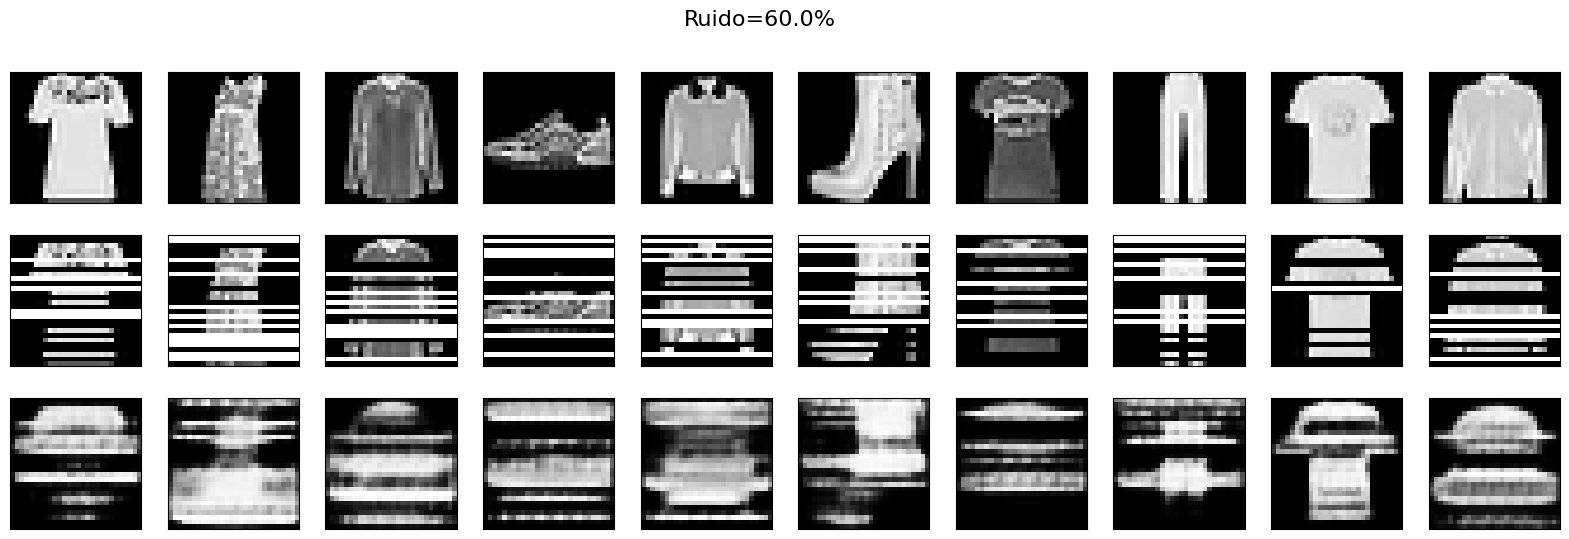

313/313 [==============================] - 1s 2ms/step


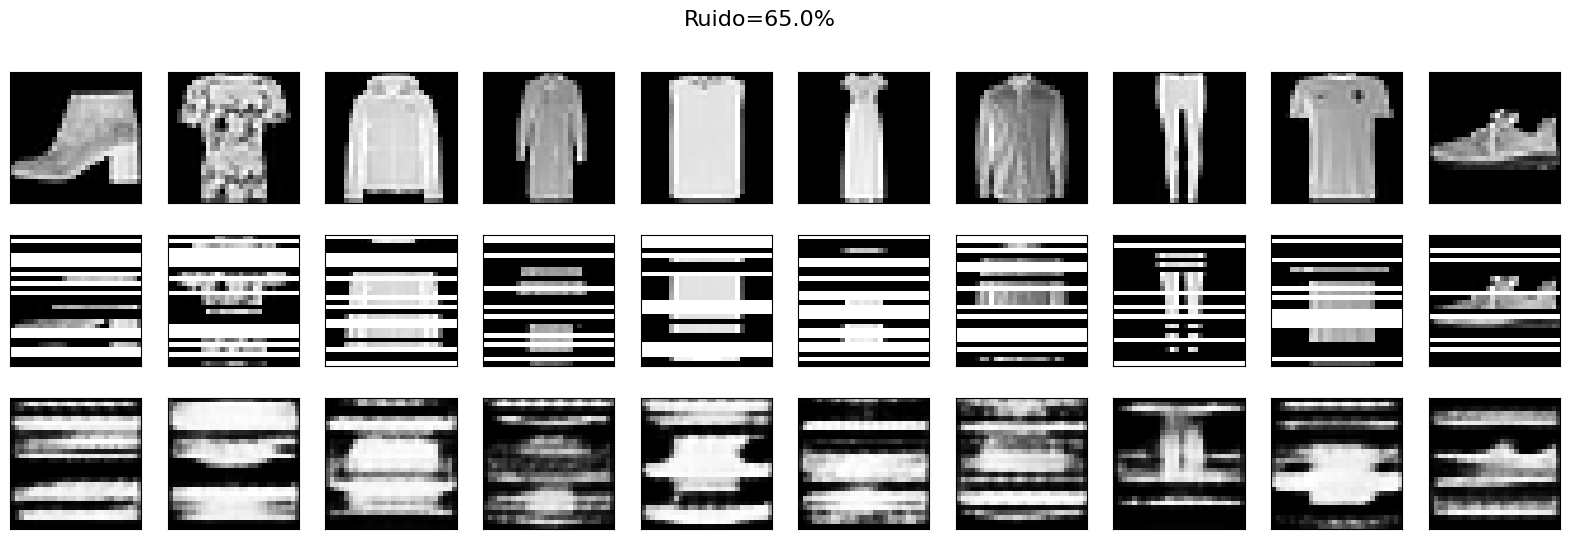

313/313 [==============================] - 1s 2ms/step


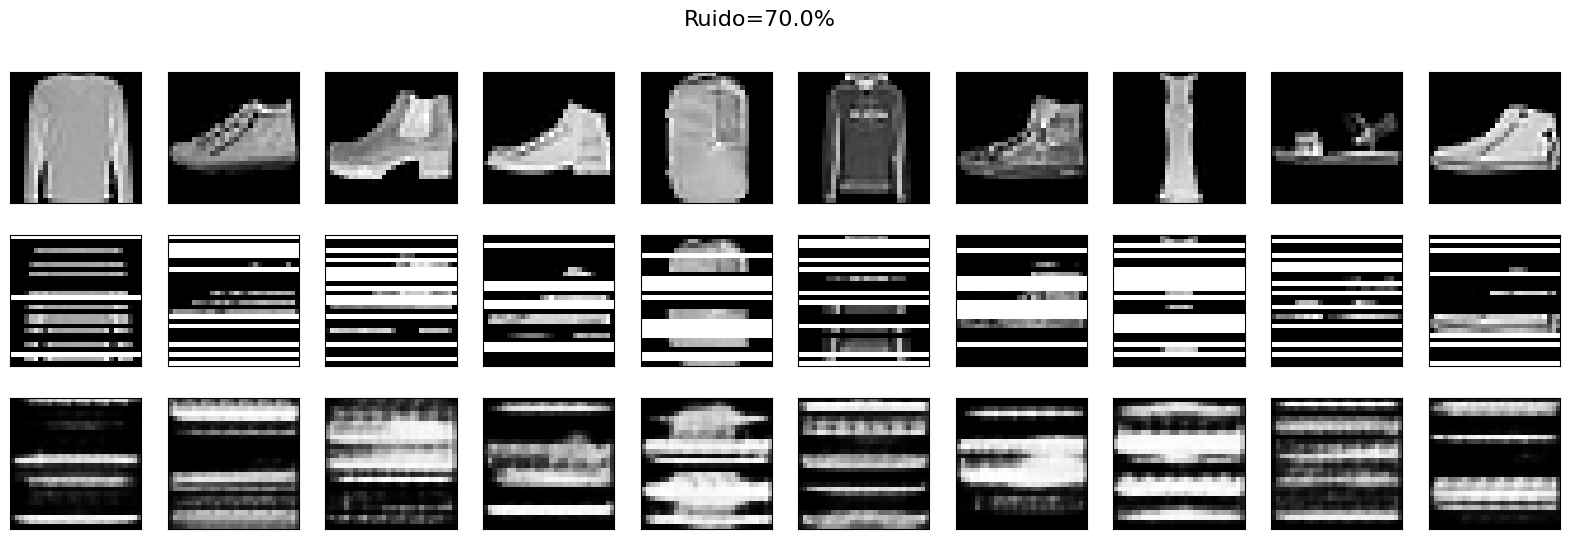

313/313 [==============================] - 1s 2ms/step


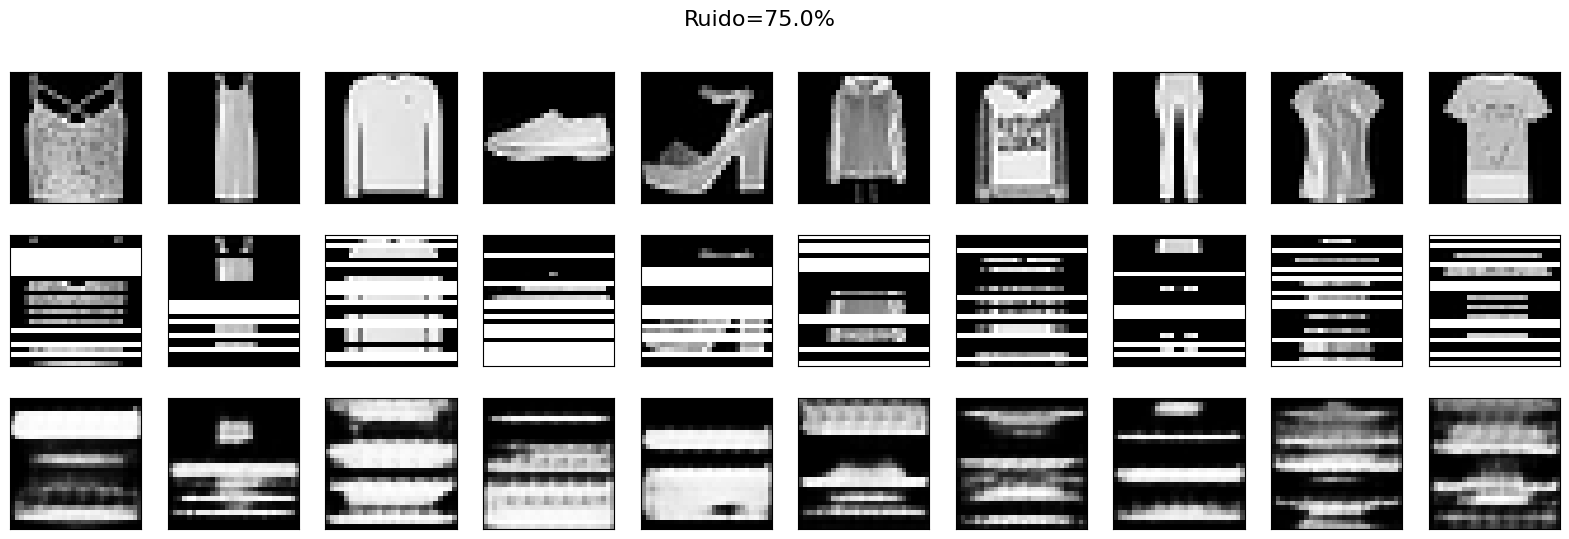

313/313 [==============================] - 1s 2ms/step


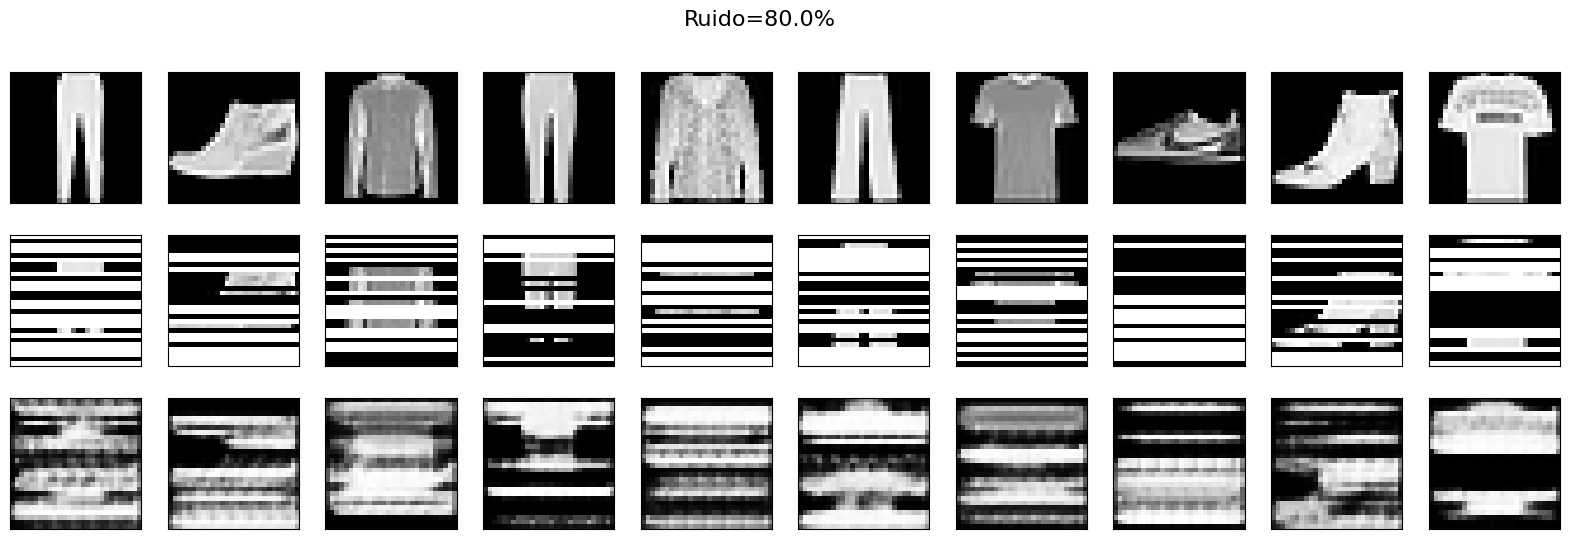

313/313 [==============================] - 1s 2ms/step


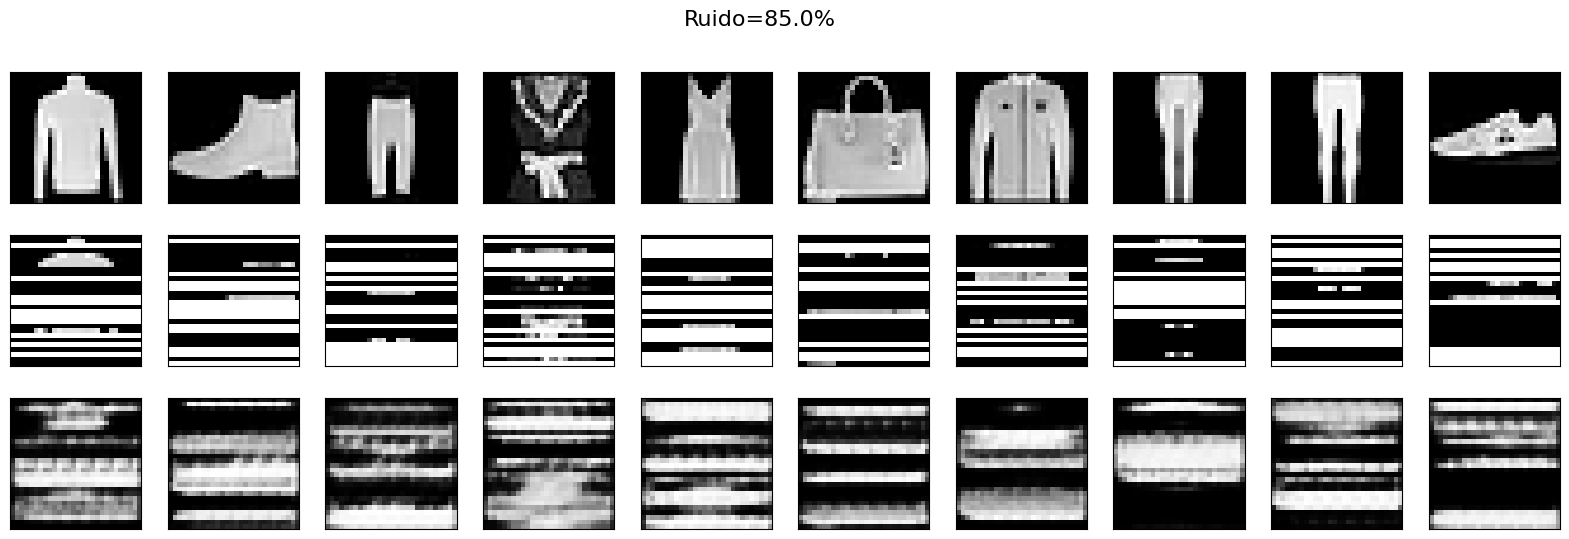

313/313 [==============================] - 1s 2ms/step


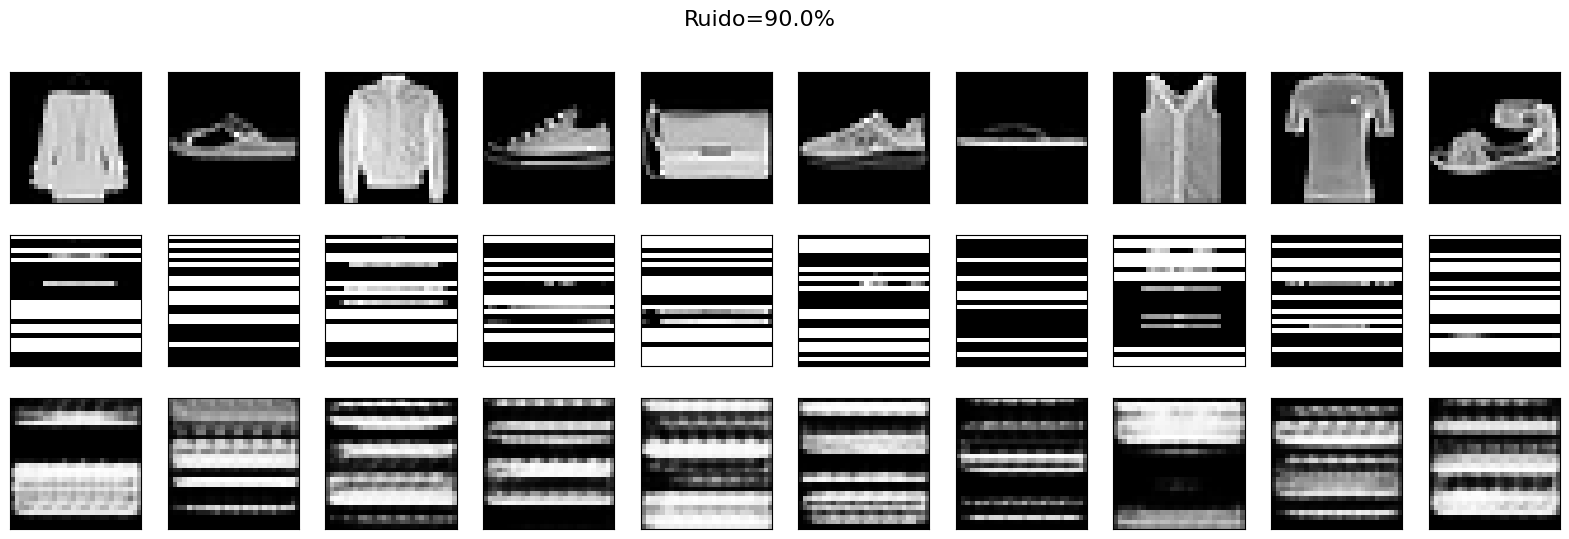

313/313 [==============================] - 1s 2ms/step


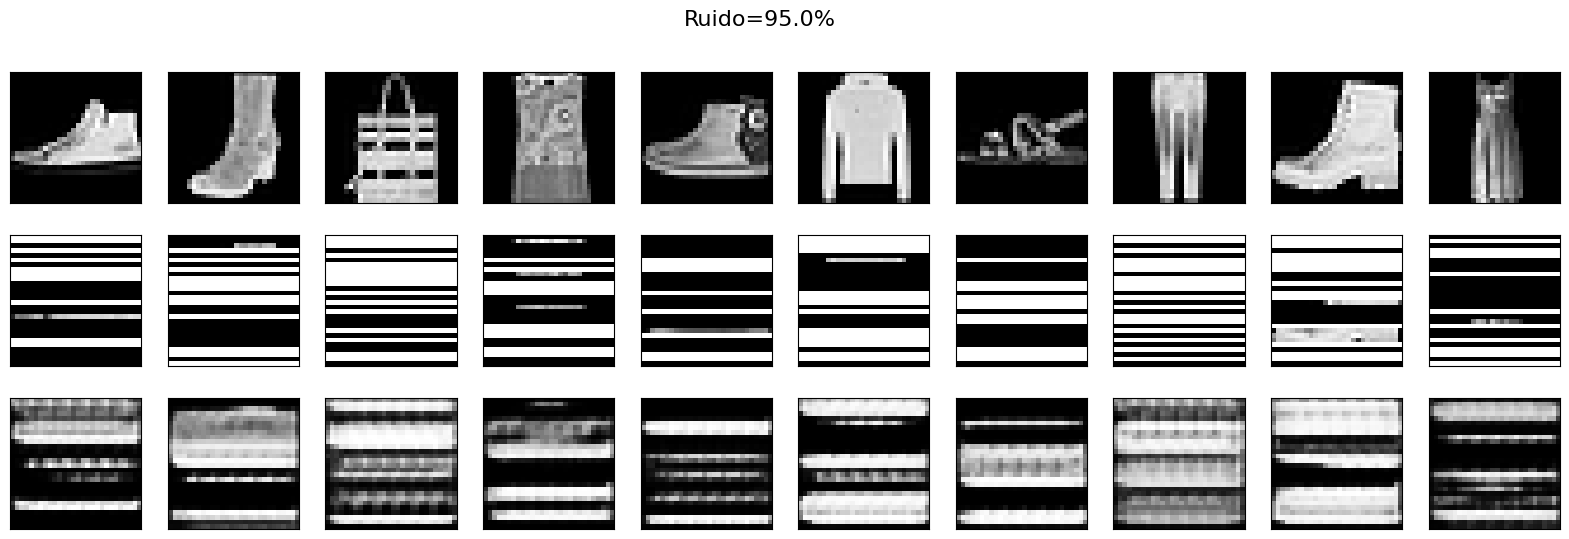

313/313 [==============================] - 1s 2ms/step


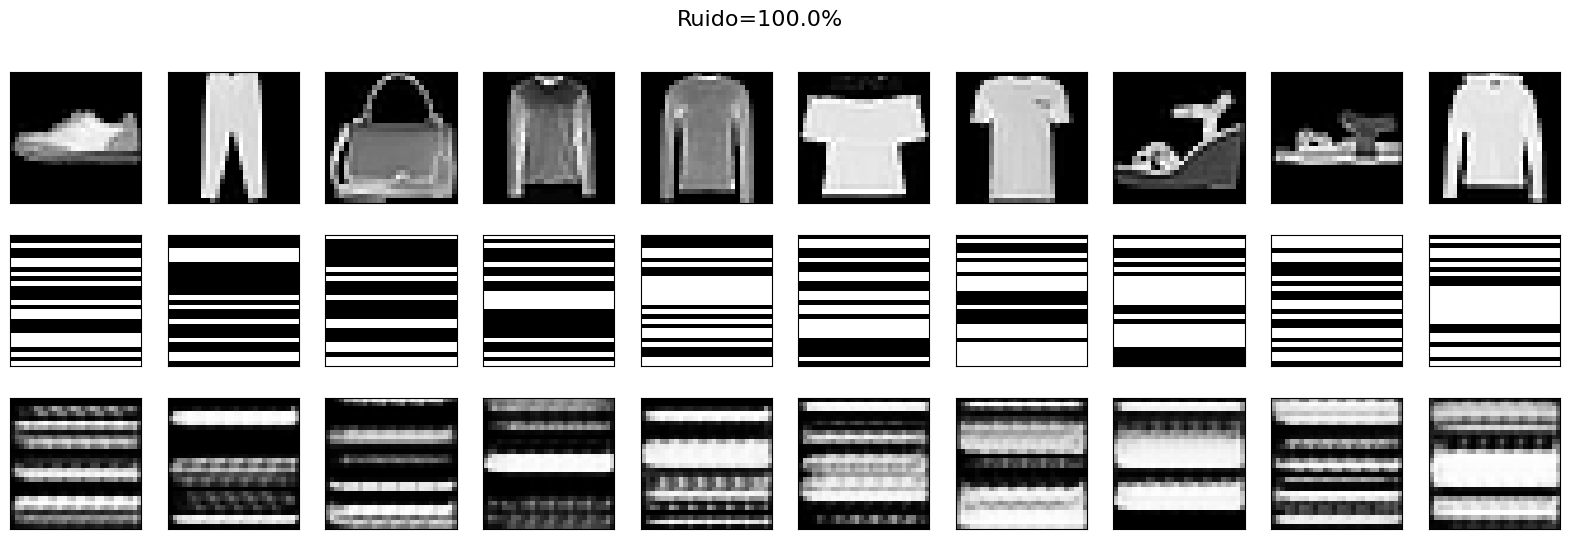

In [ ]:
noises = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]

for noise_number in noises:
  ims_ruido_test = noise2(test_data,noise_number)
  display_three_lists(test_data,ims_ruido_test,autoencoder.predict(ims_ruido_test),noise_number)

A grandes rasgos se puede observar que frente a un nuevo tipo de ruido, el rendimiento del modelo baja con respecto al ruido con el que fue entrenado. Para un porcentaje de ruido cercano al $40$% o incluso al $10$%, el ruido de color blanco o negro (las bandas horizontales) difumina bastante la región sobre la que se superpuso, siendo el modelo incapaz de reconstruir localmente la imagen. Desde un punto de vista global, las imágenes reconstruidas son bastante borrosas, e incluso se podría considerar que las reconstrucciones con un tipo de ruido parecido al de los datos con los que se entrenó, hechas a partir de imágenes con un porcentaje alto de ruido, son mejores que las reconstrucciones hechas con un porcentaje relativamente bajo de nuevo ruido.

#### Conclusiones

Una de las principales conclusiones que se extraen de estos experimentos es que el modelo, si bien puede reconstruir de manera aceptable imágenes con ruido hasta cierto límite (en este caso, se comentó que en torno al $65$%-$70$%), este ruido debe ser el mismo con el que se alteraron las muestras de entrenamiento y validación para la fase de entrenamiento del modelo. Cuando debe reconstruir imágenes alteradas con un tipo diferente de ruido, los resultados obtenidos son bastante peores.

También se puede extraer lo siguiente: el conjunto de datos sobre el que se entrena debe ser de alta calidad, y si el modelo se enfrenta a reconstrucción de imágenes ruidosas como es el caso de ejercicio, debe haber suficientes muestras en el conjunto para que el modelo pueda generalizar bien a situaciones distintas pero relativamente parecidas a las de las muestras. Otra forma de mejorar los resultados es realizar un diseño distinto del autoencoder de manera que tenga mejor capacidad de generalización a nuevos tipos de ruido, o se podría hacer uso de la técnica de data augmentation para que las imágenes se presenten situaciones (sin embargo, este útlimo podría no surtir efecto en el ruido aleatorio que se ha añadido a los datos de entrenamiento ya que mediante transformaciones afines se obtienen imágenes con un patrón aleatorio de ruido).